# Twitch.tv chatters network analisys

## необходимые библиотеки

In [322]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import drive
from copy import deepcopy
from scipy import stats
import random
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## читаем цсвшки с данными

In [323]:
TF_DF = pd.read_csv('/content/gdrive/My Drive/MIPT/MAST/1SEM/SAS/project/everythin_truefaust.csv')
LL_DF = pd.read_csv('/content/gdrive/My Drive/MIPT/MAST/1SEM/SAS/project/everythin_linalucker.csv')
CD_DF = pd.read_csv('/content/gdrive/My Drive/MIPT/MAST/1SEM/SAS/project/everythin_ceddisss.csv')
DD_DF = pd.read_csv('/content/gdrive/My Drive/MIPT/MAST/1SEM/SAS/project/everythin_dandrael.csv')
EF_DF = pd.read_csv('/content/gdrive/My Drive/MIPT/MAST/1SEM/SAS/project/everythin.csv')

## считаем и удаляем неюзабельные строки

In [324]:
n = len(EF_DF[EF_DF['aut'] == 'кто-то'])
print(n)
EF_len = len(EF_DF)
print(EF_len)

1894
63249


In [325]:
EF_clean = EF_DF.iloc[n:]
print(len(EF_clean))

61355


In [326]:
print(EF_clean, TF_DF.iloc[n:EF_len], LL_DF.iloc[n:EF_len], CD_DF.iloc[n:EF_len])

               aut                                                mes
1894      ceddisss                                    в тхт документе
1895      ceddisss  вообще там ник должен быть, но для первых 1894...
1896      ceddisss                                                 :)
1897      ceddisss                                    ceddisSshitface
1898      dandrael                                                fuf
...            ...                                                ...
63244   linalucker                                               коты
63245      animmih                            Там же из игры был арт?
63246   linalucker                                            не хочу
63247  vaicel_nick                               это я пишу тебе в тг
63248   linalucker                                           WineTime

[61355 rows x 2 columns]                aut                                                mes
1894      ceddisss                                    в тхт доку

In [327]:
frames = [EF_clean, TF_DF[EF_len:], LL_DF[EF_len:], CD_DF[EF_len:], DD_DF[EF_len:]]
df = pd.concat(frames)
print(len(df))
df.to_csv('/content/gdrive/My Drive/MIPT/MAST/1SEM/SAS/project/twitch_dataset.csv', mode='w', index=False, header=True)

95245


## запускать отсюда при наличии twitch_dataset.csv

In [ ]:
df = pd.read_csv('twitch_dataset.csv')

## ищем количество уникальных юзернеймов и количество их сообщений в чатах

In [248]:
uniq = {}
for index, row in tqdm(df.iterrows()):
    #print(row['aut'])
    if row['aut'] in uniq:
        uniq[row['aut']] += 1
    else:
        uniq[row['aut']] = 1

95245it [00:05, 17220.40it/s]


In [249]:
Suniq = sorted(uniq.items(), key=lambda x:x[1])[::-1]
print(len(Suniq))
Suniqq = [S for S in Suniq if S[1] > 1 and S[0] != 'truefaust']
m = len(Suniqq)
print(m)

368
290


In [250]:
users_dic = {S[0]:S[1] for S in Suniqq}
user_to_index = {S[0]:i for i, S in enumerate(Suniqq)}
users_names = {S[0]:S[0] for S in Suniqq}

## думаю, может сделать не только теги через @...

In [251]:
print(users_names)

{'ceddisss': 'ceddisss', 'blvckbvrnez': 'blvckbvrnez', 'dandrael': 'dandrael', 'vellrus': 'vellrus', 'axel_reisen': 'axel_reisen', 'dyadya_danilo': 'dyadya_danilo', 'linalucker': 'linalucker', 'evgeniyleet': 'evgeniyleet', 'justreyb': 'justreyb', 'cybernytik': 'cybernytik', 'seeoma': 'seeoma', 'pandadrummer': 'pandadrummer', 'chlore': 'chlore', 'roman_dmt': 'roman_dmt', 'n14t0': 'n14t0', 'jetviolett': 'jetviolett', 'ne_cott3r': 'ne_cott3r', 'juliam7': 'juliam7', 'xseix': 'xseix', 'teemok': 'teemok', 'ruriir_': 'ruriir_', 'l3rva_': 'l3rva_', 'maxisolo': 'maxisolo', 'reactistov': 'reactistov', 'fahafatesanat_t': 'fahafatesanat_t', 'prosto_oleja': 'prosto_oleja', 'truephotoonelove': 'truephotoonelove', 'hellknight719': 'hellknight719', 'kiraschmidtq': 'kiraschmidtq', 'l3rra': 'l3rra', 'mintywrinkles3': 'mintywrinkles3', 'addict_v4': 'addict_v4', 'poill': 'poill', 'vaicel_nick': 'vaicel_nick', 'chevapchi4i': 'chevapchi4i', 'retabokainrou': 'retabokainrou', 'wtwrite': 'wtwrite', 'sbermarket

In [252]:
for index, row in tqdm(df.iterrows()):
    #print(row['aut'])
    if 'ривет' in row['mes'] or 'дарова' in row['mes'] or 'драст' in row['mes']:
        print(row['mes'])

1213it [00:00, 12122.38it/s]

привет женя
привет кедикс
привет линалакер
@Dandrael PrideFlower привет
Привет Максим
привет всем  catKISS
@DcayOrcus привет Дикей)
привет Эва
привет линлакер
Привет Эва
привет линалукер
эва привет
triangWide Здрасте, что вы тут делаете
привет мишк
Привет, примитивные организмы KPOPheart
привет кор галом
привет кедис
привет линалакер
привет рурир, дарова дандраель, привет женя
привет
привет блек
привет блек
привет кедис привет линалакер привет кор галом
привет блек!
привет оркус!
привет женя
привет дядя данило
привет тимочек
привет тимок
Привет, Тимок. Прикиньте вчера зашел в батлбитс на рандомный сервер и застрелил там Тимка. :)
привет хеллнайт
привет вован
привет максим
@roman_dmt привет, Ром
@Teemok привет, тимок
привет
Здрасте
привет поил
привет поил
привет поил срать в подъезде
и снова привет поил
драсте поил
@Dyadya_Danilo приветттттттттт
привет поил
@dyadya_danilo здарова CoolCat
привет подружка подушка
привет лейчик спасибо за буст в дуолинго!
Привет лейчик ты чо
@blvckbvrnez п

2578it [00:00, 13018.82it/s]

привет
привет
привет котерчик
Приветствую
@vellrus привет morphilinaMyaaa
привет котерчик
привет
привет дандрель
привет рурир
Привет Рейб
привет лера


4219it [00:00, 14562.83it/s]

+250 привет лох
привет киры и кир_ессы
Кира привет
привет панда
здрасте
драсте бог мамок
привет дандрель
привет дандрель
привет
дарова дядя данило
Здрасте всем MLADY
здрасте
Здарова всем! KKona
привет янзеп
@Juliam7 Жулям KonCha здарова блинчик
привет джулиам
привет ректистов 🐷
привет дикей 🐷
@Reactistov Здарова Starege
@JanZepp здарова KonCha
@DcayOrcus привет peepoSmile
привет втврайт
здарова
здарова
привет рейб
драсте
привет молодые красивые KonCha
Привет! 20 вариантов брони на тело готовы) В плане Milestone пройденого и оплаты. Помимо 20 слоев для брони поверх того что было сделано - -подготовлена также была иконка Ai -12 иконок под инвентарь - 3,5 сета для разработчиков - дополнительные 4 вида кожи \ базы (один из них легко перекрасить под любой другой цвет, сделав серебрянным, медным, фиолетовым и т.д.) - также еще некоторое количество слоев помимо брони (волосы, шрамы, тату, шапки мечи и пр. ---за это мне заплатили 300 бачей это ок?
Привет! 20 вариантов брони на тело готовы) В п

5943it [00:00, 15616.80it/s]

Всем привет
о тимок привет
@teemok здрастье тимок TehePelo KPOPlove
Привет Максим

9055it [00:00, 15435.12it/s]


Всем привет.
привет людмила
привет, я пришёл поздороваться и запустить бота, но мне надо искать магнитную восприимчивость идеального газа магнитных диполей, поэтому я уже ухожу, пока
привет PrideLionHey
@Dandrael дарова
Всем привет, мне не удобно тегать с телефона
дарованный
привет женя лит
@fahafatesanaT_T ✋ :) привет
привет
привет котерчик
привет мишк, привет ничто
@Dandrael привет ковиднутый
@linalucker привет педовкам STARE
Привет Эва
Всем привет
привет Дандраель
Привет оценишь игру rusted warfare? От 1 до 10
@kaorysil привет
Урааа Мэксим приветик AYAYAbaka
привет сёма
привет кедис!
привет сёмачка!
привет линалакер
привет линалакер
привет рурир!
дарова дандрель
KonCha здарова
привет ректистов
@ceDDissS привет кедис
привет титнох
дарова дядя данило
Здрасте, кстати
Привет KonCha <3
привет рейб
@ceDDissS @Dandrael @ruriir_ VoHiYo привет всем больным и здоровым
Рейб привет
@Dyadya_Danilo Привет. Я заказал себе два ножа. Они придут и сможем устроить ножевой бой
привет Януличка
Привет Я

12326it [00:00, 15998.68it/s]

привет песок
привет хаппи шанд
привет кеддис, джулиам еще не было что ли? или ты филонишь?
@leychick здарова
@janzepp дарова барашка
привет блек!
привет максим привет кедис
привет блек
привет блек
привет лейчик спасибо за бусты в дуолинго!
@blvckbvrnez здарова KonCha
драсте янзеп
привет оркус
поил здарова
@ruriir_ здрастье
@poill здарова KonCha смотри значит: шоколадные вафли, круассан шоколадный и чизкейк яблочно- карамельный
@chlore здрастье спасибо. Вы зефир-хорошистка!
@Reactistov здарова василёк Starege
@JanZepp здарова pepePoint
@dandrael здрастье, тебе б 0.5 градуса въебать
@roman_dmt привет, Ром
@Teemok привет, Темок
@Juliam7 здрасте жулиям семь KonCha
@roman_dmt привет
@justREYB так перед залупой не была харя такая здаровая
привет реактистов
привет блек
@MAMORU_45 О, привет, Мамору KonCha <3
привет тимок
привет стример всм
здрасте
привет нокс
привет девотькам AYAYA PETPET
Привет всем
привет
приветы
привет дядя данила
привет
привет коверчик
привет лакер
@lucker_vg привет лакер


15593it [00:01, 15818.79it/s]

кибернытик кривет
Приветик
драсте
привет
@Juliam7 Здрасте джулиям семь CoolCat
привет Джулиам FrogPop
привет красивые
привет женя
привет блек привет ахель
ну здарова
привет рурир
привет рурир
@ruriir_ здрасте рурир
здарова лошпедка рурир
привет линалакер
привет, лер YuuBooty
привет лера
привет линалакер и лера
@l3rra дарова\
@ceDDissS привет кедис
@l3rra здрасте лера KonCha
@DcayOrcus привет, попробуй включить эквалайзер от ФФЗ мне помог
привет всм
привет сем
Здарова, Фауст. Как настроение?
привет, тебе сколько лет right now ?
привет, тебе сколько лет right now ?
Мне сегодня бухой мошенник с Алтая названивал. Позвонил, я взял трубку и в ответ тишина. Говорю - "Але". - "Слушай, привет, тут к тебе дело есть, небольшая помощь нужна, брат. " - "Вы кто". - "Да я тут с коллекторами столкнулся и тут твой номер подвернулся" - Я бросил трубку, тут же нормре в чс и телефон показывает что додик мне 6 раз под ряд начал звонить. А это какой то очень хриплый и бухой мужик был по голосу
Мне сегодня б

18780it [00:01, 15426.75it/s]

милана привет, тебе пизда
Приветик
дарова дядя данило
Привет чяч, а у вас коленки сзади грязные
привет, лер catKISS
привет реактистов
привет реактистов
привет это просмотр порно?
всем белоспиным привет остальным соболезную
привет хеллнайт
привет хелнайт
привет хелнайт
привет хлоп
всем привет
привет ректистов, красава
драсте полиэстер
привет флера!
привет, ты классный
привет реактистов!
привет блек!
привет лилмаксим
Привет
@N14T0 ой извини я не видела... привет Kissaweeb
Привет , я шад
Привет всем
здарова
А мне никто не сказал привет :(
я думал я здаровался
привет дандрель
здарова
привет PrideLionHey
привет хеллнайт
@Dandrael а так привет
Здрастье всем
О, Привет @poill <3
привет втврайт и поил
@dyadya_danilo @wtwrite здрастье здрастье
@dcayorcus приветы
Здарова блэк
привет поил
Привет, Фауст. Как настроение?
@DcayOrcus KonCha здарова
@wtwrite !привет
О рейб здарова заебал
привет
привет, смотрим нелюбимую аниме студию максима AYAKA
привет мишка


23808it [00:01, 16338.89it/s]

@ceddisss привет VoHiYo
дарова
здрасте VoHiYo VoHiYo
привет войд
привет воид
привет войд
PotFriend привет
здрасте
@Juliam7 здрасте жулиям семь nodders
привет реактистов
всем привет
привет Ахелечек
здрасте
привет кедис
привет блек
привет дандреля
привет дандрель
Здрастье всех с днем анимешников выходим на улицу и кричим НЯ
@axel_reisen @dyadya_danilo @teemok здрастье всем привет всем
Привет Поил PowerUpL <3 PowerUpR
привет поил
@poill привет-привет
@wtwrite здарова повар спрашиваешь повара TehePelo <3
@blvckbvrnez здрастье
@ruriir_ привет, Рури
привет рурир
привет рурир
дарова дядя данило
привет
Здрасте всем привет всем truefaBits truefaBits truefaBits truefaBits truefaBits truefaBits truefaBits
всем привет привет всем
привет жулиам
привет джулиам
лера привет
Привет, военкомат. я работаю в другой стране, тут очень плохо и у меня нет денег приехать на отпуск. Поэтому вот вам фотокарточка моего члена. Бб
привет


27138it [00:01, 16126.09it/s]

привет сема
Привет
Дарова-дарова
И всем привет да
приветь. а сегодня в честь праздника, будет показ какой нибудь?
приветь. а сегодня в честь праздника, будет показ какой нибудь?
привет
@Juliam7 здрасте жулиям семь KonCha
привет скок будет стоить тату сделать на башке " выходи за меня"
@l3rra здрасте лера TPFufun
@roman_dmt KonCha привет
Пейдж ебать здарова
Дуфи дарова
о члор привет
привет велрус
привет хлор два
привет седис
Приветули баншива
@mister_mojo_risin Ох, вот это ник! Привет
привет дандреля
привет
Привет, Сема
Привет, Панда
привет
привет скоро новый год?
привет женя!
@l3rra привет
привет лера
привет кедис
привет линалакер
привет кедис и блек
привет блек
привет линалакер
привет сёма
привет линалакер
привет ежевика
всем привет
Привет, Фауст. Как настроение?
зачем ты такое читаешь? привет
зачем ты такое читаешь? привет
привет реактистов
привет блек
Эва привет
привет
привет кор галом!
привет кор галом
Здарова
привет хеллнайт


30683it [00:01, 16941.03it/s]

ничего фанаты геншина подрастут и вспомнят линулакер
привет эва
Привет, Фауст. Как настроение?
@DcayOrcus привет
привет
привет nyamurJAM
@addict_v4 привет nodders
@linalucker привет
Приветик
привет ох фох nyamurJAM
Всем привет, кисй слос заи
привет женя
привет блек
привет реактистов
привет блек
привет линалакер как дела
привет лейчик
привет кеддис я нашла твою женскую версию в саратове
всем привет привет всем
ебать привет
привет женя
привет сукам, привет ёбаным
Здрасте
Привет. Зарезал
Все привет, здравствуйте catKISS
Я бы просто помахал рукой и сказал бы "привет"
он мне вместо приветствия по ебалу даёт ес чо, вы не думайте что он добрый
привет сёмачка
всем привет мои хорошие CleanThePig
Здрастье. Зачем смотрите на детей?
@axel_reisen @seeoma здрастье
Здарова всем truefaBits truefaBits truefaBits truefaBits truefaBits truefaBits truefaBits
привет рк
привет поил
@linalucker @axel_reisen @poill @seeoma здарова всем truefaBits truefaBits <3 <3
@linalucker здрастье
@Dyadya_Danilo лучшее при

33991it [00:02, 16000.73it/s]

привет ректистов
привет кедис
привет ректистов
привет реактистов
@teemok приятного тебе. И здраствуй
@poill привет-привет!
здрасте VoHiYo VoHiYo
@v0id_mg здарова KonCha
привет войд
але гараж чо не здароваемся
всем привет
привет оркус
малая привет
привет милиардеров обсуждаете?


37280it [00:02, 16212.63it/s]

о, привет, Януличка
@MISHK397 Мшьки здарова Ну типа
@JanZepp Привет
Всем веселящимся привет!
Привет
привет женек
@justREYB дарова :3
привет
привет олег
привет сема
здрасте VoHiYo VoHiYo
привет санбим
@tthesunbeam здрасте самбин CoolCat
Всем привет)
Оркус, привет привет
привет дандреля
@Dandrael здрасти дандраел ь CoolCat
@roman_dmt привет
Дадрель здрасте
привет Мсак
Приветствую прекрасных людей )
привет
Здарова
@roman_dmt Привет.
@l3rra здрасте лера KonCha
@justREYB здрасте рей б nodders
Здрасть всем
приветы
привет
Привет
привет дядбданила
привет передает
Кеддис, привет, сделай сальто
привет как ваше женсаое здоровие?
привет дандрель
Привет, Фауст. Как настроение?
каких энергетиков въебал здрасте?
@l3rra здрасте ле ра KonCha
привет лера
@l3rra привет это я


42182it [00:02, 16261.14it/s]

@axel_reisen привет, да!
Здарова рейбич
девочки привет, всех с днём сталкера в метро... TriSad TriSad
привет линалакер
самоудовлетворённым привет
привет кор галом
я не из этих но привет коргалом
привет дандрель
привет дандреля
привет дандрель
привет сема
Привет, Фауст. Как настроение?
з-драсте
драсте
привет реактистов
Реакстистов привет
@Reactistov Здарова, Жируха KonCha
@blvckbvrnez привет блек
@Dyadya_Danilo здарова
привет
привет женя
дарова женек
привет женя лит
привет женя
привет лера
привет лер
привет лера
привет @l3rra Поздравляю тебя с днем труда
@justreyb привет рейб, спасибо большое
Привет девачки
привет втврай
о привет
привет втврайт
всем привет привет всем
Ку всем привет CuteDog
привет nyamurJAM
Привет Макс
привет рурир
привет сиська
здарова кедис
@evgeniyleet привет лох @axel_reisen привет лох
@ruriir_ привет лох nyamurJAM
@addict_v4 приветик лох
привет теска
Привет блэк
привет реактистов
привет блек
Привет, Фауст. Как настроение?
Привет я в тиктоке отправляла кота когда эт

45587it [00:02, 16351.48it/s]

в самокате своя продукция прикольная, дешёвая и много интересных позиций, а ещё лучший круассан с ветчиной и сыром.... здрасте
привет эв
привет линалакер
Привет Эва PrideFlower
привет линалакер
пнривет линалакер
привет блек, лера, ахуль, ничто, втврите
привет реактистов
привет кедис!!!
здрасте
привет оркукс
привет оркус
Привет Эва, Дикей, поздравляю со съемом
привет аксель
привет женя лит
Привет Женя
@Reactistov привет реактистов
Приветик дядя Данила
дарова дядя данило
привет дядтданила
привет ахуель. сорян я не видел @axel_reisen
здрасте VoHiYo VoHiYo
ого Эва привет
привет
всем привет PrideLionHey
Привет. Хочу предложить продвижение вашего канала, зрители, фолловеры, просмотры, чат боты.Цена ниже любого конкурента, качество гарантированно самое лучшее. Автовключение.Невероятно гибкая и удобная панель управления заказами, все в ваших руках, включайте/выключайте/настраивайте.Заходи на streamrise ru.
дарова OkayuDance
привет женя
Привет. Хочу предложить продвижение вашего мальчика, его ш

48845it [00:03, 15999.44it/s]

привет кедис
привет блек!
Здрасте KonCha <3
привет рейб
привет
Привет Эва
привет лина
ура успела привет
Привет Блек
привет блек!
привет дандреля привет кедис
привет!
привет минти
привет кедис
привет чувак и досвидания
привет
привет котерчик
привет котерчик
привет
Приветствую всех
привет женя
привет
привет кедис
привет женя
привет женя
привет блек
привет нытик
привет флера!
привет, хорошего стрима! Я пойду отдохну
дарова поцаны и девочки
привет лера
привет блек!
привет кедис!
привет кошка!
привет
:) всем привет
Привет у меня сегодня день рождения можно модера плиз
привет дандреля не болей
привет
привет
привет
привет котерчик сдр
драсте лера
привет
привет оркус
Привет оркус
привет Оркус
привет Оркус
привет диси оркус
привет максим
привет кедис
привет отисматус
@DcayOrcus приветики
привет
привет рейб
Всем привет


51999it [00:03, 15252.34it/s]

привет
всем привет. на меня на работе упали чугунные радиаторы. я до сих пор в ахуе только пришел с работы
привет женя
привет женя
привет женя
привет женек
привет кедис привет блек привет хлоп
привет нытик
привет
привет всем кто 2 часа ехал чтобы обняться с Мари перед ее поездом в переезд, проебался 8482827 раз и успел только помахать ручкой в окно сапсана
привет
привет дандреля
@blvckbvrnez Привет! Не пизди пажожда
Привет
привет диджей оркус
привет кедис
Всем привет
привет хлор
привет!!!!!!!!!!
привет котерчик
привет котерчик
здрасте
ебать реально марта привет
здарова
привет стримерр 🤓
всем привет. я пропылесосил и сейчас буду мыть посуду под вас
привет кедис
привет хлор
привет женя
привет женя
привет дружелюбным
привет блек!
привет кошка
привет флера!
привет булочка!!
привет лера
привет лера
Привет! Как игра?
дарова дядя данило
дарова дядьданила
Привет нытик
драсте
привет оркус
привет блек
привет женечка
привет оркус
привет
привет женя
привет блекк
привет кедис
привет
привет оркус
пр

55148it [00:03, 15302.77it/s]

приветс
привет женя
привет женя
привет кедис привет блек
привет привет
привет сема
привет семачка
привет сёма
@CyberNytik привет, солнышко)
Але але здрасте все привет truefaBits truefaBits truefaBits truefaBits truefaBits truefaBits truefaBits truefaBits
@CyberNytik привет, зая
Привет рейб
привет рурир
@ruriir_ дарова
привет рурир
привет рурир
привет рурир
всем пуделям привет остальным соболезную
драсте
приветс
привет
привет женя
@evgeniyleet привет киса) mgkLove
привет блек!
привет джетвиолет
@CyberNytik привет, сладкая)
привет @blvckbvrnez
@evgeniyleet приветы
привет, я дописал диплом за 3 дня
привет
здрасте
дарова дядя данило
привет лерва
здарова, уебашь меня в бан пж
здарова, уебашь меня в бан пж
здарова, уебашь меня в бан пж
привет дендраель
привет джан цепп
привет ты сушествуеш?
привет дандреля
Привет Блек) через комп ща заползу
привет я новенький
Еще раз всем привет, Кисы+ заи я как белый человек теперь
привет хелнайт
драсте
здарова KonCha
привет ректистов
привет кедис
Привет ко

58382it [00:03, 15518.57it/s]

Привет всем интерьерным и мебельным дизайнерам
привет блек
привет
привет блек
привет хлор
catYep драсте
дарова дядьданила
дарова дядя данило
привет сегодня ракурс другой
привет джулиам семь!
@ceddisss привет 🍒
привет ты новенький
приветы
Привет Эва
привет
привет Лина Лучник
ебать привет в рубашке сидит
о привет блек
@blvckbvrnez привет
дарова дядя данило
привет всем кто пришел с работы
Привет Ксикс. На меня клевещут.
:) всем привет
привет кста
привет линалакер
@blvckbvrnez привет блек! 💓
о привет рурир
привет рурир
охуеть привет
привет мишка
привет
о привет рейб
привет рейб
привет минти
+250 привет лох
дарова
привет женя лит ты что на мой стрим не пришёл ясно
привет кедис, откуда я нахуй знал, что ты вообще стримишь? ты где-то постил? м бля? не слышу?
приветы скамеркам
@ruriir_ снова здарова
снова привет
привет рурир
Привет всем
привет
привет озабоченный 4-летней девочкой дандрель
Привет Кемдис)
Привет Ничто)
дарова дандрель
всем привет :)
о привет карп!
жесть привет карп
привет блек!


63118it [00:04, 14787.04it/s]

Всем привет
привет макс
привет рурир!
привет!!
привет
привет Женечка
привет женя
привет блек!
привет
привет дадьданила
привет блэк
привет максисоло
привет женя
привет людка
привет стример!
привет линалакер и звери
всем привет
привет макс
Привет, это пункт назначения?
привет тока домой вернулся, чуть не сдох в рубашке и черных штанах в +30 весь день тусить, так что я посижу в чилл режиме
привет женя
Всем привет
привет!!!
привет саня
привет пригожин
о дарова
Привет Кеддис покажи пейсы
привет втврайт
Привет Блк
здрасте KonCha KonCha
Максим приветик, ты потрясающий, обожаю тебя, ждал твоего стрима, досталтчлен и нежно дрочу
привет построил дом?
всем привет всем здравствуйте
привет ахкайнд
привет ахкайнд
Здарова, там Влад сдох, спасибо кедису за уведомления
дарова ректистов
@ceDDissS здарова
привет реактистов!
@blvckbvrnez привет!
Здарова ебать всем KonCha
привет янзепп
привет янзеп
дарова дядьданила
@Dyadya_Danilo дарова
привет ян цепп
дарова дядя данило
привет
привет женя шлянь
привет жен

66080it [00:04, 14390.64it/s]

привет 🍃
привет жулиам!
драсте стримлер pigBelp
привет линалакер
привет блек!
привет женя
привет женечка
привет блек привет эва
привет рейб
привет а чо днем не стримил?
привет оркус
привет адикт
@DcayOrcus приветы
привет адикт
привет блек, привет женечка, привет эва, привет рейб
ахуль привет linalu1Heart
привет аксель
Здрасте
привет дандреля
привет дандреля
дарова дядьданила
привет дындреля
привет дындрусъел
привет данило
@Dyadya_Danilo @DcayOrcus @blvckbvrnez @linalucker @evgeniyleet Привет большие + красивые
Здрасте
привет сема
Привет Сема, привет Мум
приветики
Ой, привет. Увидел, что ты стримишь в дискорде, решил посмотреть, ты давно вообще этим занимаешься? Как пришел к этом? Меня Саша зовут, а тебя?
привет тимок
привет тимок, ты уже в мск?
Здарова бандитам KonCha Остальным нечифирным салам
привет янзеп
привет Януличка
привет @JanZepp
@N14T0 привет-привет KonCha
Здрастье всем привет всем. Откуда такая классная рубашка, тоже хочу
привет поил
@poill Привет, Пойл KonCha
@teemok привет

69010it [00:04, 14314.71it/s]

здарова чат макс как дела у вас <3 <3 truefaBits truefaBits truefaBits <3 <3 <3 <3 truefaBits
здарова ахель <3 truefaBits <3
привет янзеп <3 <3 truefaBits
привет
Всем приветики Ребята ^_^
Привет Максим Kissaweeb
@leychick дарова пузатая
привет ахуль!
привет линалучкер <3 <3
драсте
привет кедис!
привет клейчик!
привет линалакер
привет ян цепп
привет линалакер
@JanZepp драсте
привет кедис
привет ректистов
@roman_dmt MLADY Здарова придонный
@JanZepp здарова ян пробел зеп KonCha
здарова роман
@axel_reisen здрасте ахель нижнее подчёркивание ризен KonCha
@RetaboKainrou Здрасть Р нет проблеа К
Прикинь такой, кто-то в чат приходит и он: "Привет, как дела?" спрашивает
Здарова, Фауст. Как настроение?
@vladislavkosmach  дарова
драсте
привет втврайт
здарова втврайт
@wtwrite драсте
Здарова вован
драсте
здарова @N14T0
здрасте, я в пятницу первую квартиру продал
привет минти
Всем драствуйте, я в говно(почти):)
здарова дандраель truefaBits
Привет Эва (ещё разок,)
привет блек
привет блек, всё ты умеешь

71995it [00:04, 14219.20it/s]

Привет чяч KonCha
привет лера
привет лера
С зелёными глазами нюдсы нужно представлять как "Привет всем утренним осознанным. Разминаю вот своё тело на утренней зарядке под лучами исцеляющего солнца. Хочешь также изогуть ноги? Ссылка в кепке тг"
Здарова мун
привет ребятки
Привет всем
приветы кста MLADY
привет чат
привет Люда
Здарова чат максон как дела у вас truefaBits <3 <3 truefaBits <3 truefaBits truefaBits <3 truefaBits
@retabokainrou здрастье
привет линалакер!
привет блек!
привет линалакер
привет кедис!
привет оркус
привет оркус
@N14T0 Здарова.
привет ректистов
привет кедис
привет реактистов спасибо за буст!
привет блек затащи пж пж
о привет сёмачка
привет
привет семачка
Привет сема
Здрасте
Здарова минти
Здарова всем шлюховатым мальчикам и красивым девочкам KonCha <3
@justREYB привет усатый
привет рейб
привет рейб
привет рейб
Здарова рейб
Привет, Фауст
Здарова панда
привет панда
Здрастье панда
прости мишка привет
Привет :)
привет :)
привет мишк три девять семь
@axel_reisen здарова п

74987it [00:04, 14618.13it/s]

привет я зашел в чат на стриме OSFrog
здрасте VoHiYo VoHiYo
Привет Максим, привет чяч KonCha
привет рейб
привет Рейб
Привет
привет линалакер...........
привет линалакер...........
@linalucker  CleanThePig  драсти, рассказывай
Привет линалучкер
привет эвачка
привет женечка
привет дандрел
привет всем
привет дандраель
привет женя лиит
привет дандрель
@linalucker привет @ceDDissS привет @Dandrael привет
привет войд
Здарова дандраель
срать с раздвинутыми ногами наоборот сложнее. приветы
привет максим, привет чат
здарова какие мошенники какие офисы, ты 10 рублей когда вернешь? KonCha
привет ректистов
привет реактистов
привет кедис
Привет реактистов
привет панда женя
@evgeniyleet привет женя
@dcayorcus привет оркус
драсте дядя данила
привет дандреля
и остальные привет
привет блек
привет блек!
дарова дядьданила привет женя драсте линалакео
привет
Однако здрасте
Привет жулиам
@dyadya_danilo привет VoHiYo
Здарова максон чат truefaPet truefaPet truefaBits truefaPet truefaBits truefaPet truefaBits

78080it [00:05, 15041.16it/s]

привет блек, отличный котик в канале!
всем привет
привет Вероника
привет Вероника
привет Вероника
привет вероника
Здрастуте линалучкер и чатик <3 <3 <3 truefaBits truefaBits truefaBits truefaBits truefaBits
привет эрка
привет рк
привет женя
привет кндис
привет хлор
привет хлор
драсте
Привет
привет от кедиса но он не дома
привет велрус
привет хлор
Привет тетя
привет
привет кедис
привет блек!
снова привет
привет всем кто убирался 9 часов подряд
привет вероника
драсте всем KonCha
драсте песташ
дарова зумеры
привет дандреля
о приветы
Привет Нытик)
привет блек
привет дандраель
привет ещё раз
драсте
привет кедис
привет женя, привет блучка
привет дандрель
привет
Люда, привет
драсте
Приветы
привет джетвайлет
Приветы чату
Здарова чат ева truefaBits truefaBits truefaBits truefaBits truefaBits truefaBits truefaBits truefaBits
привет рк
привет женя
Здарова женя
драсте
привет кедис привет рк
привет
привет карп
привет кеддис
привет карп!
привет блэк
привет дандрель
привет дандраэль
Привет @evgeniyle

79587it [00:05, 7120.19it/s] 

привет флера!
Привет всем кто в поезде в полярные зори
привет стример привет чат привет Люда
привет кедис
Привет всем кто в Мурманске
Привет чяч KonCha
привет рурир
привет рурир
привет лера
приветы всем хорни призракам невест
привет титнох
привет кедис
привет оркус
привет дандрелия
привет дандрель
приветик
Я ждал когда она подрастет и ее можно спиздить, а ее скосили или чо с ней там делают


80737it [00:05, 6292.98it/s]

здарова ева чат truefaBits truefaBits truefaBits truefaBits
привет эрка
KonCha <3 привет
привет рейб
дарова дядьданила
Люда, привет
Люда, скажи "Рейб привет"
@Dyadya_Danilo Снова привет KonCha
привет дядя данило
привет еще раз
привет @Dandrael
нагулял 30к шагов сейчас только пришел. всем привет
@chlore привет хлор
привет дядя данило велрус и кира. не знаю почему не видел
привет
здрасте VoHiYo VoHiYo
привет
привет войд не болей
привет FeelsSadCat
привет войд
привет нытик
привет женя
привет блек
привет эвачка
привет кира
привет чат :)
@ruriir_ дарова


81681it [00:05, 6557.49it/s]

о привет хорнир
Привет
Здрасте
привет дядьДанила
привет рейб
привет рейб
привет панда
привет
Привет. Хочу предложить продвижение вашего канала, зрители, фолловеры, просмотры, чат боты.Цена ниже любого конкурента, качество гарантированно самое лучшее. Автовключение.Невероятно гибкая и удобная панель управления заказами, все в ваших руках, включайте/выключайте/настраивайте.Заходи на streamrise ru.
Привет. Хочу предложить продвижение вашего канала,
привет всем!
дарова, голосовал за третье
приветик приветос хай
привет женечка, привет рурир
привет оркус!!
привет привет
драсте
привет женя
привет


83521it [00:06, 6529.32it/s]

Привет чяч KonCha
привет лера
привет
привет сема
привет семачка
@dcayorcus привет
привет Дядя Данило
привет всем
привет ничто
привет женя
привет кедис
привет ди джей оркус
дарова дядь данило
привет рурир
привет ахкайнд
приветь, привет @evgeniyleet @ceDDissS @linalucker guraWave
привет
привет @Dandrael  как самочувствие?
привет дандрель
@Dyadya_Danilo дарова
привет блек!
привет кедис
привет флера!
всем привет
привет дандраэль


85406it [00:06, 7658.85it/s]

привет всем PrideLionHey
приветствую всех
привет велрус
привет хлор!
привет1 ))
привет данраель
Привет нытик
привет, красивый чокер
привет женя
привет блек
привет жень
привет члоп
привет нытик
привет женя
привет велрус
привет
привет
привет, Женя
@ne_cott3r привет маш catKISS
здарова скуфы
привет
дарова сладкий @CyberNytik
дарова кира
приветы
Вероника привет
Привет Эва привет лина
привет
привет женя
привет дандрель
Солист Токио Хотел, дарова
всем привет :) а что происходит
привет
привет оркус
привет кедис
дарова женек
привет женьлит\
привет деня
привет блек жж
привет бензокайнд
@ceDDissS приветь!
привет сема
привет котерчик
привет
Всем привет. Меня до сих пор полощет после вчера
привет дадрел
@Dandrael привет, а че вчера было
@Dandrael привет, а чо было?
привет я подсяду
але дед привет что произошло в 95 году
Здарова чат ева truefaBits <3 <3 truefaBits <3 truefaBits BegWan BegWan truefaBits
привет эрка
KonCha <3 здарова маргиналы


87481it [00:06, 8897.74it/s]

жесть карп привет
привет кеддис
но от кедиса тоже привет
привет вероника
привет ничто
привет
привет стримерка
Эва привет а кто тебя отпиздил? :(
привет
привет женечка
привет женя
Подкат чисто привет твой мертвый друг хотел чтобы мы поебалисб
Шепсятам привет
Привет рейб а мы смотрели лесбиянок
привет рк ))
привет лер
привет
Привет рейб
пришел на кино приветы
драсте драсте
привет
Всем привет, о боже фильм любовь, одни краши там
Привет, не согласен
привет всем у кого нет према в телеге я ебал свой цвет ника
Здрасте всем
драстее

89535it [00:06, 9578.29it/s]


@dandrael приветики! 💜
привет лера
привет
@blvckbvrnez привет блек KonCha
привет лера
всем привет я новенький
приветствую ясновидящих
Привет всем KonCha
привет лера
привет лерва
будь дарова
о привет эвелина
привет дядьданила
привет
привет какой код
Привет коттерчик KonCha
привет коттер
привет
привет коверчик
привет!
kisimiUwu приветы с вами можно?
привет, можно с вами?
привет дядя данила
привет
Привет. Никого уже не пускают?
Привет
драсте
привет
привет
Приветик чяч KonCha
привет лера
привет сема


91646it [00:07, 10080.70it/s]

всем привет я LGBT+ZXC123QQQWWQWWWEEEQQEEEWQWEQEE
@ne_cott3r привет, а какой у тебя флаг? :)
Привет хорошого стрима
привет
привет всем
Здрасти
привет дядя данило
привет сёма, скинь фоточку
Привет, я из Донецка, в данный момент я прикован к инвалидной коляске из за бомбардировок Украины, мне очень грустно смотреть на то как люди реагируют на специальную военную операцию на Украине, ведь про наш регион который уничтожали все это время молчали, эта война стала мемом для многих, что ты думаешь о специальной военной операции?(я поддерживаю СВО)
привет
привет лерва
KonCha <3 всем привет
привет рейь
Привет максисоло
привет
дарова
Привет
Всем привет!!!!
драсте
привет надрель
приветик всем
привет ничто
@dandrael приветики! 💜
Привет всем
привет
Привет блек привет макс
да людка тут привет
привет линалакер!
Привет Блек!


93708it [00:07, 9884.30it/s]

Привет, Сережа!
привет никита
Привет, Блэк
О привет фанат
Привет, Никита
привет алина
привет блэк
привет минти
привет привет
привет рейб
Привет!
привет алексам
привет рурир
привет блек рейбчик
привет рейб
привет алина
привет
@blvckbvrnez привет блек
да я думала там общий привет был ниче
привет рурир
приветик
о привет
привет линалакер!
привет блек!
Всем привет
привет макс
привет дандреля
привет женя
привет женя
привет врсрус почему ты теперь вемероге
Люда передай привет серёже
Люда, привет
Люда, привет
Люда привет
Люда, привет
Люда, привет
Люда, привет!
Привет утренний стример linalu1Uwu
привет макс
Привет блэк
Привет. Хочу предложить продвижение вашего канала, зрители, фолловеры, просмотры, чат боты.Цена ниже любого конкурента, качество гарантированно самое лучшее. Автовключение.Невероятно гибкая и удобная панель управления заказами, все в ваших руках, включайте/выключайте/настраивайте.Заходи на streamrise ru.
дарова
привет никита
привет блэк
Всем привет
привет макс
привет макс
всем пр

95245it [00:07, 12865.21it/s]

привет мишка
Здрасте
привет линалакер привет женя
Привет. Я тоже рисую сейчас)
привет, у меня суперхуйня интернет, но я запустил обновлённую людку
привет кедис!
привет женя
привет панда
привет
Здрасте
привет панда, привет нытик
привет оркус Basedge
привет хеллнайт catKISS
да здоровались уже вроде, но привет оркус
привет всем
приветы
@wendy_levitar привет привет
дарова
@evgeniyleet привет рэперам Basedge


In [253]:
for index, row in tqdm(df.iterrows()):
    if '@' in row['mes']:
        print(row['mes'])
        start = '@'
        end = ' '
        print((row['mes'].split(start))[1].split(end)[0])

551it [00:00, 5506.85it/s]

@ceDDissS можешь кста так же рандомить линки с каких-нибудь сервисов скрин сейверов
ceDDissS
@ceDDissS а как ты их тогда с озона брал? парсил просто с главной шоле?
ceDDissS
@evgeniyleet нет, я просто вручную самые лучшие товары отбирал
evgeniyleet
@ceDDissS бляяяя
ceDDissS
@evgeniyleet реально
evgeniyleet
@TrueFaust а шо так поздна, завтра понедельник STARE
TrueFaust
@evgeniyleet Айо
evgeniyleet
@TrueFaust ты читаешь. Ты больше не стример.
TrueFaust
@Dandrael PrideFlower привет
Dandrael
@Dandrael catKISS
Dandrael
@PandaDrummer @mister_mojo_risin Айо
PandaDrummer
@ruriir_ че ты тут
ruriir_
@Juliam7 catKISS
Juliam7
@ruriir_ catKISS
ruriir_
@evgeniyleet а ты
evgeniyleet
@Dandrael catKISS
Dandrael
@ruriir_  AYAYAWeird
ruriir_
@Dyadya_Danilo KonCha
Dyadya_Danilo
@Dyadya_Danilo STARE
Dyadya_Danilo
@TrueFaust @CyberNytik @Dandrael @DcayOrcus @evgeniyleet @T1tnNox и все все все
TrueFaust
@DcayOrcus STARE
DcayOrcus
@Dyadya_Danilo @CyberNytik @Dandrael @evgeniyleet @ruriir_  Kissaweeb
Dyadya_Da

1145it [00:00, 5622.29it/s]

@CyberNytik Она теперь в нашей  движухе. Понимаешь, да?
CyberNytik
@Dyadya_Danilo Хааай
Dyadya_Danilo
@Dyadya_Danilo надо ей показать тот концерт из ростова
Dyadya_Danilo
@DcayOrcus @ceDDissS @CyberNytik catKISS
DcayOrcus
@Teemok lickL
Teemok
@CyberNytik Ну концерт в Ростове он ахуенный с технической точки зрения. Ну типа старые песни переложенные на джазово-акустический манер и горшок в рубашке на стуле крутится
CyberNytik
@linalucker ты со мной не разговариваешь BibleThump
linalucker
@DcayOrcus так мы разговаривать не будем
DcayOrcus
@linalucker  Sadge
linalucker
@Ludmila_Mikhailovna1983 какого хуя иди нахуй
Ludmila_Mikhailovna1983
@Ludmila_Mikhailovna1983 тру
Ludmila_Mikhailovna1983
@blvckbvrnez сыр
blvckbvrnez
сыр это испортившееся молоко @blvckbvrnez
blvckbvrnez
@justREYB  ppPoof
justREYB
@blvckbvrnez так потестили, выявили минусы NOTED
blvckbvrnez
@ceDDissS Да я не тебе
ceDDissS
@CyberNytik я те отвечаю он ночью в тихаря в наушничках на маленькой громкости киша гоняет самые лирич

1860it [00:00, 6309.83it/s]


roman_dmt
@evgeniyleet переиграл
evgeniyleet
@evgeniyleet ку
evgeniyleet
@Dandrael у меня вроде почти сразу получалось зажимать, но это наверное просто из-за опыта тягания пальцев на синтезаторе
Dandrael
@Dandrael Мб. Но это во времена школы было, а я в школе был маленький и костлявый очень
Dandrael
@ceDDissS ddHuh
ceDDissS
@Dandrael Мне не давалось когда надо пальцем было зажимать сразу несколько струн. Типо одним пальцем зажать три - 4 струны
Dandrael
@Dandrael ты барэ взять не можешь?
Dandrael
@Dyadya_Danilo Не мог. В школе. А потом забил на обучение
Dyadya_Danilo
@Dyadya_Danilo У меня сил не хватало
Dyadya_Danilo
@Dyadya_Danilo приветттттттттт
Dyadya_Danilo
@Dyadya_Danilo а мы не дружим да BibleThump  ясно
Dyadya_Danilo
@ceddisss @dcayorcus @evgeniyleet @dandrael @ruriir_ @dyadya_danilo TehePelo <3
ceddisss
@dyadya_danilo здарова CoolCat
dyadya_danilo
@Dyadya_Danilo я
Dyadya_Danilo
@seeoma фотку в тг
seeoma
@dyadya_danilo в малиновом одного видели
dyadya_danilo
Типа жевачки бумер?

2504it [00:00, 6212.07it/s]

Dyadya_Danilo
@justREYB  Hmmm
justREYB
@Dyadya_Danilo и потом показывывать их на стриме как Людмурик
Dyadya_Danilo
@justREYB ты про че?
justREYB
@Dyadya_Danilo вырезанные деды
Dyadya_Danilo
@l3rra  KoroneFukireta с праздником
l3rra
@evgeniyleet пасиба PrideFlower
evgeniyleet
@dyadya_danilo благодарю PrideFlower
dyadya_danilo
@dcayorcus PrideFlower PrideFlower PrideFlower PrideFlower
dcayorcus
@l3rra с днем профессионала, профессионал
l3rra
@justreyb спасибо рейб! <3
justreyb
@l3rra С дэрэ)
l3rra
@dandrael пасиба :)
dandrael
@l3rra это же молоко, а молоко полезно
l3rra
@justreyb молоко вымывает кальций....
justreyb
@l3rra это пиздеж!
l3rra
@justreyb дакажи
justreyb
@l3rra WideStarege
l3rra
@l3rra не обязан
l3rra
@justREYB там же нет свастик
justREYB
@axel_reisen :)
axel_reisen
@DcayOrcus Снов
DcayOrcus
@DcayOrcus приятных
DcayOrcus
@l3rra а че с лицом?
l3rra
@Dandrael @CyberNytik @Dyadya_Danilo @ruriir_ @evgeniyleet @marlenbrando  Kissaweeb
Dandrael
@dcayorcus спокойной PrideFlower
dcay

3126it [00:00, 6167.27it/s]


Ludmila_Mikhailovna1983
@ceddisss ооо звучит классно
ceddisss
@ceDDissS согласен +- но есть тип норм заведения сетевые которые прям мировые
ceDDissS
@vellrus да может быть, какие?
vellrus
@ceDDissS ну мак тот же, типа понятно что есть бургеры вкуснее в несетевых но это норм вариант типа
ceDDissS
@l3rra АХАХАХАХ
l3rra
это я @vellrus
vellrus
@ceDDissS та не, вряд ли
ceDDissS
@blvckbvrnez он выглядит как педофил
blvckbvrnez
@Dandrael жир султьа
Dandrael
@dandrael захотелось забанить
dandrael
@Dariamilk Ты про ремастер?
Dariamilk
@dandrael Это не длс был, был Американский Кошмар, это что то вроде спин-оффа, отдельной игрой
dandrael
@evermooon Пон!
evermooon
@fahafatesanat_t @dariamilk @linalucker KonCha
fahafatesanat_t
@PandaDrummer айо
PandaDrummer
@kiraschmidtq прет Кира
kiraschmidtq
@dandrael KonCha
dandrael
@pandadrummer 🌲🌲🌲да
pandadrummer
@dandrael Мб сатанинский козодой?
dandrael
@evermooon Звучит хайпово, пожалуй так и оставил бы
evermooon
@evermooon хочу
evermooon
@Dariamilk https

3744it [00:00, 5921.02it/s]

@linalucker зацени ахуительную историю
linalucker
@Dyadya_Danilo красава
Dyadya_Danilo
@roman_dmt truefaCringe
roman_dmt
@roman_dmt @MISHK397 @TrueFaust truefaGor
roman_dmt
@Dyadya_Danilo truefaCringe i
Dyadya_Danilo
@DcayOrcus truefaGor 🔪
DcayOrcus
@dyadya_danilo, @DcayOrcus @roman_dmt PETTHEPEEPO
dyadya_danilo,
@Dyadya_Danilo чтооо
Dyadya_Danilo
@DcayOrcus прост
DcayOrcus
@MISHK397  Kissaweeb
MISHK397
@Dyadya_Danilo  pepeLost
Dyadya_Danilo
@DcayOrcus не плакай  HarambeShy
DcayOrcus
@TrueFaust Максон хош татуху новую заценить?
TrueFaust
@N14T0  peepoPat
N14T0
@dcayorcus 💜
dcayorcus
@janzepp 👋
janzepp
@Dyadya_Danilo @DcayOrcus @N14T0 MLADY
Dyadya_Danilo
@JanZepp https://cdn.discordapp.com/attachments/851116179778306090/1087766173422207006/IMG_20230321_195407_593.jpg
JanZepp
@Dyadya_Danilo Нет Pog
Dyadya_Danilo
@janzepp, MLADY
janzepp,
@Dyadya_Danilo Сын анархии Pog
Dyadya_Danilo
@MISHK397 MLADY Мьшьк
MISHK397
@JanZepp  Hmmm ты помоему перепутал
JanZepp
@Dyadya_Danilo Hmmm а по-моему ты

4359it [00:00, 5976.61it/s]


Dyadya_Danilo
@justREYB MLADY
justREYB
@JanZepp PrideFlower
JanZepp
@WTwrite не не, там прям горячо было, уже чуть ли лбами не бодались
WTwrite
@Dyadya_Danilo споки ноки KonCha
Dyadya_Danilo
Купи себе подписку на чат гпт и стань программистом фрилансером @TrueFaust
TrueFaust
@Dyadya_Danilo спокойной ночи  Kissaweeb
Dyadya_Danilo
@WTwrite на гпт4
WTwrite
@Reactistov @HELLKNIGHT719 @DcayOrcus  catKISS
Reactistov
@WTwrite ты казах, старик
WTwrite
@T1tnNox  POGCRAZY
T1tnNox
@TrueFaust А RPG MAKER ?
TrueFaust
@axel_reisen фронтенд сила
axel_reisen
@TrueFaust выбирай https://roadmap.sh
TrueFaust
@mister_mojo_risin он сись админ
mister_mojo_risin
@PandaDrummer первую вышку получает?
PandaDrummer
@PandaDrummer бляяя у меня такой в группе есть, очень выделяется своей лысиной среди первашей
PandaDrummer
@roman_dmt я на сочинении, по лермонтову, которое змой пишется закончил сочинение цитатой из наруто
roman_dmt
@seeoma :mlady
seeoma
@seeoma MLADY Простите, здравствуйте
seeoma
@Reactistov а ты п

5050it [00:00, 6077.96it/s]

@PandaDrummer я тян NotLikeThis
PandaDrummer
@seeoma стать грустным лысеющим челом?
seeoma
@Dyadya_Danilo z ve;cre. gbcmre d 5 ktn edbltkf
Dyadya_Danilo
@seeoma да
seeoma
@seeoma че?
seeoma
@seeoma блять я перевел
seeoma
@seeoma  TrollDespair
seeoma
@PandaDrummer  wideKiryu
PandaDrummer
@Dyadya_Danilo  TrollDespair
Dyadya_Danilo
Максон мыж с тобой выяснили что я твой дальний брат @TrueFaust
TrueFaust
@PandaDrummer Скинь фотачку Starege
PandaDrummer
@janzepp я к тебе приеду
janzepp
@PandaDrummer Starege Ой эта мне пострачься нада будет... а то ты такой красивый с таким лохматым никуда не пойдешь..
PandaDrummer
@Juliam7 число месяц год рождения
Juliam7
@seeoma у меня когда мозги окончательно зажарятся будешь меня кормить с ложки?
seeoma
@seeoma из бутылочки
seeoma
@Dandrael ля как круто
Dandrael
@Reactistov хрюкне PepeLaugh CleanThePig
Reactistov
@HELLKNIGHT719  TriSad
HELLKNIGHT719
@HELLKNIGHT719 у меня также BibleThump
HELLKNIGHT719
@Dyadya_Danilo monkaS
Dyadya_Danilo
@Dyadya_Danilo пр

5716it [00:00, 6087.82it/s]


@Dyadya_Danilo Трипер это какой-то репер с букингмашин
Dyadya_Danilo
@TrueFaust Ахуительный
TrueFaust
@Ludmila_Mikhailovna1983 зачем мне женщина, ты чего
Ludmila_Mikhailovna1983
Ян Зепп @TrueFaust
TrueFaust
@PandaDrummer тебе же девачки нравятся SabaPing
PandaDrummer
@PandaDrummer соре, но мне натуралы не котируютса SabaPing
PandaDrummer
@Dyadya_Danilo SeemsGood звучит вот так
Dyadya_Danilo
@Dandrael она из енгельса
Dandrael
@HELLKNIGHT719 https://sun9-57.userapi.com/impg/2FIA4DMrRT2P5KCMkMn2QN4ZuTiQzh2CfV0IyA/MsiTbZXHJKc.jpg?size=1106x1280&quality=96&sign=c5ecbf1889383dfaf5f5fb3ac974dfd5&type=album
HELLKNIGHT719
@Dyadya_Danilo сука я из за этого оперу 30 сек обновлял OMEGALULiguess
Dyadya_Danilo
@HELLKNIGHT719 ну картинка то хорошая
HELLKNIGHT719
@justREYB KEKL
justREYB
@Dyadya_Danilo хорошая
Dyadya_Danilo
Так менты сами и пропускают и крышуют. Надо для вида просто иногда находить козла отпущения @TrueFaust
TrueFaust
@Dandrael жэсть крута
Dandrael
@Dandrael сас
Dandrael
@justREYB сус

6326it [00:01, 5986.95it/s]


Dyadya_Danilo
@justREYB бля давай
justREYB
@linalucker споки
linalucker
@linalucker пака
linalucker
@linalucker снов
linalucker
@HELLKNIGHT719 просто дать тебе пульт от ядерки?
HELLKNIGHT719
@justREYB gimme
justREYB
@Dyadya_Danilo споки. Ложись бля спать и не вставай
Dyadya_Danilo
@HELLKNIGHT719 красава
HELLKNIGHT719
@TrueFaust @HELLKNIGHT719 @justREYB  STARE
TrueFaust
вне времени @ девочка познала все тайны вселенной и стала ей управлять потому что мама не разрешила быть лесбиянкой

@hellknight719 не работает давно
hellknight719
@yobreek https://kinopoisk-watch.org/
yobreek
@hellknight719 она не болеет. Также днем бесится, сил много у неё, также на кота нападает, кушает хорошо. Кусается, когда её цмокаешь
hellknight719
@poill посмотри какой товар у меня по психотипу !купить
poill
@poill видишь, ето не бот, там психолог за пультом
poill
@axel_reisen точно Людмила Михайловна 1983 года
axel_reisen
@poill я ж говорил она не бот
poill
@Ludmila_Mikhailovna1983 все хорошо, Люд
Ludmila_Mikha

6963it [00:01, 6098.17it/s]


ludmila_mikhailovna1983
@truephotoonelove бандит
truephotoonelove
@pandadrummer ты чо блять
pandadrummer
@pandadrummer чего ржешь
pandadrummer
@pandadrummer ты же айтишник, загугли
pandadrummer
@pandadrummer понел?
pandadrummer
@axel_reisen ты пиво
axel_reisen
@pandadrummer :)
pandadrummer
@axel_reisen LUL
axel_reisen
@ludmila_mikhailovna1983 стример загадал ярмольника?
ludmila_mikhailovna1983
@justreyb StoneLightning
justreyb
@ceDDissS мертвец
ceDDissS
@truephotoonelove так играли только Рейб
truephotoonelove
@Ludmila_Mikhailovna1983 хрю
Ludmila_Mikhailovna1983
@axel_reisen LUL
axel_reisen
@PandaDrummer скидывай мусор, я заберу :)
PandaDrummer
@Dandrael Так ты же сам бусти так используешь :)
Dandrael
@Dandrael :)
Dandrael
@ceDDissS СЛУШАЙТЕ, КУНЫ! КАК ВЫ МОЖЕТЕ СЛУШАТЬ ЭТОТ ЗАШКВАРНЫЙ ШУГЕЙЗ? ЭТОТ ГОВНОПОСТ-ПАНК? ЛЮТАЯ ПОЛОМКА НАШЕЙ МУЗЫКИ! ВЫ НЕ ПОНИМАЕТЕ, ЧТО ТАКОЕ НАСТОЯЩИЙ ЭКСТРИМ И АГРЕССИЯ? ВЫ ТЯНЫ ДВАЧА, КОТОРЫЕ ТОЛЬКО РАЗВЛЕКАЮТСЯ С СВОИМИ "ВСТРЕЧАМИ" И "КАТКАМИ"! ПРОСТО ДЕЛА

7600it [00:01, 6163.98it/s]


jijle
@fahafatesanaT_T так всегда но вообще есть те которые проходят проверку временем
fahafatesanaT_T
иди нахуй @pando
pando
@jijle ты прикалываешься, это я шалун MorshuPls MorshuPls MorshuPls MorshuPls MorshuPls MorshuPls MorshuPls MorshuPls MorshuPls MorshuPls MorshuPls MorshuPls MorshuPls MorshuPls
jijle
@kiraschmidtq :(
kiraschmidtq
@jijle просто дебилы
jijle
@ludmila_mikhailovna1983 так бы убили
ludmila_mikhailovna1983
@linalucker а ты долго будешь стримить еще?
linalucker
@kiraschmidtq F{F{{F{F{{F
kiraschmidtq
@jijle ахуенный
jijle
@linalucker игра на выбор за 100к поинтов, игра "кто больше" подходит? :)
linalucker
@fahafatesanaT_T да
fahafatesanaT_T
@evgeniyleet это какой-то бред хз
evgeniyleet
@jijle token black character типа
jijle
@vellrus ну толкен не программист вроде
vellrus
@jijle ну программисты не все да но тип
jijle
@fahafatesanaT_T ✋ :) привет
fahafatesanaT_T
@kiraschmidtq я тебя видела не обманешь
kiraschmidtq
@fahafatesanaT_T фотошоп
fahafatesanaT_T
@Ludmila_Mikha

8218it [00:01, 6148.55it/s]


evgeniyleet
@ceDDissS уффф
ceDDissS
@CyberNytik ла норм тема
CyberNytik
@kiraschmidtq ХАХАХАХАХА
kiraschmidtq
@linalucker это ТЫ думаешь что с синими волосами... :)
linalucker
@ceDDissS без денег ага KEKW
ceDDissS
@jijle ты че на педагогике учишься?
jijle
поступай в рэш @evgeniyleet
evgeniyleet
@ceDDissS она же жената :)
ceDDissS
@vellrus я педагог доп образования
vellrus
@evgeniyleet ceddisSshitface
evgeniyleet
@jijle понял
jijle
@ceDDissS а че там, это тоже у тебя?
ceDDissS
@evgeniyleet нет, на другом конце первого диаметра
evgeniyleet
@ceDDissS а ты щас где и на чем?
ceDDissS
@evgeniyleet в баке, фпми, кафедра дискретной математики
evgeniyleet
@ceDDissS ааа
ceDDissS
а в магу на кого хош? @ceDDissS
ceDDissS
@evgeniyleet ну скорее всего туда же пойду, хз
evgeniyleet
@ceDDissS понял
ceDDissS
@evgeniyleet вот иди к нам на кафедру геймдева
evgeniyleet
@evgeniyleet нет, гейм прогинг бесплатный, читай внимательнее
evgeniyleet
@ceDDissS ну я зашел на сайт приемки, там бюджетных мест нет...

8866it [00:01, 6246.54it/s]


ceDDissS
@Dyadya_Danilo Привет. Я заказал себе два ножа. Они придут и сможем устроить ножевой бой
Dyadya_Danilo
@justREYB давай
justREYB
@N14T0 мне приснилось днём что я пришёл к другу а унего вся хата измазанно говном
N14T0
@xseix жестб...
xseix
@Xseix а минусы будут?
Xseix
@ludmila_mikhailovna1983 приятного аппетита!
ludmila_mikhailovna1983
@justREYB Закеж че заказал кста
justREYB
@Dyadya_Danilo я умею делать пару трюков с бабочкой. Даже пару из них трюки Спая из тимфортрес
Dyadya_Danilo
@Dyadya_Danilo кинул дс
Dyadya_Danilo
@justREYB хорошие
justREYB
@Dyadya_Danilo прет
Dyadya_Danilo
@Dyadya_Danilo кому
Dyadya_Danilo
@seeoma максиму
seeoma
@TrueFaust  заказать тебе 5 бутылок водкі?
TrueFaust
@justREYB Есть песня голые коки
justREYB
@TrueFaust просто врубай Bad Apple
TrueFaust
@TrueFaust
TrueFaust
@linalucker когда будешь озвучивать видосы со своими кошками таким же голосом?  TrollDespair
linalucker
@Dyadya_Danilo АХАХЪАХЪХЪА
Dyadya_Danilo
@ceDDissS @Juliam7 @Dyadya_Danilo @linaluck

9492it [00:01, 6082.49it/s]


mister_mojo_risin
@mister_mojo_risin Я на концерт ходил пару раз
mister_mojo_risin
@moonofmays хуйня же, все равно подключаешь к проводу, и не полежать позалипать пока заряжается
moonofmays
@axel_reisen он заряжается за минут 20
axel_reisen
@Teemok Понравился новый трек Почти никто?
Teemok
@mister_mojo_risin ну, сейчас не слежу. В году 18-19 ходил и слушал
mister_mojo_risin
@Dyadya_Danilo привет
Dyadya_Danilo
@ruriir_ ну я про ориг
ruriir_
@axel_reisen а да похуй на ориг
axel_reisen
@ruriir_ хз, лучше для первого афона целочку, захотел все ориг
ruriir_
@teemok Почему 90% то?
teemok
@axel_reisen ну для первого да но и в целом если можешь то похуй
axel_reisen
@banshiva ну потому что весь функционал, который показали на 13 ифон не робит в РФ
banshiva
@KorGalum прет, гладил?
KorGalum
@teemok Мейби на 14? На 13 все робит
teemok
@axel_reisen Прет, да!
axel_reisen
@banshiva если не ошибаюсь, то с 10 нихуя в РФ не завозят
banshiva
@chlore Партию это что-то про армян
chlore
пасиба @ceDDissS
ce

10173it [00:01, 6280.46it/s]


PandaDrummer
@reactistov ты
reactistov
@teemok в
teemok
@leychick я васильковый
leychick
@Reactistov здарова василёк Starege
Reactistov
@JanZepp здарова pepePoint
JanZepp
@ruriir_ ты со блина
ruriir_
@PandaDrummer да не, просто даже у нас есть, удивлюсь, если у вас нету
PandaDrummer
@ruriir_ стреляй, не отдам
ruriir_
@axel_reisen я сама заберу
axel_reisen
@ruriir_ я тебе за него лецо откушу
ruriir_
@ruriir_ и в мурино отвезу жить
ruriir_
@axel_reisen ну недалеко везти зато
axel_reisen
@axel_reisen домой к Рурир?
axel_reisen
@PandaDrummer о я с тобой согласна
PandaDrummer
@Teemok хезе, она и так живет в мурино?
Teemok
@axel_reisen нет упаси господь
axel_reisen
@poill геи и в манге*
poill
@teemok уважаемо хавать манго с геем
teemok
@teemok уважаемо хавать манго с геем
teemok
@poill древний казахский обычай?
poill
@PandaDrummer тебе точно не уважаемо
PandaDrummer
@teemok да нет, этому я в россии нахваталась
teemok
@dandrael здрастье, тебе б 0.5 градуса въебать
dandrael
@Dandrael тааак
Da

10803it [00:01, 6092.88it/s]


axel_reisen
@Ludmila_Mikhailovna1983 поздравляю!
Ludmila_Mikhailovna1983
@roman_dmt спасибо за подписку!
roman_dmt
@Juliam7 здрасте жулиям семь KonCha
Juliam7
@roman_dmt привет
roman_dmt
@ruriir_ Давай, сладких, Малыха
ruriir_
@Teemok ЕБАТЬ ДА Я Ж ШУТНИК
Teemok
@ruriir_ бб малая
ruriir_
@roman_dmt Lohich
roman_dmt
@Teemok Lohich
Teemok
@Ludmila_Mikhailovna1983 иди нахуй
Ludmila_Mikhailovna1983
@Teemok а куда шире?
Teemok
@justREYB так перед залупой не была харя такая здаровая
justREYB
@seeoma -
seeoma
@Teemok увы...
Teemok
@seeoma хз мб актеры просто знакомые
seeoma
@seeoma грубо
seeoma
@JanZepp БЕБЕШКА
JanZepp
@Teemok извиняюсь
Teemok
@janzepp спокойной ночи, красиволиций
janzepp
@JanZepp споки
JanZepp
@Teemok @poill @seeoma MLADY
Teemok
@janzepp На добранiч!
janzepp
@seeoma ну, если ты шутки ради, то ладно. Я не обидчивый
seeoma
@N14T0 MLADY Ночи!1
N14T0
@ceDDissS MLADY
ceDDissS
@Teemok Тут по-другому немного
Teemok
@justreyb а можна?
justreyb
@ceddisss прасти!
ceddisss
@PandaDrumme

11484it [00:01, 6299.93it/s]


linalucker
@N14T0  catKISS
N14T0
@dcayorcus 💜
dcayorcus
@ludmila_mikhailovna1983 я обиделся.
ludmila_mikhailovna1983
@fahafatesanaT_T оно не оно? sleepin catjump
fahafatesanaT_T
@seeoma +
seeoma
@JETVIOLETT ну вов живет всегда
JETVIOLETT
@JETVIOLETT кажется тоже потихоньку сдувается, все знакомые что играли поливали с последними обновами
JETVIOLETT
@linalucker @vellrus  RAGEY  SmokeTime
linalucker
@lucker_vg привет лакер
lucker_vg
@linalucker а ты чиво хочешь в компутере обновить?
linalucker
@T1tnNox как там с фа?
T1tnNox
@DcayOrcus ой я и не рисую последнее время, чот меня по стенке размазало
DcayOrcus
@T1tnNox ыэх  Robert
T1tnNox
@PandaDrummer фильм будет ща
PandaDrummer
бля сюда нужен @Dyadya_Danilo
Dyadya_Danilo
@Ludmila_Mikhailovna1983 АХАХАХАХАХ

12123it [00:01, 6192.50it/s]


Ludmila_Mikhailovna1983
@ceddisss а в меня только гондонами кидаются и пиздят...
ceddisss
@N14T0 ну крик и скуби ду
N14T0
@N14T0 в плане
N14T0
@vellrus режиссёр.
vellrus
@ceDDissS айо
ceDDissS
@linalucker тя плавит от просмотра?
linalucker
@Ludmila_Mikhailovna1983 ахахахахах блядь
Ludmila_Mikhailovna1983
@CyberNytik здорова
CyberNytik
@Dyadya_Danilo хело
Dyadya_Danilo
@Dyadya_Danilo перерыв потом бдо опять вроде
Dyadya_Danilo
@vellrus ты не прав в своих выводах, сынок
vellrus
@Dyadya_Danilo 0 негатива
Dyadya_Danilo
@kiraschmidtq Stare
kiraschmidtq
@pando ща и твой рот займем :)
pando
@linalucker А можно для нас скибернытиком смайлик? https://7tv.app/emotes/63cbb2f62658f27cb874a4bc
linalucker
@Dyadya_Danilo чет он мне напоминает но не пойму чо
Dyadya_Danilo
@vellrus у меня интернет хуевил :(
vellrus
@seeoma сема здорова  nozik зацени моего чиби горшка
seeoma
@linalucker ты в ад попадешь, хули улыбаешься :)
linalucker
@ceDDissS у котрого волосы длинные
ceDDissS
@linalucker CatGun
linalu

12865it [00:02, 6548.50it/s]


DcayOrcus
@truephotoonelove жесть
truephotoonelove
@truephotoonelove   catKISS
truephotoonelove
@ceDDissS а надо блек обнимать а не меня
ceDDissS
@ruriir_ я тоже но меня все равно называют мамми
ruriir_
@ludmila_mikhailovna1983 Спасибо!
ludmila_mikhailovna1983
@ludmila_mikhailovna1983 Благодарю!
ludmila_mikhailovna1983
@ludmila_mikhailovna1983 Кто типа спасибо
ludmila_mikhailovna1983
@ludmila_mikhailovna1983 Отдохни, люд
ludmila_mikhailovna1983
@ludmila_mikhailovna1983 Прет
ludmila_mikhailovna1983
@axel_reisen попробовал? Kappa
axel_reisen
@memerald_ Не, я тока ориг люблю
memerald_
@marlenbrando это временно Kappa
marlenbrando
@marlenbrando жаль
marlenbrando
@Juliam7 Здрасте джулиям семь CoolCat
Juliam7
@roman_dmt @axel_reisen 🙂
roman_dmt
@Juliam7 правильно, туда эти запятые
Juliam7
@evgeniyleet а всё, теперь печатать надо CoolCat
evgeniyleet
@evgeniyleet, работает без всего
evgeniyleet,
@evgeniyleet я тоже мою жепу 3 часа перед сексам блиииин
evgeniyleet
@axel_reisen пора писать прог

13523it [00:02, 6458.42it/s]

roman_dmt
@Memerald_ сейм
Memerald_
@blvckbvrnez  @ceDDissS @roman_dmt catKISS
blvckbvrnez
@evgeniyleet Lohich
evgeniyleet
@ruriir_  POGMILKERS
ruriir_
@ruriir_ ясно.... без кота....
ruriir_
@evgeniyleet ладно catKISS
evgeniyleet
@ruriir_  Kissaweeb
ruriir_
@linalucker всё на месте catYep
linalucker
@l3rra дарова\
l3rra
@ceDDissS привет кедис
ceDDissS
@l3rra здрасте лера KonCha
l3rra
@roman_dmt KonCha
roman_dmt
@evgeniyleet нет, я же соврал, блин SabaPing
evgeniyleet
@HELLKNIGHT719 я как-то натыкалась на это
HELLKNIGHT719
@Juliam7 у некоторых даже душа увядшая FeelsRainMan
Juliam7
@Juliam7 как ты его будешь мыть?
Juliam7
@marlenbrando работу отдельного человека оплатите чтобы он за рыбками ухаживал
marlenbrando
@Juliam7 так он же в стене замурован :)
Juliam7
@marlenbrando думаю его конструкция предполагает промывку
marlenbrando
@Yobreek ну в россии частенько нет
Yobreek
@marlenbrando русские кладбища особенно хороши, ты чего
marlenbrando
@Yobreek хз, меня как-то не впечатляют
Yobreek
@

14229it [00:02, 6593.10it/s]


TrueFaust
@truephotoonelove пиздец, за что
truephotoonelove
@PandaDrummer а это слова синонимы
PandaDrummer
@PandaDrummer Норм
PandaDrummer
@axel_reisen схуяли ты это взял ваще? Если ты не вкурсе у вас культ тюрьмы
axel_reisen
@blvckbvrnez  Kissaweeb
blvckbvrnez
@HELLKNIGHT719 так и говорю, что ето прекращать надо
HELLKNIGHT719
@poill PrideFlower
poill
@axel_reisen @linalucker @justreyb TehePelo PowerUpR <3
axel_reisen
@ceddisss приветы
ceddisss
@axel_reisen ты в армии был?
axel_reisen
@addict_v4 нет, котоы ни бирут
addict_v4
@axel_reisen толька больных не берут кот эта не бользнь FeelsRedditMan
axel_reisen
@addict_v4 так у меня 4 лапке, я стрелят не умею
addict_v4
@axel_reisen у тебя кокти зачем тебе автаматы peepoPat
axel_reisen
@addict_v4 ну так в арми нада стрелят или на танке ехать, а с лапками низя так делат
addict_v4
@axel_reisen ну ладна лапки так лапки peepoPat
axel_reisen
@linalucker жиза
linalucker
@wtwrite ловелас
wtwrite
@linalucker юля из тиктока?
linalucker
@poill не
po

14890it [00:02, 6204.30it/s]


axel_reisen
@TrueFaust тюбик это буквально синоним слова тряпка
TrueFaust
@axel_reisen вот это отвратительно
axel_reisen
@linalucker малая, ты чего?
linalucker
@Dyadya_Danilo братан, ты чего?
Dyadya_Danilo
Да  брат, чо ты @Dyadya_Danilo
Dyadya_Danilo
@hellknight719 малый повзрослел ?
hellknight719
@Dyadya_Danilo типа того, спокойный монотонный голос, чтоб не разрушить интимную атмосферу и была атмосфера доверия
Dyadya_Danilo
@Yobreek я чтокаю да, и ужесточаю слова
Yobreek
Ну которая не психолог @TrueFaust
TrueFaust
@poill 11 лет
poill
@axel_reisen пон, прикольно
axel_reisen
@chlore а как у тебя от кейпопа? Keepo
chlore
@axel_reisen я просто музыку слушаю FeelsBadMan
axel_reisen
@chlore а мы проста смотрим Keepo
chlore
@TrueFaust Максон, ты уже с нейросеткой новой от сбера игрался? https://cdn.discordapp.com/attachments/851116179778306090/1090642494825451580/image.png
TrueFaust
@poill не, они развелись
poill
@TrueFaust Зацени какая у меня икона получилась
TrueFaust
@teemok здрастье
tee

15598it [00:02, 6432.90it/s]


Juliam7
Не Олл стар рейсинг @TrueFaust
TrueFaust
Смесь хал лайфа, биошока и советской фапнтастики @TrueFaust
TrueFaust
@TrueFaust про смингулярити
TrueFaust
@axel_reisen LUL
axel_reisen
@axel_reisen хихихихих
axel_reisen
@axel_reisen обсервер все шорты с этой шутки
axel_reisen
@justREYB PrideSaba
justREYB
@HELLKNIGHT719 @Memerald_ ДА БЛЯ
HELLKNIGHT719
Эдвенч @TrueFaust
TrueFaust
@justREYB да не, просто пати было, а щас не соберешься. Мне и МВ первый нравился
justREYB
@axel_reisen ХАВХФАХ
axel_reisen
@axel_reisen сыноооок, а во что это ты играешь
axel_reisen
@Memerald_ Бля, да чот вряд ли словно. Так кажется нормас была облога
Memerald_
@Ludmila_Mikhailovna1983 найс
Ludmila_Mikhailovna1983
@justREYB кинешь видос с этим Геометридеш типом
justREYB
@justREYB харош
justREYB
@axel_reisen было!
axel_reisen
@Teemok так в то время все обложки хуевые были пиздец, они пытались японский колорит как-то в западный превратить и получались вот эти шедевры
Teemok
Ну да, есть такое @Memerald_ Там ещё э

16297it [00:02, 6585.72it/s]

@teemok На добранiч!
teemok
@Ludmila_Mikhailovna1983 ты чего из этих? из завафленных?
Ludmila_Mikhailovna1983
@Ludmila_Mikhailovna1983 ты пошла
Ludmila_Mikhailovna1983
@Juliam7 плачь
Juliam7
@justreyb вчера плакала
justreyb
@Juliam7 вчера не надо было
Juliam7
@juliam7 а смеялась когда?
juliam7
@juliam7 Так сегодня поплачь еще, больше поплачешь, меньше пописяешь
juliam7
@axel_reisen это самое вкусное в курице, как мне кажется.
axel_reisen
@N14T0 саглы
N14T0
@xseix и приятнее, когда во всех этих костях не нужно колупаться.
xseix
@Dandrael но ты же его продаёшь
Dandrael
@Xseix Дааа... но.. Для игры в ДнД :D
Xseix
@Juliam7 здрасте жулиям семь KonCha
Juliam7
@Juliam7 KonCha
Juliam7
@WTwrite похоже на наркокурьера
WTwrite
@CyberNytik добрый вечер KonCha
CyberNytik
@roman_dmt catKISS
roman_dmt
@evgeniyleet здрасте женялит KonCha
evgeniyleet
sumSmash @TrueFaust
TrueFaust
@blvckbvrnez CleanThePig
blvckbvrnez
@poill пон
poill
@Dyadya_Danilo weirdChamp
Dyadya_Danilo
@evgeniyleet спасибо
evgeniyle

16960it [00:02, 6479.11it/s]


poill
@linalucker  ну фауст говорит не затягивать и начинать отсасывать
linalucker
@OxHof так надо у успешных комиков спрашивать
OxHof
@TrueFaust  будь моим редактором чтобы я выступала на открытиых микрофонах
TrueFaust
@OxHof да
OxHof
@linalucker спасибо
linalucker
@ceDDissS это то что в детском саду дают
ceDDissS
@OxHof хз, мне только стрёмный борщ давали
OxHof
@TrueFaust  пойдем дуэтом
TrueFaust
@OxHof  KEKWait
OxHof
@TrueFaust  Ну популярная Складикова только пару лет, нихуя себе целеустремленная
TrueFaust
Как работа вообще, как дела, как настроение @TrueFaust
TrueFaust
@ceDDissS  AYAKA
ceDDissS
@StrandedOrange Ты не прав
StrandedOrange
@StrandedOrange го драться
StrandedOrange
@StrandedOrange а потом проснулся обоссаный, понимаю
StrandedOrange
@StrandedOrange типа ты обоссался во сне, Вован, н ты чего
StrandedOrange
@ceDDissS ты особенная
ceDDissS
@linalucker  спасибо за такую смерть
linalucker
@Xseix что
Xseix
@Xseix это не разные факультеты, ты можешь идти работать врачом общем

17611it [00:02, 6347.89it/s]

@Dyadya_Danilo даров еще раз
Dyadya_Danilo
@l3rra барышня крестьянка
l3rra
Бультерьер это типа такой гопник отморозок а булли это уже состоявшийся кабанчик суетолог @TrueFaust
TrueFaust
@Dandrael милота
Dandrael
@Dandrael хехехехех
Dandrael
@dandrael какая прелесть
dandrael
@evgeniyleet интересный опыт у тебя....
evgeniyleet
@OxHof а тут во всех выпусках богачки адекватнее
OxHof
@linalucker а нихуя
linalucker
@linalucker  пойдем рисовать вином ?
linalucker
@OxHof у меня только на сидр хватит....
OxHof
@linalucker  русием блейзером на асфальте
linalucker
@OxHof вот это уже разговор
OxHof
@OxHof нападаю на кого хочу kleeMAD
OxHof
@TrueFaust  если ы мужики тожу ощущаль вайб морсокго бриза и пиздатость совей укладки волос, то был бы мир во всем мире
TrueFaust
@dyadya_danilo ну тут не поспоришь
dyadya_danilo
У меня стоит подарочный набор с гелем для душа и шампунем. берегу чтоб взять с собой в какую-нибудь поездку @TrueFaust
TrueFaust
@l3rra 11
l3rra
@linalucker PrideFlower
linalucker
мы с 

18249it [00:02, 6178.07it/s]


ruriir_
@ceDDissS приезжай организуем
ceDDissS
@ruriir_ я не хочу в питер, там хуёво
ruriir_
@justreyb Или в чат :)
justreyb
@ceDDissS не адаптировал, а украл
ceDDissS
тогда ладно @justREYB
justREYB
@ruriir_ иди нахуй
ruriir_
@ruriir_ сорри
ruriir_
@poliesterr 👋
poliesterr
@linalucker сигну от какой-то нн 7классницы, больше ничего
linalucker
@evgeniyleet Awkward
evgeniyleet
@linalucker у нее был свой фан паблик по совергону))))0 вот я по рофлу и написал KEKW
linalucker
@ruriir_ он на эмоленды приходит постоять в углу, больше про него ничего не знаю
ruriir_
@ruriir_ хорош
ruriir_
@ruriir_ выглядит так
ruriir_
@ceDDissS как Бига Егоров типа?
ceDDissS
@ceDDissS пора снимать
ceDDissS
@axel_reisen LUL
axel_reisen
@blvckbvrnez гений
blvckbvrnez
@blvckbvrnez что
blvckbvrnez
@evgeniyleet последне что видела это религиозные приколы
evgeniyleet
@evgeniyleet ааххахахахах чееее
evgeniyleet
@evgeniyleet он в какой-то момент ёбнулся и начал пропагандировать веру и что все грешники вокруг и только б

18997it [00:03, 6546.84it/s]


ceDDissS
@ceDDissS так у тебя и сейчас sss
ceDDissS
@linalucker только чур не лапать AYAYAbaka
linalucker
@ceddisss я и сейчас боюсь.
ceddisss
@justREYB LUL
justREYB
@ceddisss ты про фильм «Мечтатели»?
ceddisss
@ceddisss понял.
ceddisss
@Dyadya_Danilo KonCha <3
Dyadya_Danilo
@linalucker снов
linalucker
@linalucker KonCha
linalucker
@ceDDissS главное - верить
ceDDissS
@ceDDissS LUL
ceDDissS
@evgeniyleet Снов
evgeniyleet
@evgeniyleet пака.
evgeniyleet
@ceDDissS выйти замуж за кого-то хз
ceDDissS
@T1tnNox было славно
T1tnNox
@blvckbvrnez <3
blvckbvrnez
@Dyadya_Danilo Странная нейронка. Я попросил сделать аниме про 30ти летнего казино стримера https://vk.cc/cmNQAD
Dyadya_Danilo
@justREYB  KEKW
justREYB
@justREYB https://cdn.discordapp.com/attachments/1090649550408126534/1091862944901496862/image.png
justREYB
@Dyadya_Danilo найс нихуя не поменялось почти
Dyadya_Danilo
@Dyadya_Danilo Не. Первая была сильнее похожа на Максона
Dyadya_Danilo
@Dyadya_Danilo могу себе позволить
Dyadya_Danilo
@Dy

19655it [00:03, 6259.76it/s]


poill
@dyadya_danilo @wtwrite здрастье здрастье
dyadya_danilo
@dcayorcus приветы
dcayorcus
@DcayOrcus KonCha здарова
DcayOrcus
@poill две?
poill
@Dyadya_Danilo сырный шнырь
Dyadya_Danilo
@wtwrite !привет
wtwrite
@wtwrite ну типа ник короткий
wtwrite
@Dyadya_Danilo Он дотер, поэтому ему ник перса на жопе написали
Dyadya_Danilo
@poill у меня такой есть
poill
@Juliam7 это миядзаки
Juliam7
@Ludmila_Mikhailovna1983 сыглы
Ludmila_Mikhailovna1983
@Juliam7 джулиям :)
Juliam7
@Juliam7 Джулиям :)
Juliam7
@WTwrite их нельзя купить за пол кило насика?
WTwrite
@Dyadya_Danilo он её 80 лет ростил
Dyadya_Danilo
@Dyadya_Danilo года 2 наверное
Dyadya_Danilo
@Dyadya_Danilo у меня не получиться
Dyadya_Danilo
@WTwrite а ты дальнобое будешь
WTwrite
@justREYB Не думаю, в России рынок грузоперевозок не такой, как в Казахстане, эт пиздец, тяжкая работа
justREYB
@justREYB Но на всякий будет хорошо
justREYB
@WTwrite Жаль. Было бы круто
WTwrite
@maxisolo  Drift
maxisolo
@maxisolo KonCha <3
maxisolo
@justREYB Кст

20303it [00:03, 6321.92it/s]


blvckbvrnez
@seeoma да
seeoma
@seeoma не знаю, не пробовал
seeoma
@linalucker иноске где?
linalucker
@Dyadya_Danilo под тигром
Dyadya_Danilo
@linalucker закеж
linalucker
@justREYB LUL
justREYB
@addict_v4 можно только гриб "подпузовик" :)
addict_v4
@roman_dmt :)
roman_dmt
откуда @mintywrinkles3
mintywrinkles3
@addict_v4 с газпромбанка
addict_v4
@addict_v4 Я и так бреюс SabaPing
addict_v4
@axel_reisen и писю брееш? OSFrog
axel_reisen
@addict_v4 И попу
addict_v4
@axel_reisen SeemsGood
axel_reisen
@roman_dmt Мать Бурунова
roman_dmt
@addict_v4 KonCha <3
addict_v4
@justreyb Kissaweeb
justreyb
@Dyadya_Danilo споки
Dyadya_Danilo
@TrueFaust @ceDDissS @justREYB @HELLKNIGHT719 HarambeShy
TrueFaust
@justreyb так из гта показали твой геймплей :)
justreyb
@axel_reisen ааааа
axel_reisen
@ceDDissS Она живет на краю земли судя по всему :D
ceDDissS
@roman_dmt давай ебатса nyamurGIGA
roman_dmt
@ceddisss привет VoHiYo
ceddisss
@dandrael вхаххахахахаа
dandrael
@seeoma HypeHeyFriends
seeoma
@blvckbvrnez ca

21053it [00:03, 6660.01it/s]


axel_reisen
@addict_v4 У мене в аду забронировано
addict_v4
@axel_reisen на сколько?
axel_reisen
@justreyb если у меня большая жопа, я высшее создание?
justreyb
@l3rra если у тебя большая жопа, то пришли фотки HypeHeyFriends
l3rra
@justreyb не могу сфоткать, камера мала
justreyb
@addict_v4 7-й круг, 3 пояс на 10 тыщ лет
addict_v4
@axel_reisen а потом куда?
axel_reisen
@ceddisss ты первый кидай
ceddisss
@addict_v4 А патом обратно на землю
addict_v4
@l3rra куда кидать?
l3rra
@ceddisss в чат
ceddisss
@axel_reisen а что в 7 кругп делают?
axel_reisen
@addict_v4 Трахаются геи в жепы
addict_v4
@axel_reisen о эта весела забранируй мне тоже на 1 тышю лет OSFrog
axel_reisen
@addict_v4 А кто по приглашению нада, после перевава секса с мущинай позвонят
addict_v4
@axel_reisen ты уже делал секс nyamurNoo
axel_reisen
@addict_v4 конечьна
addict_v4
@axel_reisen nyamurNoo
axel_reisen
не ожидала, да @blvckbvrnez
blvckbvrnez
@addict_v4 пака
addict_v4
@addict_v4 пака
addict_v4
@axel_reisen @justreyb Kissa

21723it [00:03, 6664.27it/s]


ceDDissS
@blvckbvrnez логично
blvckbvrnez
@Dyadya_Danilo LUL
Dyadya_Danilo
@Dyadya_Danilo снов
Dyadya_Danilo
@TrueFaust @Dandrael @blvckbvrnez @axel_reisen @ceDDissS catKISS
TrueFaust
@blvckbvrnez или телепузик.
blvckbvrnez
зачетный причесон @TrueFaust
TrueFaust
@blvckbvrnez KonCha <3
blvckbvrnez
@ceDDissS перехочешь popCat
ceDDissS
@blvckbvrnez Снов
blvckbvrnez
@TrueFaust Можно я тоже смешное кину? https://youtu.be/9EHgyn3gU8U
TrueFaust
@TrueFaust https://youtu.be/UgVdx1Gfzu0
TrueFaust
@Ludmila_Mikhailovna1983 мне тоже
Ludmila_Mikhailovna1983
@TrueFaust https://youtu.be/9xGdpPUyYJ0
TrueFaust
@StrandedOrange у тебя мусульманский мод на тикток
StrandedOrange
такой хлеб в сочи в сталовках бесплатно к любой еде шел. и еще сверху можно было скока хош взять его @TrueFaust
TrueFaust
@ceDDissS ну да он и говорит что перестал курить и теперь всё в мире не нравится
ceDDissS
@Ludmila_Mikhailovna1983 тоже раздевает женюлита?
Ludmila_Mikhailovna1983
@blvckbvrnez https://www.youtube.com/watch?v=Qh

22502it [00:03, 6922.28it/s]

justREYB
@axel_reisen Не мог. Она только до Тосно была
axel_reisen
@Dyadya_Danilo снов
Dyadya_Danilo
@Dyadya_Danilo KonCha <3 пака
Dyadya_Danilo
@TrueFaust @Dandrael @justREYB HarambeShy
TrueFaust
@dandrael 💜
dandrael
@chevapchi4i так вот откуда эта песня...
chevapchi4i
@Dandrael а можно ли попросить чатгпт проанализировать игры футбольных команд и сделать таблицу ставок?
Dandrael
@justREYB Он откажется
justREYB
@justREYB На ломанутый думаю можно
justREYB
@Jujabanda это сейчас жжена и готовит
Jujabanda
@axel_reisen  HarambeShy
axel_reisen
@TrueFaust пожалуйся в поддержку россгостраха, а потом иди писать заяву в ментовку
TrueFaust
@Teemok а у вас любая компания може добавить ГОС в название?
Teemok
@HELLKNIGHT719 еще и рос
HELLKNIGHT719
@TrueFaust фотку пересохрани, если номер левый и удалит всё
TrueFaust
@HELLKNIGHT719 не любая. Название, я так понял от того, что это РСФСР Госстрах. По факту компания приватизирована
HELLKNIGHT719
@blvckbvrnez @TrueFaust законопроект уже продвинули
blvck

23196it [00:03, 6829.32it/s]


Teemok
@justREYB да бля. За что хейтишь?
justREYB
@Teemok паприколу
Teemok
@Dyadya_Danilo VoHiYo
Dyadya_Danilo
@TrueFaust @justREYB catYep
TrueFaust
@poill peepoSmile
poill
@poill TruContent
poill
@axel_reisen @dyadya_danilo @teemok здрастье всем привет всем
axel_reisen
@poill привет-привет
poill
@wtwrite здарова повар спрашиваешь повара TehePelo <3
wtwrite
@blvckbvrnez здрастье
blvckbvrnez
@HELLKNIGHT719 у меня теперь большой плакат с демон слеером есть
HELLKNIGHT719
@Dyadya_Danilo грац грац
Dyadya_Danilo
@ruriir_ привет, Рури
ruriir_
@ruriir_ как переехала?
ruriir_
@axel_reisen @ceDDissS здаров
axel_reisen
@Teemok охуеннл
Teemok
@justREYB ну если объективно, не хуже пикабу, они месте там
justREYB
@moonofmays вован
moonofmays
на 12к еще крутой, если что @PandaDrummer
PandaDrummer
@TrueFaust https://sun9-5.userapi.com/impg/YAksVZwGUtlCvy93NYCi-5WRuNRog4cyBfvFoQ/T5cpVzgE3sY.jpg?size=586x632&quality=95&sign=ee0e83d7a904e5188a51e212af319cbd&type=album
TrueFaust
@RetaboKainrou так я напис

23908it [00:03, 6899.65it/s]


l3rra
@axel_reisen Та просто на всякий, хуй знает, как жизнь повернется
axel_reisen
@CyberNytik ну не 21 а 27 я бы дал ей
CyberNytik
@TrueFaust Ты на фразе "вы видели пацаны в твитере..." мог шутку закончить
TrueFaust
@maxisolo она просто стала скуфом чуть раньше ))
maxisolo
@vellrus NotLikeThis бляяя точняк.... Ну всё никаких русских ступней
vellrus
@mintywrinkles3 а типа до этого уважали?
mintywrinkles3
@CyberNytik как я, хотя я худею из-за нагрузки на работе и за еблом буду следить то все норм будет
CyberNytik
@poill ты поэтому так мало ешь?
poill
@wtwrite я говно ещё хаваю потихоньку
wtwrite
@poill не ври, ты не стримерка
poill
@poill блять ты уехала теперь на лестничной клетке остаётся неубранное ну ёбана
poill
@l3rra я просто на других сервисах стримлю
l3rra
@TrueFaust кето диета это у нас такие таблетки на моем складе лежат
TrueFaust
@wtwrite ПХАХАХАХА блять
wtwrite
@poill А вообще, не ври, если б ты ела говно, ты бы не была такой сладкой catKISS
poill
@wtwrite <3
wtwrite
@l3rr

24600it [00:03, 6683.50it/s]


TrueFaust
@Dyadya_Danilo да бля
Dyadya_Danilo
@addict_v4 ихихи
addict_v4
@TrueFaust ты смотрел наследников (Succesion)?
TrueFaust
@seeoma че? я серьезно. арти буко открыл ресторан везувий именно под влиянием цыпленка цыпы. он хотел открыть точку с кфс, но тони заставил открыть его итальянский ретсоран. это вырезанный эпизод
seeoma
@Juliam7 здрасте жулиям семь KonCha
Juliam7
@roman_dmt 🪻
roman_dmt
@l3rra здрасте лера TPFufun
l3rra
@roman_dmt KonCha привет
roman_dmt
@Juliam7 отдохни pepeLost
Juliam7
@Ludmila_Mikhailovna1983 nodders
Ludmila_Mikhailovna1983
@maxisolo слава богу нахуй
maxisolo
@vellrus лол он не так много снимается
vellrus
@vellrus достаточно много
vellrus
@Juliam7 мне кажется ты просто не смотришь
Juliam7
@justREYB ХАХАХАХА
justREYB
@xseix уйдите..
xseix
@moonofmays thin ice
moonofmays
@imher3 у меня так было когда я музыку громко слушал на съемной хате и соседи вызвали полицию)00
imher3
@imher3 Ну музыку громко слушать это самая страшная статья
imher3
@ceDDissS я тоже кс

25534it [00:03, 7451.33it/s]

@Xseix не видел еще бомбящих женщин
Xseix
@linalucker SeemsGood
linalucker
@l3rra про хохлов
l3rra
@Xseix Kappa
Xseix
@axel_reisen Максим
axel_reisen
Выйди PunOko @linalucker
linalucker
@PandaDrummer можно смерть мне
PandaDrummer
@linalucker ты и сама справишься
linalucker
не справляюсь........... @PandaDrummer
PandaDrummer
@juliam7 ты солнышко
juliam7
@blvckbvrnez 🙁
blvckbvrnez
@PandaDrummer LUL
PandaDrummer
@HELLKNIGHT719 LUL
HELLKNIGHT719
@blvckbvrnez спешишь куда-то?
blvckbvrnez
@TrueFaust @ceDDissS truefaGor_TK
TrueFaust
@hellknight719 желанием былоб 1000р депозита
hellknight719
@blvckbvrnez <3
blvckbvrnez
@l3rra я прочитал как "пубус".
l3rra
@TrueFaust может это был правильный перевод Гоблина? :)
TrueFaust
@HELLKNIGHT719 Патиба!
HELLKNIGHT719
@blvckbvrnez Добрых снов!
blvckbvrnez
@mister_mojo_risin Ох, вот это ник! Привет
mister_mojo_risin
@blvckbvrnez  айо
blvckbvrnez
@TrueFaust @justREYB @blvckbvrnez @Dandrael HarambeShy
TrueFaust
@Dyadya_Danilo я тебе выабу
Dyadya_Danilo


26333it [00:04, 7603.33it/s]

@OxHof а у тебя есть искревление позвоночника? Мы бы могли называть тебя КУРСКАЯ ДУГА :)
OxHof
@TrueFaust ты убрался в комнате ?
TrueFaust
@ruriir_ ПРИВЕТ, ЛОХУШКА!
ruriir_
сам лох @Teemok
Teemok
@ruriir_ от тебя заразился B)
ruriir_
@Teemok скорее я от тебя
Teemok
@ruriir_ КАВО!!!
ruriir_
@Teemok ну модератор то я у тебя а не наоборот ;)
Teemok
@justREYB постные!
justREYB
@ruriir_ ой! Ну всё!
ruriir_
@justREYB LuL
justREYB
@Teemok Kappa
Teemok
@ruriir_ чо ты! Когда будешь новоселье справлять? Всем чатом соберемся!
ruriir_
@evgeniyleet хай, Жень
evgeniyleet
@Teemok @seeoma даровы
Teemok
@TrueFaust рецензия на блек селловский батл пасс 3 сезона в варзоне - ебаное цыганское говно, но валерия горяченькая
TrueFaust
@Juliam7 ПРИВЕЕЕТ
Juliam7
@teemok 🌟🌟🌟
teemok
@teemok ой ты какой хороший)
teemok
@TrueFaust а это, адский рай будешь смотреть? или может читал уже? вчера посмотрел первые две серии
TrueFaust
@TrueFaust https://vk.com/clip-25539801_456245881 вк клип давай заценишь. Прям под проди

27097it [00:04, 7291.35it/s]

@Ludmila_Mikhailovna1983 все
Ludmila_Mikhailovna1983
@blvckbvrnez Я прост подлечился, на работу вышел, и после работы у меня температура скакать начала 37.6 и всё. Вот сегодня опять нормас, опять на работу
blvckbvrnez
@Ludmila_Mikhailovna1983 очень может быть nodders
Ludmila_Mikhailovna1983
@truefaust кагда сваю игру сделаеш с кошкадевачками и рыбалкой?
truefaust
@blvckbvrnez только не говори, что я так сказал мише, егору и юре
blvckbvrnez
@blvckbvrnez не говори, лучше заскринь :)
blvckbvrnez
@reactistov nyamurHeart
reactistov
@addict_v4  adjusting
addict_v4
@ceddisss нет, нет уверенности ни в чем, даже в сегодняшнем дне
ceddisss
@justREYB KEKL
justREYB
@reactistov фифти цент OSFrog
reactistov
@Reactistov дочка
Reactistov
@HELLKNIGHT719  catKISS
HELLKNIGHT719
@linalucker Хайо, чиво там по хаку?
linalucker
@axel_reisen на выхах сяду уже, пока доделаю свободные сеты
axel_reisen
@linalucker Оке
linalucker
@axel_reisen ахлес nyamurHeart
axel_reisen
@addict_v4 PridePenguin
addict_v4
@addict

27850it [00:04, 7359.61it/s]


Dandrael
@justreyb  о нет, опять это ебучее лохнесское чудовище, я надеюсь ты ему не дал? Он же не отстанет
justreyb
@Dandrael Я сказал "не дам я тебе 3.50", а мама дала ему доллар и оно никуда не ушло из-за этого. Думало наверное что ему дадут больше
Dandrael
@nemar1na 10 негритят вообще про другое жи
nemar1na
@ceddisss ты не умреш OSFrog
ceddisss
Он сам не спросил как прожарить и она попросила медиум @ceddisss
ceddisss
@ceddisss  "глаза больше чем голод*
ceddisss
это перевод такой @Dandrael
Dandrael
@KorGalum гладил?
KorGalum
@axel_reisen да!
axel_reisen
@Jujabanda про то что ети бгатые уебаны нихуя не смыслят, а тока выебываются
Jujabanda
лучше чем солнцестояние? @truefaust
truefaust
@Dandrael почему он не уебак
Dandrael
@axel_reisen а почему уебак?
axel_reisen
@Dandrael актеришка средней руки, ваще хуй пойми кто, но раздутое эго, типа ебать он гений от актерство, а по факту ничего из себя не представляет, пиздит, возомняет о себе
Dandrael
@axel_reisen притом цепляется за последние

28590it [00:04, 7278.47it/s]


evgeniyleet
@evgeniyleet  AYAYAWeird
evgeniyleet
@linalucker side eye...
linalucker
@Juliam7 водичкой окрапляют и молитвы читают
Juliam7
@t1tnnox понятно
t1tnnox
@chlore стонкс
chlore
@linalucker я на эти деньги купил элден ринг для пс4 лол
linalucker
@chlore уважаю
chlore
@hqhx first one
hqhx
@hqhx we all are femboys kakie nahuy mascles
hqhx
@hqhx first one/ end of the story
hqhx
@chlore это уже в 18 было
chlore
@linalucker мне нравится
linalucker
@evgeniyleet pepeW
evgeniyleet
@justREYB LUL
justREYB
@TrueFaust Ты вятский сас смотрел?
TrueFaust
@TrueFaust а ты базарим без ошибок смотрел?
TrueFaust
@TrueFaust https://youtu.be/9HnM4hwwM1E
TrueFaust
@KorGalum хай
KorGalum
@KorGalum гладил?
KorGalum
@evgeniyleet @axel_reisen @linalucker @v0id_mg @chlore catKISS
evgeniyleet
@axel_reisen гладил!
axel_reisen
@AhKind быбы
AhKind
@AhKind пака catKISS
AhKind
@addict_v4 привет nodders
addict_v4
@axel_reisen lickL
axel_reisen
@addict_v4 прет
addict_v4
@reactistov @evgeniyleet peepoPat
reactistov

29321it [00:04, 7082.44it/s]


addict_v4
@axel_reisen а я кошкадевачка nyamurJAM
axel_reisen
@addict_v4 а я кошкамальчик
addict_v4
@axel_reisen нада делать кошка секс nyamurJAM
axel_reisen
@addict_v4 я с девавчками не сексаюсь трахом
addict_v4
@axel_reisen пачему так?
axel_reisen
@addict_v4 потомучта девачки   👎 а мальчики 👍
addict_v4
@axel_reisen и как ты это выяснил?
axel_reisen
@addict_v4 а я же все знаю
addict_v4
@axel_reisen все знать нечесна OSFrog
axel_reisen
@axel_reisen тебе не нравитса шерлок шерлок=мальчик тебе не нравятса мальчики OSFrog
axel_reisen
@addict_v4 шерлок старый пердедус солевой
addict_v4
@linalucker  pootBota
linalucker
@axel_reisen чем красивее яица тем больше шанс в меня попасть OSFrog
axel_reisen
Есть в магазине коричневые и белые @pandadrummer
pandadrummer
@OxHof Ку.
OxHof
@TrueFaust  го я согласна, а секс будет?
TrueFaust
@PandaDrummer ну зал и детская хорошие
PandaDrummer
Максим, кажись у @OxHof денег нет, если для неё этот дом "норм" - то, что она тебя будет содержать - скам, кажись.

30032it [00:04, 6766.22it/s]

@PandaDrummer у тебя коспетолог?
PandaDrummer
@OxHof сплевывать
OxHof
@axel_reisen а ты шаришь
axel_reisen
@OxHof да, к стоматологу ходил
OxHof
@oxhof  макароны с холодцом ест
oxhof
@oxhof к смерти кошек будто легче привыкнуть потому что кошки саами перед смерть все на боле и более долгое время из дома уходят пока не приходит момент когда не возвращаются
oxhof
@TrueFaust  летом папа раотсный подошел ко мне и весело сказал что вложил деньги в землю. Я удивилась, подумала что еще одну дачу купил, а он сказал что он себе и маме место на кладбище купил
TrueFaust
@TrueFaust  да, но там посложнее
TrueFaust
@TrueFaust  естественно
TrueFaust
@justREYB а ты из не любишь, а оно вон как, черные тоже нужны
justREYB
@axel_reisen в жопку :)
axel_reisen
@TrueFaust  смтря где и как мне рассказывали как челу который под поезд попал допиливали ногу. Он был не то чтобы спокоен
TrueFaust
@roman_dmt у него 20% резист к огню
roman_dmt
@TrueFaust  гони соски
TrueFaust
@TrueFaust  да я больше не кусаюсь столь

30713it [00:04, 6749.46it/s]


Dandrael
@OxHof В экипировке.
OxHof
@Dandrael Но смерть наступит не сразу.
Dandrael
@Chevapchi4i Звуяит даже хуже
Chevapchi4i
@justREYB фармацевтам тогда невыгодно будет лечить людей
justREYB
@sadankorch Ну тащемта только харизматичные бомжи выживают. Нужен высокий уровень навыка "Красноречие"
sadankorch
@axel_reisen ууу сука биг фарма qoqsikIDK
axel_reisen
@chevapchi4i 💜
chevapchi4i
@N14T0 )
N14T0
@chevapchi4i да, Чевапчичи, яйца и сварил, и покрасил.
chevapchi4i
@axel_reisen ты со мной больше не здороваешься?(
axel_reisen
@N14T0 а, прет нато, пропустил чет
N14T0
@axel_reisen 😘
axel_reisen
@justREYB ну я
justREYB
@OxHof тоже сделай че нить, ты же модер
OxHof
@OxHof ответственно работает
OxHof
@justreyb ну это топ, я щетаю. Нужно было соглашаться, нельзя было отказываться.
justreyb
@WTwrite Это ты про русский мир?
WTwrite
@TrueFaust нам не привыкать воевать с саками :)
TrueFaust
@N14T0 как и гитлер
N14T0
@WTwrite шо там?
WTwrite
@TrueFaust https://sun9-46.userapi.com/impg/663GPEQJjWrh

31459it [00:04, 6937.38it/s]


memerald_
@Juliam7 Кидай
Juliam7
@elliottadderley стример для думоющих людей.
elliottadderley
@seeoma и как ?
seeoma
@linalucker а почему ужасные?
linalucker
@N14T0 на самах Дерик был в говно объёбан, у него тогда тяжёлый период был и он еле стоял, в дополнение у меня была ссвежая татуха, которая начала гнить мз-за того, что плёночка сползла и я собственно была в состоянии похожем на приход Дерика, на гриндей не было денег на норм билеты и я стояла достаточно далеко, они выступали меньше положенного, не помню почему, в зале курили, не работала вытяжка и была куча огромных мужиков, которые меня толкали и пытались утянуть в слем...а я была маненькая
N14T0
@juliam7 так жопа будет или нет? Я нипонял немножка проста...
juliam7
@N14T0 про 30 секондс ту марс вообще молчу, Джаред хуесос
N14T0
@n14t0 будет если стример никому не покажет
n14t0
@linalucker жесть, грустна!(
linalucker
@linalucker а шо Джаред такого вытворил?)
linalucker
@dcayorcus дароу!)
dcayorcus
@N14T0 @axel_reisen @CyberNytik

32156it [00:04, 6653.43it/s]


MintyWrinkles3
@wtwrite вроде да, о чем то же всё равно надо говорить
wtwrite
@maxisolo я
maxisolo
@maxisolo DoritosChip DoritosChip DoritosChip DoritosChip
maxisolo
@MintyWrinkles3 Ну, если тема неинтересна, то понятно, что становится душно и тебе это нахуй не надо
MintyWrinkles3
@TrueFaust труфауст собака
TrueFaust
@ceDDissS Спроси Блэк
ceDDissS
@Teemok гений мвсли отец демократи
Teemok
@roman_dmt иначе может быть буря! Из-за столкновения противоположных фронтов!
roman_dmt
@roman_dmt а чем ты лунки делать будешь?
roman_dmt
@TrueFaust https://youtu.be/BBeu1nTQ8OM
TrueFaust
@chlore ну мож она инвалид
chlore
ну такая штука ее точно доведет до инвалидности @poill
poill
Приеду - заляпаю! @roman_dmt
roman_dmt
@linalucker KonCha
linalucker
@chlore KonCha
chlore
@Dyadya_Danilo норм
Dyadya_Danilo
https://vk.com/video-99126464_171238511 @TrueFaust dtlvtlb
TrueFaust
@justREYB наконец то блять хоть одна нормальная тема затронута
justREYB
@ceDDissS ага.. CoolStoryBob Ну, как Хованский!
ceDDissS


32825it [00:05, 6403.74it/s]


@axel_reisen ты мог выбрать любой язык, но выбрал язык фактов.
axel_reisen
@v0id_mg KonCha
v0id_mg
@v0id_mg здарова KonCha
v0id_mg
@justREYB @Reactistov @axel_reisen @Dyadya_Danilo KonCha
justREYB
@Dyadya_Danilo Вот пиздатые кеды https://img0.liveinternet.ru/images/attach/b/3/13/143/13143856_1199089174_40777z.jpg
Dyadya_Danilo
@justREYB я думал ты скинешь где полоски в виде свастона
justREYB
@dyadya_danilo мне только которые индорс нравятся они немного другие
dyadya_danilo
@poill KonCha
poill
@justREYB база
justREYB
@StrandedOrange Вован зырь че купил https://sun9-47.userapi.com/impg/m11IAfO2KR6TMWfDJbI_uifzV0qpsnDbNWvNvA/Tkmf-qKXUew.jpg?size=1218x2160&quality=95&sign=26a50f85653a4702332710b802d2b545&type=album
StrandedOrange
@poill 3 штуки, не сильно хуево, ток ходишь как хомяк с опухшей щекой
poill
@ezhevika_ оо спасибо
ezhevika_
@TrueFaust Это как в той серии хоботни где они деньги приумножали через спичечный коробок с микросхемой?
TrueFaust
@Reactistov qoqsikB
Reactistov
БЛЯТЬ ТЫ 

33469it [00:05, 6295.16it/s]

@nemar1na +
nemar1na
@axel_reisen ну чтоб глистов не было
axel_reisen
@nemar1na а зачем доску лизать?
nemar1na
@linalucker  покажи трусы
linalucker
@seeoma прям сейчас?..
seeoma
@seeoma желательно
seeoma
@axel_reisen да не надо ее лизать, я даж растерялась, ну типо меньше шансов заразиться всяким
axel_reisen
@leychick риелторы
leychick
@nemar1na ну так у тебя термообработка же мяса
nemar1na
@axel_reisen не доски же....
axel_reisen
@nemar1na а зачем ее лизать?
nemar1na
@Dandrael
Dandrael
@Dandrael я просто не поняла вот это
Dandrael
@linalucker Гнильник ну типо гнилая построййка)
linalucker
@ezhevika_ если бы они не делали детей, у них бы не было маткапитала на ремонт
ezhevika_
@axel_reisen справебыдло
axel_reisen
@Dandrael дерево всё равно надо каждый год обрабатывать чтоб не гнило
Dandrael
@Xseix Да нет
Xseix
@reactistov ты хабиб
reactistov
@leychick и еврей nodders
leychick
@justreyb развлечения для марковской молодёжи
justreyb
@justREYB друг друга попарили? Keepo
justREYB
@Dandrael 

34101it [00:05, 5927.47it/s]

OxHof
@axel_reisen на деньги мужа ЛОЛ
axel_reisen
@OxHof у мужла нет прав
OxHof
@axel_reisen зато деньги есть :)
axel_reisen
@Dandrael расскажи подобнее об этом, потом ударь в стол
Dandrael
@seeoma А у вас есть история как вы упали с моста?
seeoma
скоро 5 лет, юбилей, надеюсь, ты запустишь 1 мая @TrueFaust
TrueFaust
@axel_reisen жесть ты конечно
axel_reisen
@OxHof это физиология
OxHof
@TrueFaust ладно, кароче, хуй с тобой золотая рыбка
TrueFaust
@TrueFaust  называй меня как хочешь
TrueFaust
@ceDDissS это мало или много для тебя
ceDDissS
@ceDDissS так она без опыта же
ceDDissS
ну у нас у одного из подрядчиков офис есть один в москва сити @TrueFaust  зп тоже не то что бы даже больше 100 к у всех
TrueFaust
@ceDDissS плюсую, там даже на машине не очень удобно
ceDDissS
@axel_reisen что такое «сексом»?
axel_reisen
@N14T0 это когда в жепу пехаются жоска с бурлеском
N14T0
@axel_reisen ой, мамочка! 🙈
axel_reisen
@OxHof отдыехает, чего доебалась то до кроля мм?
OxHof
@axel_reisen забоусь, ахель


34932it [00:05, 6578.13it/s]


Dandrael
@Xseix А давид еще круче
Xseix
@dyadya_danilo На добранiч!
dyadya_danilo
@TrueFaust @HELLKNIGHT719 @N14T0 @axel_reisen CleanThePig
TrueFaust
@Dyadya_Danilo Снов
Dyadya_Danilo
@justreyb у Лукьяненко была планета новая украина и там они реально себе море выкопали
justreyb
жесть ты татарочка? @ezhevika_
ezhevika_
@ceddisss да я
ceddisss
@axel_reisen LUL
axel_reisen
@ceDDissS а так типо не разберёт ?
ceDDissS
@Xseix очень легко разобрать по твоему?
Xseix
@HELLKNIGHT719 ну всеведущему
HELLKNIGHT719
@Xseix ну это типа проверка, кто верует, то нарисует
Xseix
@Xseix ты ваще миснул поинт нашего обсуждения
Xseix
@ceDDissS а так типо не разберёт кто верует а кто нет?
ceDDissS
@Xseix это человек сам решает
Xseix
@dandrael мы русские с нами бог согласно пункту конституции
dandrael
@Dandrael в библии упоминается красное море, на иврите оно тростниковое море называется
Dandrael
@ceDDissS не со мной спорь, а с теми кто статьи пишет)
ceDDissS
@TrueFaust кстати изначально фараон хотел сам евре

35825it [00:05, 7239.82it/s]


Dandrael
@justreyb да, я сиотрел сериал «Американская История Преступлений».
justreyb
@N14T0 посмотри "отвратительный богач"
N14T0
@justreyb мини-сериал на 4 эпизода?
justreyb
@ceDDissS ты куда
ceDDissS
@evgeniyleet на казанский
evgeniyleet
@ceDDissS а едешь то куда
ceDDissS
живет в домике в деревне с дочкой и женой @TrueFaust
TrueFaust
@Dyadya_Danilo харош
Dyadya_Danilo
@linalucker Лучкес catKISS
linalucker
@linalucker catKISS
linalucker
@Juliam7 мы охуеваем от спектра твоей личности
Juliam7
@Dyadya_Danilo  wideKiryu
Dyadya_Danilo
@MISHK397 Мшьки здарова Ну типа
MISHK397
@JanZepp Привет
JanZepp
@pusshikairu эта с др получаетса nyamurJAM
pusshikairu
не нада не удериваи мне нравитса @juliam7
juliam7
@addict_v4 пасибо :3
addict_v4
@JanZepp  MLADY
JanZepp
@Dandrael  KEKW
Dandrael
@pandadrummer зато весело nyamurJAM
pandadrummer
@Dandrael там параход
Dandrael
@Dyadya_Danilo Дымоход, челвоек Яйца
Dyadya_Danilo
@Chevapchi4i ротоскопинг
Chevapchi4i
@chevapchi4i Стиль американских мультиков п

36638it [00:05, 7493.35it/s]

@pando ЗАВАЛИ ЕБАЛО. я Кира :)
pando
@vellrus ну так не было бы проблем с фэпээсом
vellrus
@vellrus COИТЯABAИД POГICE MorshuPls
vellrus
@linalucker @CyberNytik @evgeniyleet TheVoices
linalucker
@Dyadya_Danilo мяу
Dyadya_Danilo
та со стримом все мертвое @Dyadya_Danilo
Dyadya_Danilo
@CyberNytik Sussy
CyberNytik
не может быть @prosto_oleja
prosto_oleja
@evgeniyleet жень
evgeniyleet
@prosto_oleja АХХАХАХХАХАХА
prosto_oleja
@prosto_oleja опа
prosto_oleja
@prosto_oleja как найти
prosto_oleja
@prosto_oleja у меня на сервере есть ссылка на телегу
prosto_oleja
@vellrus минус комиссия
vellrus
@chlore ну да не подумал
chlore
@seeoma хочешь на вебкам?
seeoma
@evgeniyleet ты нашёл?
evgeniyleet
@evgeniyleet ага слушаю
evgeniyleet
@seeoma  pootDogWhat
seeoma
@Dyadya_Danilo это денег стоит
Dyadya_Danilo
@seeoma скока?
seeoma
@Dyadya_Danilo все что есть
Dyadya_Danilo
@prosto_oleja АХХАХАХХАХАХАХ бляяяять какая охуенная история конечно
prosto_oleja
@evgeniyleet что там
evgeniyleet
@CyberNytik олег расск

37396it [00:05, 7021.07it/s]

evgeniyleet
@chlore Дико извеняюс пробегал кобанчиком увидел ваш Стрим чё тут? АХАХХААХ бляяя 25+ лет мужику фристайл рэп кринжовый читает, я в твоих годах уже старший слесарь был)) ладно до встречи Задроты бляя)))
chlore
@vellrus откуда такое ты откапал...
vellrus
@chlore написал дико изивняюсь копипаста
chlore
@linalucker тебя точно отпустило? :)
linalucker
Всё, теперь можешь показать сердечко @pandadrummer
pandadrummer
@N14T0 моя мама бы сказала, что в тебя кто-то влюбился
N14T0
@dcayorcus и она ошиблась бы.(
dcayorcus
@N14T0 а вдруг!
N14T0
@N14T0 поебёмся?
N14T0
@dcayorcus не, я те говорю. Исключено.
dcayorcus
@prosto_oleja думал, уже и не предложишь... 👉👈
prosto_oleja
@tthesunbeam здрасте самбин CoolCat
tthesunbeam
@dandrael 💜
dandrael
@Dandrael здрасти дандраел ь CoolCat
Dandrael
@roman_dmt привет
roman_dmt
@Dandrael хай
Dandrael
@N14T0 @tthesunbeam @roman_dmt @DcayOrcus @prosto_oleja кисы заи
N14T0
@Dyadya_Danilo добрый ве чер CoolCat
Dyadya_Danilo
@Dyadya_Danilo Kissaweeb
Dyady

38110it [00:05, 6888.14it/s]


TrueFaust
@WTwrite kaliliHi
WTwrite
@TrueFaust https://youtube.com/shorts/RYWBcHOoCy8?feature=share
TrueFaust
@Xseix пхааха
Xseix
Jebaited Тебя для гражданства РФ заставили учить историю? @WTwrite
WTwrite
@Dyadya_Danilo У МЕНЯ АЖ ТОТЕМ ПЕРУНА НА КАПИЩЕ ЗАТРЯССЯ КОГДА ОН НАЧАЛ ВЕДАТЬ
Dyadya_Danilo
@justREYB я аж ахуел
justREYB
@Dyadya_Danilo Я с гномами в контрах, те ещё пид... К тому же ещё и коммунисты
Dyadya_Danilo
@N14T0 kaliliDance kaliliDance kaliliDance
N14T0
@linalucker он просто выполнял приказ
linalucker
@Dyadya_Danilo Хз. У меня сейчас нет места для записи
Dyadya_Danilo
dandra5Angy @justREYB
justREYB
@addict_v4 всё прошло, уже танцуем.
addict_v4
@n14t0 nyamurJAM
n14t0
@linalucker шобы эпичнее.
linalucker
@linalucker просто кушац очень сильно хочеца ёжику...
linalucker
@linalucker на добранiч!
linalucker
@N14T0 ну да, его
N14T0
@Reactistov catYep хрюкни
Reactistov
@juliam7 докажи ему, что он не прав!
juliam7
@AokigaharaYuurei kaliliHi
AokigaharaYuurei
@justREYB VoHiYo
justREY

38807it [00:05, 6679.29it/s]


Ты чего, прыщик или расчесал? @TrueFaust
TrueFaust
@JanZepp Я НЕ ВЕРНУЛСЯ В САРАТОВ! Я ПУТЕШЕСТУЮ ПО САРАТОВУ!
JanZepp
@Teemok ай харош
Teemok
@TrueFaust Я сделал
TrueFaust
@Dandrael MLADY
Dandrael
@Dandrael Хайчик
Dandrael
@dandrael 💜
dandrael
top 5 fard чекали? @TrueFaust
TrueFaust
@dandrael кайфовы жираф!
dandrael
@JanZepp @Teemok @N14T0 Кисы + заи
JanZepp
@TrueFaust https://youtu.be/-gnwew0g8G0
TrueFaust
Прет @Dyadya_Danilo
Dyadya_Danilo
@Dyadya_Danilo MLADY
Dyadya_Danilo
@JanZepp Diddles
JanZepp
@justREYB айр
justREYB
@Dandrael KonCha <3
Dandrael
@banshiva гитару продала?
banshiva
@n14t0 Неа. Так и стоит в Самаре
n14t0
@banshiva а напомни, пожалуйста, сколько ты за неё хочешь?
banshiva
@n14t0 50к
n14t0
@justREYB LUL
justREYB
@banshiva и почему я думол, что не больше 30...
banshiva
@n14t0 Не знаю. Ее покупали за 100к
n14t0
@dyadya_danilo сейчас наверное ни за какой, раньше ЦСКА
dyadya_danilo
@juliam7 всё с тобой понятно.
juliam7
@Juliam7 у меня кошка 3 детей родила
Juliam7
@linalu

39526it [00:06, 6821.45it/s]

Dyadya_Danilo
Я интро и аутро для нового проекта от отечественного сделал @Dandrael
Dandrael
@Dyadya_Danilo Какое?
Dyadya_Danilo
@Dyadya_Danilo Не видел
Dyadya_Danilo
@Dandrael бля. у меня ни одной такой нету
Dandrael
@Dyadya_Danilo AYAYAWeird
Dyadya_Danilo
@DcayOrcus а?
DcayOrcus
@dandrael :3
dandrael
@Xseix Сбер
Xseix
@teemok а я не смеялся, я дрочил.
teemok
@linalucker в жепы
linalucker
@linalucker сначала нужно ножом дырку раскавырять
linalucker
@linalucker вместе с жопой обязательно
linalucker
@justREYB ахахахахах
justREYB
@s1iska нихуя! PogBones  ЗДОРОВА ЕБАТЬ KonCha <3
s1iska
@prosto_oleja на столько кофе любишь?
prosto_oleja
@prosto_oleja пориджи покупают кофе за 300 на банановом молоке
prosto_oleja
@dcayorcus @dcayorcus в автомате ванильный капучино за 55р
dcayorcus
@prosto_oleja я бы купила за 300 на банановом молоке
prosto_oleja
@linalucker Нет. Он русский не знает :)
linalucker
@xseix блять, твоя мойка
xseix
@prosto_oleja хорош
prosto_oleja
@pink4donald люблю Джилленхола, п

40214it [00:06, 6674.37it/s]


Juliam7
@Juliam7 тут хуй угадаешь, могут агрессивно среагировать
Juliam7
@linalucker а перцовка есть?
linalucker
@N14T0 надо купить
N14T0
@linalucker обязательно купи
linalucker
@linalucker обязательно купи!
linalucker
@linalucker я на твоей стороне, то, что позволила себе эта мразь — отвратительно!
linalucker
@justREYB АТЛАНТ ПАКЕЖ СПИНУ
justREYB
@Dyadya_Danilo LUL
Dyadya_Danilo
@linalucker жаль, у тебя перца не было, так бы могла обратиться, мол: «ты ахуел?!».
linalucker
@blvckbvrnez ой извини, что сообщаю.......
blvckbvrnez
@Xseix дуэль на перцах
Xseix
@roman_dmt это мерзко
roman_dmt
@dandrael 💜
dandrael
@DcayOrcus @N14T0 @blvckbvrnez @KorGalum Кисы заи
DcayOrcus
@blvckbvrnez не ебу, погугли
blvckbvrnez
Мы как то раз взяли пневмат и пришли на заброшенную стройку пострелять. В итоге оказалось что стройка не заброшенная, прибежал охранник и сказал "бля уйдите пожалуйста. Мне начальство говорит вызвать ГБР на вас". @TrueFaust
TrueFaust
@TrueFaust Вот бы ты сходил на давай поженимся бл

40886it [00:06, 5874.43it/s]


justREYB
@Dyadya_Danilo я тоже...
Dyadya_Danilo
@addict_v4 https://youtu.be/p8DzgbGO4-w это база
addict_v4
@axel_reisen ну хоть не промывай OSFrog
axel_reisen
@addict_v4 Мыться нада
addict_v4
@axel_reisen после секса nyamurJAM
axel_reisen
@addict_v4 И перед
addict_v4
@axel_reisen и во время
axel_reisen
@addict_v4 Ва время тока если струей чтобы как игра была
addict_v4
@roman_dmt поскорей бы  увидеть конец европы :)
roman_dmt
@axel_reisen ты что геимер OSFrog
axel_reisen
@justreyb Мы делаем историю и находимся на острие, конец Европы на конце. Посмотри вниз PridePenguin
justreyb
@addict_v4 без мер PrideUwu
addict_v4
@mister_mojo_risin главное в холодной воде полоскай
mister_mojo_risin
@mister_mojo_risin само собой
mister_mojo_risin
@mister_mojo_risin Ласкай себя под максима
mister_mojo_risin
@justREYB Да
justREYB
@axel_reisen ну блин и так каждый стрим это делаю
axel_reisen
@mister_mojo_risin Останавливаться низя
mister_mojo_risin
@ruriir_ ку
ruriir_
@evgeniyleet привет лох @axel_reise

41492it [00:06, 5509.79it/s]


addict_v4
@seeoma сок я уже выпил..
seeoma
@Dyadya_Danilo приехали на фестиваль клубники блядь
Dyadya_Danilo
@Juliam7 .....
Juliam7
Все хотят хлопнуть фокусника потому что за него лям назначен. Вот весь суюжет @TrueFaust
TrueFaust
@justREYB KEKW
justREYB
@seeoma kaliliLul
seeoma
@seeoma покажи какая. там запасные часто
seeoma
Или ты занят в ближайшее время? @ceDDissS
ceDDissS
@blvckbvrnez На добранiч!
blvckbvrnez
@blvckbvrnez снов
blvckbvrnez
@ceddisss 💜
ceddisss
@N14T0 От России на евро полетит ту-95 :)
N14T0
@ceDDissS они не заслужили
ceDDissS
@Vladislavkosmach у китайцев мб и не быстро
Vladislavkosmach
@OxHof даааа
OxHof
@truefaust го делать замок из подушек и одеял как в сообществе
truefaust
@seeoma могу поделится купатами с макаронами
seeoma
@Vladislavkosmach потому что оптимизируют под консоли
Vladislavkosmach
@Vladislavkosmach потому что работают на массу и пытаются угодить всем, боятся рисковать, боятся что-то новое придумывать, делают по одной и той же схеме очередной ассасин

43183it [00:06, 6927.95it/s]


@Reactistov peepoPat
Reactistov
@Vladislavkosmach я в ахуе
Vladislavkosmach
@addict_v4 В Москве сильный сбой GPS во всех сервисах Каршеринговые тачки и самокаты плавают в реке, такси вызывается в другой конец города, пешеходная навигация тоже не работает
addict_v4
@hhj0gd сам в ахуе был. чуть ли не 450 рублей отдавал за нее в 2019 году
hhj0gd
@chlore реально, я пыталась как раз вспомнить скока она стоила раньше, думала я с ума сошла, когда увидела что щас она сто с лишним рублей всего стоит
chlore
@hhj0gd я хотел сам купить даже но тут ебаться надо с картами и перевыпускать в других странах
hhj0gd
@chlore да щас ебатни столько поэтому хуй с ней
chlore
@N14T0 дароу
N14T0
@reactistov 💜
reactistov
@Dandrael дарова
Dandrael
@Reactistov 4Head
Reactistov
@Dandrael VoHiYo
Dandrael
@dandrael 💜
dandrael
@Dandrael PrideHi
Dandrael
@Reactistov @blvckbvrnez @hhj0gd @N14T0 @hhj0gd Мяу
Reactistov
@StrandedOrange peepoD
StrandedOrange
@StrandedOrange айо
StrandedOrange
@poliesterr ку
poliesterr
@pol

43899it [00:06, 6563.91it/s]


evgeniyleet
@axel_reisen умница
axel_reisen
@l3rra чо там
l3rra
@strandedorange наябывает нас
strandedorange
@blvckbvrnez а нет это джейн демон была точна
blvckbvrnez
@reactistov При чем по машине OhMyDog
reactistov
@axel_reisen дада
axel_reisen
@l3rra  KEKL
l3rra
@memerald_ Нет, но смешно :)
memerald_
KEKL @Reactistov
Reactistov
@ceDDissS вна2ре
ceDDissS
@StrandedOrange ахахаха
StrandedOrange
@ceDDissS да он сам не понимает что мелет
ceDDissS
@chlore я всегда команды через точку прописываю
chlore
@Dandrael теперь ты был быстрее Kappa
Dandrael
@l3rra он ел камник
l3rra
@reactistov с кровью
reactistov
@l3rra nodders и с комочками
l3rra
@evgeniyleet LUL
evgeniyleet
@Dandrael мощную ту?? крутая
Dandrael
@Reactistov Пачиба
Reactistov
@TrueFaust заказывай ростагроэкспорт
TrueFaust
@hhj0gd спок
hhj0gd
@StrandedOrange LULOMEGA
StrandedOrange
@Ludmila_Mikhailovna1983 мудро
Ludmila_Mikhailovna1983
@TrueFaust А теперь заморозь борщ в кубики и кидай потом эти мороженные кубики в сметану и соси к

44867it [00:06, 7409.09it/s]

@evgeniyleet с демотиваторами еще?
evgeniyleet
@evgeniyleet Больше не будет, я удалил аккаунт :)
evgeniyleet
@justREYB оно обучается
justREYB
@justREYB LUL
justREYB
@Reactistov LUL
Reactistov
@axel_reisen KEKL
axel_reisen
@axel_reisen Не тот аккаунт, дебил
axel_reisen
@Dandrael KEKL
Dandrael
у тебя @everyone в дискорде не тегает. он висит как обычное сообщение
everyone
@jijle дада я дохуя таких видел
jijle
@JETVIOLETT єто и есть мобилка
JETVIOLETT
@JETVIOLETT ну а геншин как большая игра ощущается
JETVIOLETT
@seeoma айо
seeoma
@Dandrael И сделать это должен одинокий мальчик до 13
Dandrael
@HELLKNIGHT719 Мау
HELLKNIGHT719
@HELLKNIGHT719 KonCha <3
HELLKNIGHT719
@friendlystrob продвигай
friendlystrob
@Dandrael @justREYB CATTING
Dandrael
@jijle ку шуш
jijle
@Dandrael прет прет
Dandrael
@evgeniyleet я кстати об этом думал, но забил
evgeniyleet
@ruriir_
ruriir_
@ruriir_ крутая мадама вот че ))
ruriir_
@chlore умер
chlore
@ruriir_ завтра им передашь
ruriir_
@ruriir_ сука..........
ruriir_
@ji

45919it [00:06, 8278.47it/s]


@jijle только дискорд
jijle
@jijle у меня друг это форсит постоянно
jijle
ему поебать да? @vellrus
vellrus
@ruriir_ ряльно крыса
ruriir_
@MintyWrinkles3 стоимер своих кисок там показывает
MintyWrinkles3
@ne_cott3r ты так и делаешь.....
ne_cott3r
@ne_cott3r деловой прогеймер
ne_cott3r
@ne_cott3r мы с мужиками хотели залететь на турик по варзоне, но чет впадлу, но когда много ебешь в игре, сразу настроение на турик ))
ne_cott3r
@ruriir_ пока крыса лох
ruriir_
@ruriir_  добрых снов morphilinaSleep morphilinaLoveu
ruriir_
@ruriir_ пока просто лох
ruriir_
@evgeniyleet @ne_cott3r @jijle @vellrus catKISS
evgeniyleet
@jijle LUL
jijle
@CyberNytik обычно всех из вступления режут
CyberNytik
@Xseix похож
Xseix
@CyberNytik даров
CyberNytik
@linalucker вот это у меня наваливает в тт обычно https://www.youtube.com/watch?v=GzWqIGlFZhM
linalucker
@ceDDissS нету
ceDDissS
есть @evgeniyleet
evgeniyleet
@ceDDissS ну типа официальное мероприятие, важные дядьки хуе-мое
ceDDissS
@ceDDissS мы еще и стол накры

47456it [00:07, 10301.31it/s]

@ceDDissS так ты почитай как верёвку для шибари обрабатывать правильно
ceDDissS
@ceDDissS погугли, хуль
ceDDissS
бля @linalucker Глеб тдд поет акапелла смотрим? https://t.me/pravdadirty/33297
linalucker
@Ludmila_Mikhailovna1983 Руки убери
Ludmila_Mikhailovna1983
@Ludmila_Mikhailovna1983 ахуел
Ludmila_Mikhailovna1983
@cybernytik peepoBONK
cybernytik
@fahafatesanaT_T mgkLove
fahafatesanaT_T
@fahafatesanaT_T DoritosChip DoritosChip DoritosChip DoritosChip DoritosChip DoritosChip DoritosChip DoritosChip DoritosChip DoritosChip DoritosChip DoritosChip  диржи вероник
fahafatesanaT_T
@JETVIOLETT русская картошка разьеб с шашлыком из-за цены 65 рублей по скидке
JETVIOLETT
@JETVIOLETT дааа
JETVIOLETT
@justREYB  catKISS
justREYB
@justREYB битва экстрагеологов
justREYB
@maxisolo будем драца?
maxisolo
@Dandrael соскуфился мужик?
Dandrael
@justREYB дыааа(
justREYB
@ne_cott3r catKISS
ne_cott3r
@blvckbvrnez я тоже такое люблю.
blvckbvrnez
@ceddisss я вешу 80 catMunch
ceddisss
@vellrus ну там был прик

49690it [00:07, 10763.24it/s]


@linalucker ВОТ ПОЭТОМУ У ТЕБЯ МУЖИКА НЕТ, НЕХРИСТЬ!
linalucker
@chlore АХАПХАПХАХ
chlore
@chlore я смотрел пару раз, но мне особо некогда даже было
chlore
@ceDDissS а вот такой рандом
ceDDissS
охуеть @Ludmila_Mikhailovna1983
Ludmila_Mikhailovna1983
@linalucker ну это ещё +серия
linalucker
@l3rra catKISS
l3rra
MrDestructoid @linalucker it seems like your Sound Alerts browser source is offline :( Make sure you've implemented the source correctly in OBS or refresh the source
linalucker
MrDestructoid   @linalucker it seems like your Sound Alerts browser source is offline  :(   Make sure you've implemented the source correctly in OBS or refresh the source
linalucker
@moobot я тебя трахну
moobot
@ceDDissS ну когда вел паречинков я не смотрел я смотрел по чуть-чуть разные битвы ток вот 3 сезона битвы
ceDDissS
@ceDDissS развалишься скоро наверное
ceDDissS
@blvckbvrnez мяу)
blvckbvrnez
@Dandrael доброе уторо не болей
Dandrael
@Dandrael Мяу+мяу
Dandrael
@ne_cott3r catKISS
ne_cott3r
@l3rra catK

50833it [00:07, 10959.39it/s]

MrDestructoid @linalucker it seems like your Sound Alerts browser source is offline :( Make sure you've implemented the source correctly in OBS or refresh the source
linalucker
@blvckbvrnez о, сэр, вы из Англии?
blvckbvrnez
@blvckbvrnez я плохо англ. знаю, можете перевести? 👉👈
blvckbvrnez
@jetviolett лол, вб — ван лав!
jetviolett
@dandrael 💜
dandrael
@N14T0 howdy
N14T0
@Dandrael meow
Dandrael
@CyberNytik meow
CyberNytik
@fahafatesanaT_T так скачай с 4пда последний мод да и всё
fahafatesanaT_T
@cybernytik спасибо я так и сделала
cybernytik
вообще идеальная формула айпад+смена региона+ впн @fahafatesanaT_T
fahafatesanaT_T
@jetviolett смена региона в настройках айпада?
jetviolett
@fahafatesanaT_T да
fahafatesanaT_T
@ceddisss + @blvckbvrnez = 💜
ceddisss
@blvckbvrnez ns xelj
blvckbvrnez
@Ludmila_Mikhailovna1983 ну с тобой диалог не построишь
Ludmila_Mikhailovna1983
@fahafatesanaT_T я кстати скидывал тик токи линылакер в дискорде. вот можешь как пример взять ))
fahafatesanaT_T
@blvckbvrnez д

52222it [00:07, 11770.91it/s]

@CyberNytik йоу
CyberNytik
@Palkasupilozhka  видимо я проебал
Palkasupilozhka
@CyberNytik соглы
CyberNytik
@CyberNytik LUL
CyberNytik
MrDestructoid @linalucker it seems like your Sound Alerts browser source is offline :( Make sure you've implemented the source correctly in OBS or refresh the source
linalucker
@cybernytik я чертила
cybernytik
@blvckbvrnez ура аж два! Тока где они оба....
blvckbvrnez
@chlore споки ноки
chlore
@linalucker @l3rra @ceDDissS
linalucker
@CyberNytik  cowJAM
CyberNytik
@blvckbvrnez  CuteDog
blvckbvrnez
@Dandrael Tasty
Dandrael
@cybernytik  почти
cybernytik
@Dandrael мы тут тем же самым занимаемся
Dandrael
@mintywrinkles3  Найс)
mintywrinkles3
@ceDDissS дядя данило
ceDDissS
@Dandrael мне кажется это такой же заеб в голове как и то что я выше описал
Dandrael
@Dandrael Возможно
Dandrael
@Dandrael +
Dandrael
@ceDDissS конечно
ceDDissS
@Dandrael то дарк пикчерс
Dandrael
@Dandrael да не)))))) :)
Dandrael
@ceDDissS Да
ceDDissS
@ceDDissS да
ceDDissS
@ceDDissS Он младше

53407it [00:07, 11462.86it/s]

здарова прыщ @ruriir_
ruriir_
@evgeniyleet ты прыщ
evgeniyleet
@ruriir_ я да
ruriir_
@blvckbvrnez @DcayOrcus catKISS
blvckbvrnez
ладно не плачь вот тебе привет вот тебе catKISS @evgeniyleet
evgeniyleet
@ruriir_ оооо, спс
ruriir_
ты тут ваще? @ruriir_
ruriir_
@ruriir_ доброе утро
ruriir_
@ruriir_ а че ты не хочешь? ты не пьешь что ли?
ruriir_
@linalucker ниче, я знаю, где она работает, мы к ней на рейд пойдем
linalucker
@ruriir_ иначе с нами иди BLUBBERS
ruriir_
@ruriir_ это шантаж какой то пиздец
ruriir_
@maxisolo битва сильнейший
maxisolo
@ruriir_ я написала
ruriir_
спасибо @l3rra
l3rra
@ruriir_ да
ruriir_
@ruriir_ да
ruriir_
@l3rra быбы
l3rra
@ceDDissS то я
ceDDissS
@fahafatesanaT_T catKISS
fahafatesanaT_T
@maxisolo HypeLove1
maxisolo
@fahafatesanaT_T да
fahafatesanaT_T
@l3rra постприятного
l3rra
@evgeniyleet ты то куда
evgeniyleet
@dcayorcus реально
dcayorcus
@blvckbvrnez :( <3
blvckbvrnez
@blvckbvrnez нормально у тебя личико
blvckbvrnez
@chlore приятного
chlore
@blvckbvrnez почему?

54560it [00:07, 10899.71it/s]

@l3rva_ жаль не добила
l3rva_
@l3rva_ ну без него они тоже едут, так что видимо другим способом догадываются
l3rva_
@blvckbvrnez не, вам я стесняюсь свою говнину показывать ))
blvckbvrnez
@chlore Айо
chlore
@linalucker за что
linalucker
@Ludmila_Mikhailovna1983  FeelsSadCat catKISS
Ludmila_Mikhailovna1983
@Ludmila_Mikhailovna1983  FeelsSadCat
Ludmila_Mikhailovna1983
@linalucker оцени игру по 10 бальной
linalucker
@chlore Детройт первая половина оч. хорошая, пока это не вкатывается в Борьбу Лютера Кинга
chlore
@Dandrael ну вот поэтому и не очень. роботы восстают а это аллегория
Dandrael
@blvckbvrnez в дискорде смотрели
blvckbvrnez
@linalucker в дискорды я всё ещё стесняюсь заходить
linalucker
@blvckbvrnez я тебе всегда буду рада у нас PrideFlower linalu1LOVE там можно молчать..
blvckbvrnez
@blvckbvrnez не стесняйся.... тебя все любят.........
blvckbvrnez
@megumeme217 peepoSmile
megumeme217
@JanZepp @Dandrael catKISS
JanZepp
@linalucker в вечернюю группу пойдете
linalucker
@l3rva_  я на 

55660it [00:07, 10059.27it/s]

Dyadya_Danilo
@Dyadya_Danilo https://vk.cc/coYEcB цени
Dyadya_Danilo
@justREYB Щииищ\
justREYB
@Memerald_ Во вот
Memerald_
@Memerald_ это флаг новгородской республики
Memerald_
@ceDDissS да, его зовут саня жрач
ceDDissS
@AhKind Айоо)
AhKind
@Memerald_ Найди ведро, Будь любезен
Memerald_
@linalucker хорошо, уже зажил
linalucker
@addict_v4 а ты к какой части относишьса?
addict_v4
так а нахуй ты в дагестане в школу ходил @addict_v4 ?
addict_v4
@axel_reisen он повестку ждет в месте прописки он хороший гражданин TPFufun
axel_reisen
@addict_v4 в ссут?
addict_v4
@axel_reisen в укранэину с вешями SeemsGood
axel_reisen
@addict_v4 жоска
addict_v4
@axel_reisen ага
axel_reisen
@linalucker оркус укуси еву
linalucker
@ceddisss одевай обратно теперь NotLikeThis
ceddisss
@linalucker кусай
linalucker
@axel_reisen ну так на реддит стрим фейс попадет, апвоутов наберет, станет ещё популярней Kappa
axel_reisen
@linalucker Предумали как тебе заработать миллионы
linalucker
@linalucker Снов получается)
linalu

56683it [00:07, 9690.69it/s] 


@Dyadya_Danilo KonCha
Dyadya_Danilo
@Dyadya_Danilo hey
Dyadya_Danilo
@blvckbvrnez @Reactistov @TrueFaust @ceDDissS @chlore catYep
blvckbvrnez
@ceddisss привет 🍒
ceddisss
@Dyadya_Danilo SeemsGood
Dyadya_Danilo
@Ludmila_Mikhailovna1983 нихуёво
Ludmila_Mikhailovna1983
@Juliam7 А ты у Максона попроси, он же Вована вписывал, мб, и тебя впишет.;)
Juliam7
@ceddisss все равно расстояние от земли большое
ceddisss
@Juliam7 так их почти всегда трясёт... у меня в прошлом году на повороте над Калининградом самолёт нырнул в воздушную яму и начал падать ахаха было весело
Juliam7
@Dyadya_Danilo Из какого дерева?
Dyadya_Danilo
@justREYB из оранжевого блять. че ты хуйню спрашиваешь? Видишь какая ахуенная апельсиновая кожура? Это по спец заказу. Это не хуйня макаки
justREYB
@justREYB А ты не зовешь :)
justREYB
@Dandrael аааааааааааааааааааааа
Dandrael
@Dyadya_Danilo ну из такой надо протеин пить
Dyadya_Danilo
@Dyadya_Danilo а че у тебя рука как у нег... нег.... ну ты понял
Dyadya_Danilo
@justREYB ебать.

58042it [00:08, 10747.22it/s]

Dandrael
@Dyadya_Danilo Сходил бы ты подкачался, чувак
Dyadya_Danilo
@blvckbvrnez ты шоколадка
blvckbvrnez
@justREYB catMunch это старая фотка когда я 104 был
justREYB
@linalucker жду
linalucker
по нику можно понять в целом @ceDDissS
ceDDissS
@Dyadya_Danilo из бравл старса лол
Dyadya_Danilo
@Dandrael рофлы для людей 40+
Dandrael
@CyberNytik Яб тебя подоил\
CyberNytik
@Dyadya_Danilo Типа я могу отсосать? Нихуя ты
Dyadya_Danilo
@justREYB типа ты здоровый и с тонкими ножками
justREYB
@Dyadya_Danilo у них глаза похожи
Dyadya_Danilo
@blvckbvrnez привет блек! 💓
blvckbvrnez
@blvckbvrnez я думала это прикол какой то
blvckbvrnez
@blvckbvrnez эмобою
blvckbvrnez
@ruriir_ ты нас нахуй послала (
ruriir_
@blvckbvrnez караулить у работы
blvckbvrnez
@linalucker D:
linalucker
@linalucker ты случайно на стримах Вована Понистю не тусишь?
linalucker
@blvckbvrnez именно он
blvckbvrnez
@SuperLoh15yo, <no chatters> обязан скинуть жопу для SuperLoh15yo
SuperLoh15yo,
@linalucker, <no chatters> обязан скинуть ж

59137it [00:08, 10294.69it/s]

@ceDDissS я не блек к сожалению, там не на что смотреть
ceDDissS
@ruriir_ я нахуй не лыком shit
ruriir_
@ceDDissS я больше не приду
ceDDissS
конечно женщины во всем виноваты опять @evgeniyleet
evgeniyleet
@ruriir_ ну да ))
ruriir_
@ruriir_ как и все мы
ruriir_
@evgeniyleet не пизди
evgeniyleet
@ruriir_ чуть не осудил
ruriir_
@Ludmila_Mikhailovna1983 а, ясно, все-таки надо было
Ludmila_Mikhailovna1983
@ruriir_ обнулять
ruriir_
@evgeniyleet сам виноват ))
evgeniyleet
@Ludmila_Mikhailovna1983 хорооош
Ludmila_Mikhailovna1983
@ceDDissS тру ))
ceDDissS
@evgeniyleet и мне брат, жесть она
evgeniyleet
@ceDDissS да ващеее
ceDDissS
@ceDDissS да вы охуели там оба пиздец
ceDDissS
@ceDDissS эээ блять ты охуел я уважаю рурир и отпижу каждого кто ее обидит
ceDDissS
@maxisolo я так и сказал, брат.........
maxisolo
@Ludmila_Mikhailovna1983 й лишняя
Ludmila_Mikhailovna1983
@maxisolo а куда мне их девать
maxisolo
@maxisolo съесть лол
maxisolo
@maxisolo ну мне в ладошки
maxisolo
@evgeniyleet ХИЩНАЯ ПИЗДА У

60184it [00:08, 10342.64it/s]


@SuperLoh15yo, <no chatters> обязан скинуть жопу для SuperLoh15yo
SuperLoh15yo,
@blvckbvrnez, you dont have any points to roulette FeelsBadMan
blvckbvrnez,
@evgeniyleet она всем запомнилась
evgeniyleet
@blvckbvrnez мне из-за эмобоя разве что
blvckbvrnez
@evgeniyleet  FeelsWeirdMan
evgeniyleet
@blvckbvrnez сейм
blvckbvrnez
@Ludmila_Mikhailovna1983 пососи
Ludmila_Mikhailovna1983
@Ludmila_Mikhailovna1983 это твоя прерогатива
Ludmila_Mikhailovna1983
@linalucker я привык
linalucker
@ruriir_ @linalucker сап FeelsStrongMan
ruriir_
@linalucker ура
linalucker
@vaicel_nick у тебя получится решить этот ребус, я в тебя верю!
vaicel_nick
@evgeniyleet ахуеть
evgeniyleet
@linalucker ну на тебя смотрю просто........
linalucker
@linalucker ой не пизди
linalucker
@ceDDissS у тебя красивый пенсил!
ceDDissS
@ruriir_ спасибо
ruriir_
@linalucker PETPET FireWorks
linalucker
@evgeniyleet у меня ещё будут блинчики на матче с нутеллой
evgeniyleet
@evgeniyleet так это после меня
evgeniyleet
@linalucker ну ты ка

61434it [00:08, 10951.24it/s]

@blvckbvrnez ага
blvckbvrnez
@ceDDissS  catKISS
ceDDissS
@blvckbvrnez  CleanThePig
blvckbvrnez
@ceDDissS здарова
ceDDissS
@blvckbvrnez привет!
blvckbvrnez
@JanZepp KonCha
JanZepp
@Dyadya_Danilo дарова
Dyadya_Danilo
@TrueFaust @Reactistov @blvckbvrnez @JanZepp @ceDDissS catKISS
TrueFaust
@evgeniyleet catYep
evgeniyleet
@evgeniyleet привет шлянь
evgeniyleet
@blvckbvrnez ты
blvckbvrnez
@addict_v4 @JanZepp @Dyadya_Danilo @evgeniyleet @Reactistov VoHiYo VoHiYo
addict_v4
@v0id_mg KonCha
v0id_mg
@linalucker VoHiYo
linalucker
@megumeme217 так ща кадыров президентом станет.. и будет ислам. Аллах велик
megumeme217
@wtwrite Я В ОБЩАГУ ПОКА 👋 👋
wtwrite
@poill подвезти? Kappa
poill
@wtwrite а мне бюджетное место в унике дороже денег на работе
wtwrite
@dandrael здрастье
dandrael
@poill @WTwrite @ceDDissS @Juliam7 @evgeniyleet @JanZepp @MintyWrinkles3 Кисы + заи
poill
@DcayOrcus мяу
DcayOrcus
@wtwrite переедь начальницу  газелью
wtwrite
@Dandrael @ceDDissS CleanThePig
Dandrael
@poill фэктс. У меня ещ

62541it [00:08, 10554.96it/s]


ruriir_
привет @ruriir_
ruriir_
@Juliam7 приятного аппетиа STARE
Juliam7
@Juliam7 это доска
Juliam7
@Juliam7 http://kartinkof.club/uploads/posts/2022-04/1649785915_27-kartinkof-club-p-rzhachnie-kartinki-zdrasti-29.jpg
Juliam7
@axel_reisen прет! 💜
axel_reisen
@roman_dmt спасибо
roman_dmt
а ты в балакове работешь? @TrueFaust
TrueFaust
@ceddisss вкусно?
ceddisss
@poliesterr нормально, наелся же
poliesterr
@ceddisss отлично
ceddisss
@ceddisss по 10 баллов шкала или сколько?
ceddisss
@poill это я кукарекал
poill
@poliesterr да
poliesterr
@poliesterr спасибо
poliesterr
@truefaust у тебя сзади в камере кошка прыгнула?
truefaust
@poill кошмарішь максіма
poill
@TrueFaust  врубай стрім онлилипинг будем сторожить
TrueFaust
@axel_reisen LUL
axel_reisen
@poill ну не знаю, что естественно то не сверхесесенно
poill
@seeoma ты не знаешь, о чем говоришь
seeoma
@ruriir_ пхпхпхпхп
ruriir_
@ruriir_ не так много для твоих стоп
ruriir_
@justREYB из жмурок бандит
justREYB
@axel_reisen LUL
axel_reisen
@justR

63607it [00:08, 9338.79it/s] 

@evgeniyleet Хай. Не я уже обратно приехал, я на пару дней был. Какой-то лютый проект Икс был... До сих пор в ахуе
evgeniyleet
@blvckbvrnez @Dandrael @axel_reisen ХААААААЙ
blvckbvrnez
@Teemok блин, интересно даже че ты там шаманил
Teemok
@evgeniyleet про тебя говорили! Фотку твою показывал!
evgeniyleet
@Teemok ээээ, а че про меня то??
Teemok
@evgeniyleet ну, а вот так
evgeniyleet
@JanZepp ХАААААЙ
JanZepp
привет @JanZepp
JanZepp
@blvckbvrnez @evgeniyleet @linalucker @Teemok MLADY сладкньие и гейженя
blvckbvrnez
@N14T0 АХВЪЫФХАХФВЫХАХФЫВАХФХЫВАХ ОН ПОВЕРИЛ!
N14T0
@moonofmays @axel_reisen Мумахель MLADY
moonofmays
Всё, Макс офали! Они повелись! @TrueFaust
TrueFaust
@axel_reisen дароу!)
axel_reisen
@teemok дароу!)
teemok
@N14T0 привет-привет KonCha
N14T0
@TrueFaust В общем я в другой школе встретил бывшую одноклассницу и в разговоре с ней она сказала, что чел умер и похороны на днях. Я сказал, что не пойду, пришёл домой, рассказал родителям, что чел умер. Папа примерно в этот момент читал 

64571it [00:08, 8708.45it/s]

@seeoma и меня
seeoma
@chevapchi4i сказал же, 22.
chevapchi4i
@JanZepp не пизди
JanZepp
@justREYB Starege
justREYB
@JanZepp команды "голос" не было :)
JanZepp
@justREYB щас без сосиски останешься
justREYB
@WTwrite PogTasty намана
WTwrite
@JanZepp че танцуешь? опять нажрался скотиняка?
JanZepp
@evgeniyleet а че ты блять и че ты блять и че ты блять сделаешь блять че? Я в другом городе
evgeniyleet
@JanZepp :) жопу порву
JanZepp
@Dandrael А ты играл в Call of cthulhu dark corners of the earth?
Dandrael
@JanZepp Hmmm
JanZepp
@Chevapchi4i Не, не играл, только слышал
Chevapchi4i
@linalucker PETTHEPEEPO вучкер
linalucker
@Dandrael Советую попробывать.
Dandrael
@Chevapchi4i Будет время - чекну
Chevapchi4i
@linalucker Ага, сразу видно поклонника Феликса
linalucker
@linalucker ну я и играла много
linalucker
@Dandrael минусы?
Dandrael
@MotoBard он гордая сожержанка араба
MotoBard
@Dandrael Ну тк. Вопрос не о минусах, вопрос о физичности)
Dandrael
@prosto_oleja Много но не на нем построен геймплей


66470it [00:08, 8661.02it/s]

@blvckbvrnez но хозяин поплыл с ними........
blvckbvrnez
@N14T0 кинь пожалуйста ссылку на видео, я хочу посмотреть что он скипнул
N14T0
@dcayorcus ща.)
dcayorcus
@DcayOrcus В ютубе выбей geo.
DcayOrcus
@dcayorcus https://m.youtube.com/watch?v=0MvBtIAynv4&pp=ygUUR2VvINC_0L7RgdC10LnQtNC-0L0%3D
dcayorcus
@dcayorcus 💜
dcayorcus
@N14T0 спасибо catKISS
N14T0
@PandaDrummer айо!
PandaDrummer
@ceDDissS споки
ceDDissS
Спокойной @ceddisss
ceddisss
@ceddisss добрых снов!
ceddisss
@Dandrael /
Dandrael
@blvckbvrnez должны быть
blvckbvrnez
@l3rva_ <3 KonCha
l3rva_
@l3rva_ привет
l3rva_
@justreyb @evgeniyleet PrideFlower
justreyb
@l3rva_ В Башкирии? Ты уже видел бошки? :)
l3rva_
@Dyadya_Danilo KonCha <3
Dyadya_Danilo
@dyadya_danilo KonCha
dyadya_danilo
@TrueFaust @RetaboKainrou @justREYB @l3rva_ ChadWalk
TrueFaust
@retabokainrou чай
retabokainrou
@v0id_mg KonCha <3
v0id_mg
@v0id_mg айо
v0id_mg
@RetaboKainrou @justREYB @Dandrael KonCha
RetaboKainrou
@blvckbvrnez кофе черный, а любить черных такое себе


68518it [00:09, 9510.37it/s]


@janzepp сладких снов!
janzepp
@Dandrael KonCha
Dandrael
@Reactistov @RetaboKainrou @Dandrael @linalucker @ceDDissS @N14T0 MLADY
Reactistov
@dandrael дароу! 💜
dandrael
@linalucker тоже а тик токе куча теорий попадалась?
linalucker
@Dandrael да!
Dandrael
@RetaboKainrou дом монстр
RetaboKainrou
@ludmila_mikhailovna1983 пон.
ludmila_mikhailovna1983
@linalucker за что...
linalucker
@linalucker добрых снов!)
linalucker
@mister_mojo_risin мне 15 вообще
mister_mojo_risin
@ceDDissS  TupayaFemka
ceDDissS
Привет @l3rva_
l3rva_
@blvckbvrnez @ceddisss @retabokainrou PrideFlower
blvckbvrnez
@ceddisss здрастье
ceddisss
@ludmila_mikhailovna1983 давай попробуем втроём
ludmila_mikhailovna1983
@Ludmila_Mikhailovna1983 ахахахахаах
Ludmila_Mikhailovna1983
@ceddisss добрых снов!
ceddisss
@vdaline а я наоборот. :3
vdaline
@Dandrael невозможно OSFrog
Dandrael
@TrueFaust выйди, помоги
TrueFaust
покажешь как? @TrueFaust
TrueFaust
@ceddisss @blvckbvrnez @juliam7 @roman_dmt здарова родные truefaBits truefaBits 

70631it [00:09, 9447.30it/s]


@poill Кофе с ним фу
poill
@DcayOrcus брат
DcayOrcus
@N14T0 :3
N14T0
@ludmila_mikhailovna1983 Ну вооот
ludmila_mikhailovna1983
@seeoma ну я в целом кофе пью только с мешаниной
seeoma
@dcayorcus жоска обжираюсь, без регистрации и смс. :3
dcayorcus
@ludmila_mikhailovna1983 Да пошла ты нахуй
ludmila_mikhailovna1983
@ludmila_mikhailovna1983 Саси
ludmila_mikhailovna1983
@N14T0 какое мороженое?
N14T0
@poill надо от alpro
poill
@dcayorcus всё на свете!
dcayorcus
@linalucker о спасибо, возьму попробовать
linalucker
@dcayorcus но больше всего люблю шоколадное и фисташковое.
dcayorcus
@poill  CleanThePig
poill
@N14T0 поддерживаю любовь к фисташковому
N14T0
@dcayorcus 💜
dcayorcus
@RetaboKainrou так же как обычное
RetaboKainrou
@ceDDissS 200
ceDDissS
@ceDDissS ну оно водянистое слишком и вкуса почти нет
ceDDissS
@justREYB LUL
justREYB
@linalucker ну это стоит того, чтоб платить сотку............. или я просто нищий для ваших этих приколов?
linalucker
@ceDDissS так лучше 200 заплатить за правда вк

72643it [00:09, 8957.27it/s]

@ceDDissS но самые хорни это чат
ceDDissS
@Juliam7 дороже...
Juliam7
@seeoma а где отчёт в комментариях
seeoma
@seeoma я не понимаю красиво или нет
seeoma
@seeoma не надо через почту подтверждаться результат увидишь
seeoma
@N14T0 ты дождался
N14T0
@T1tnNox продолжай
T1tnNox
@dcayorcus :3
dcayorcus
@N14T0 :<
N14T0
@dcayorcus та я думаю, не будет такого, не придётся.
dcayorcus
@N14T0 призывной до 30
N14T0
@N14T0 так ты всё равно попадаешь LUL
N14T0
@reactistov почему?
reactistov
@linalucker вау крута
linalucker
@MintyWrinkles3 KonCha
MintyWrinkles3
@linalucker типа как в окролевах крика?
linalucker
@linalucker да!
linalucker
@ceDDissS а у меня вопрос
ceDDissS
@N14T0 а мне ножки
N14T0
@dcayorcus кидай тг!
dcayorcus
@seeoma да.
seeoma
@N14T0 ок жду ножки @ schreiser
N14T0
@seeoma я подписалась, теперь 11
seeoma
@seeoma я подписался, теперь 12
seeoma
@ludmila_mikhailovna1983 в отличи от сына?
ludmila_mikhailovna1983
@poill я сначала хотел сделать бота из аккаунта mama_maksima, который я ког

74444it [00:09, 8239.01it/s]


seeoma
@roman_dmt LUL LUL LUL LUL
roman_dmt
@roman_dmt  KEKW
roman_dmt
@linalucker KEKW
linalucker
@linalucker а я дедди мерфи
linalucker
@linalucker  ты кто по знаку зодиака?
linalucker
@seeoma близнецы
seeoma
@linalucker Новый сезон = новая история :)
linalucker
@MintyWrinkles3 4 сериив роде вышло
MintyWrinkles3
@Dandrael как будто фпс ниже чем обычно
Dandrael
@sobakapovodyr А оно разгоняется
sobakapovodyr
@juliam7 а скока надо?
juliam7
@dyadya_danilo покеж!
dyadya_danilo
@dyadya_danilo а басуху за скока взял?
dyadya_danilo
@N14T0 7500
N14T0
Чё, какие планы? @TrueFaust
TrueFaust
@dyadya_danilo с магаза?
dyadya_danilo
@N14T0 да
N14T0
@dyadya_danilo похвастаешься через неделю?
dyadya_danilo
@wtwrite дароу!
wtwrite
@dyadya_danilo привет VoHiYo
dyadya_danilo
Ты как будто поднабрал @TrueFaust
TrueFaust
@chevapchi4i дароу!
chevapchi4i
А рост какой? @TrueFaust
TrueFaust
@N14T0 Здаровствуй.
N14T0
Ну это не плохо, мне кажется тебе идёт @TrueFaust
TrueFaust
@dyadya_danilo какой же он крутой! 

76675it [00:10, 9814.28it/s]


@korgalum у мя нет.(
korgalum
@KorGalum да, я в сторис вылажил, видел?
KorGalum
@axel_reisen Да! Клёвый котик с бухлом!
axel_reisen
@KorGalum спасибо!
KorGalum
@KorGalum нехуйно, я бы даже подцепил чуму ради такого!
KorGalum
@KorGalum щииищ
KorGalum
@korgalum 🔥🔥🔥
korgalum
@linalucker хорошо получилось!
linalucker
@axel_reisen 🔥🔥🔥
axel_reisen
MrDestructoid @linalucker it seems like your Sound Alerts browser source is offline :( Make sure you've implemented the source correctly in OBS or refresh the source
linalucker
@fahafatesanaT_T это рил пиздец учитывая какая детализация еще может быть в аниме татухах
fahafatesanaT_T
@fahafatesanaT_T АЗАЗАХАХ
fahafatesanaT_T
@palnasral тюремный стиль LUL
palnasral
@inhumanwaif78 evextatts в инсте напиши
inhumanwaif78
@palnasral звучит как пропагнда селфхарма
palnasral
@DcayOrcus ну в бар это вообще идиотизм
DcayOrcus
@inhumanwaif78 ебать покажи
inhumanwaif78
@swaaagdog в дс?
swaaagdog
@fahafatesanaT_T ну вы же там сидеть будете?
fahafatesanaT_T
@lin

79221it [00:10, 11194.39it/s]

@vellrus не сказал бы
vellrus
@JETVIOLETT ну она прикольная да
JETVIOLETT
@iamhere13666 так и было
iamhere13666
@N14T0 АХАХАХА
N14T0
@jetviolett чем Дьюи?
jetviolett
@N14T0 да
N14T0
@jetviolett это пиздёжь!
jetviolett
@jetviolett а она школьница, и?
jetviolett
@N14T0 его давно было пора в расход пускать
N14T0
@jetviolett нееет! Замолчи! Не говори так!
jetviolett
@ceDDissS зато какой
ceDDissS
@ceDDissS это было для отвлечения внимания
ceDDissS
@ceDDissS всех убили
ceDDissS
@fahafatesanaT_T они типа фанатеют по истории этой
fahafatesanaT_T
@JETVIOLETT местами
JETVIOLETT
@Dandrael мяу
Dandrael
@Dandrael гау 󠀀
Dandrael
@CyberNytik бухаешь опять....
CyberNytik
@evgeniyleet Jigglin
evgeniyleet
@ceDDissS айо
ceDDissS
@ceDDissS о мой инет
ceDDissS
@JETVIOLETT может это просто отсылка на мою оборону, но россия не обороняется сейчас, поэтому мой бой
JETVIOLETT
@ceDDissS он просто тролище
ceDDissS
MrDestructoid @linalucker it seems like your Sound Alerts browser source is offline :( Make sure you

81486it [00:10, 9432.72it/s] 

@Dyadya_Danilo а хули вы хотели, не во всех играх есть прицел-точка
Dyadya_Danilo
@kiraschmidtq во во
kiraschmidtq
@N14T0 Аид сто проц
N14T0
@dandrael чиста соглы!
dandrael
@dandrael о я знаю такой, но не смотрела
dandrael
@l3rva_ Мне в ютубе и в тиктоке отрывки попадались
l3rva_
@Dandrael да жена - борода сто проц, чисто прекрытие
Dandrael
@dandrael подписываюсь под каждым словом.
dandrael
@dandrael он манерный просто.
dandrael
@dandrael крутой.
dandrael
@Dandrael это ж чел, который кричал адвокат
Dandrael
@Dandrael нет, это не гоген солнцев
Dandrael
@ceddisss это Шайенн Джексон.
ceddisss
@dandrael я, кста, все три части «Наследников» зыркал... 🙈
dandrael
@N14T0  PressF
N14T0
@CyberNytik Есть план. Первый шаг - Додеб...
CyberNytik
@Dandrael надёжный как.. lurking
Dandrael
@CyberNytik Ртп в швейцарском слоте Бонанза
CyberNytik
@Dandrael он тру рэпер
Dandrael
@Dandrael А где следы от пуль?
Dandrael
@dandrael на попи.
dandrael
@Dandrael в конце убьют как тупака
Dandrael
@kiraschmidtq Hyp

83408it [00:10, 8650.88it/s]

@evgeniyleet могу косарь сфоткать на фоне со стримом :-)
evgeniyleet
@evgeniyleet думаешь с ней прокатит? :)
evgeniyleet
@evgeniyleet не, вчера 5к фоткал.. она только фак в камеру показала
evgeniyleet
@Dyadya_Danilo большой зи да
Dyadya_Danilo
@blvckbvrnez 4 сиськи по 13 кг
blvckbvrnez
@ceDDissS скорее просто мед карту поднимут  что ты в дурке не лежал и не наркоманил
ceDDissS
@ceDDissS на медкомиссиях на серьезычах твои болячки никто выслеживать не будут, если ты в состоянии из себя показать адекватыча, то все будет норм
ceDDissS
@ceDDissS А ты где психиатра проходить будешь?
ceDDissS
@justREYB в диамеде в долгопе
justREYB
@linalucker када мы будем смотреть тлсишные передачи
linalucker
@l3rva_ KonCha <3
l3rva_
@justreyb о рейб KonCha
justreyb
@linalucker я скинул блошиный рынок
linalucker
@l3rva_  AYAYAWeird
l3rva_
@evgeniyleet если это смайлик то я его не вижу
evgeniyleet
@l3rva_ серия фильмов
l3rva_
@ceDDissS ну не глина глина же....
ceDDissS
@l3rva_ бля ты бы видела какую хуету кри

85863it [00:10, 10394.71it/s]

@CyberNytik а ты че там, катаешься на чем-то шоле?
CyberNytik
@CyberNytik это фетиш какой-то
CyberNytik
@4rib много
4rib
@ceDDissS красава, даже тяжелее меня
ceDDissS
@4rib KEKW
4rib
@dyadya_danilo только 3, вроде.
dyadya_danilo
@dyadya_danilo а завтра 4 часть и котик.
dyadya_danilo
@xseix да, как я понял, тока завтра.
xseix
@justreyb дароу!)
justreyb
@evgeniyleet договор pepeSmoke
evgeniyleet
@justREYB :)
justREYB
@vellrus catKISS
vellrus
эва дбд стримить не хочет, ты будешь? @ne_cott3r
ne_cott3r
@evgeniyleet стримить?))
evgeniyleet
@evgeniyleet ес
evgeniyleet
@ne_cott3r чегооо
ne_cott3r
@blvckbvrnez соболезную
blvckbvrnez
@N14T0 catKISS
N14T0
@cybernytik 💜
cybernytik
скажи что ты visual leaner и попроси кинуть нюдсы ее @linalucker
linalucker
@Ilya_agent_001 а в чем разница
Ilya_agent_001
@dandrael дароу!)
dandrael
@dandrael как себя чувствуешь?)
dandrael
@n14t0 кашель насморк, дышать тяжело, в остальном в порядке
n14t0
@dandrael блина... Лучи здоровья тебе! 💜
dandrael
@n14t0 <3
n14t0

88403it [00:11, 11289.31it/s]


maxisolo
@justREYB я не про эву она пытаеться молодиться к ней вопросов нету
justREYB
@maxisolo DinoDance
maxisolo
@fahafatesanaT_T у фильма куча версий
fahafatesanaT_T
@justREYB ахахаххахаа
justREYB
@linalucker Ты теперь вся в похиелье. Нечего было кусать
linalucker
@linalucker https://www.youtube.com/watch?v=3ps9qz3PmBo трек на конец
linalucker
@ludo4ka_soso4ka2008 пиздец
ludo4ka_soso4ka2008
@4rib так холодно ща
4rib
@vellrus жиза бля
vellrus
Я тут @4rib
4rib
@Dandrael @s1iska @l3rva_ прет <3
Dandrael
@s1iska Рест ин пепперони:D
s1iska
@Dandrael рип
Dandrael
@RetaboKainrou Все так.
RetaboKainrou
@dandrael так значит шаман.....
dandrael
@justREYB Да не. Майлы обосрались. Они не стали пилить контент когда к ним народ повалил а решили на самом популярном запрсое заработать и выпустили платные костюмы для сервера подписочного
justREYB
@l3rva_ споки
l3rva_
@l3rva_ сладкой
l3rva_
@s1iska В суде(
s1iska
@s1iska Ме. Разборки родственников родственника за квартиру
s1iska
@Dandrael красава
Da

90892it [00:11, 11876.67it/s]

@blvckbvrnez ток что хотела сказать4
blvckbvrnez
@SberMarketEda лервы
SberMarketEda
@provzindupsgune перегрев мб
provzindupsgune
@provzindupsgune мб перегрзкароца оперативы
provzindupsgune
@provzindupsgune хызы, перегрев возможно, а может и дрова переустанови, либо нахуй винду переустанавливай
provzindupsgune
@linalucker пoтестил беcплaтный cервис Stream Details точкаКом (дoбaвлял зрителей тeбe). Работaет огoнь! Реaльно cильно ввepх поднялcя, пoпробyй! ShazBotstix
linalucker
@ludo4ka_soso4ka2008 извинись
ludo4ka_soso4ka2008
@Bog_Mamok жа это норма
Bog_Mamok
@l3rva_ elfxyjq cvtys
l3rva_
@l3rva_ свечу
l3rva_
@maxisolo капец ты нормально свети то
maxisolo
@l3rva_ так я у себя дома свечу мне нормально
l3rva_
@Dyadya_Danilo ты русский с мащами
Dyadya_Danilo
@maxisolo da
maxisolo
@dyadya_danilo KonCha
dyadya_danilo
@slipiclaikasa хорошо, а вы?
slipiclaikasa
@l3rva_ приятного лер
l3rva_
@l3rva_ одни плюсы получается
l3rva_
@maxisolo Уже ем пельмени хехе
maxisolo
@justREYB брат
justREYB
Так ша

93445it [00:11, 12045.43it/s]


chlore
@SberMarketEda https://sun9-30.userapi.com/impg/fF59NIDh0R65QuGfia2o3MZyaOxredD1TZnTlA/WyyTbtunn18.jpg?size=1564x927&quality=95&sign=1304551982486da8b3e7e106b43eff6b&type=album и наклейки https://sun9-62.userapi.com/impg/5KkcZFs8fgSckgM0rxLfGbJNQw9xpfn9KuHaAw/pvkJThk3GBg.jpg?size=764x1280&quality=96&sign=8a8055f82f6a448a1bcf3e0873450f04&type=album
SberMarketEda
@SberMarketEda  catPls
SberMarketEda
@seeoma KonCha <3
seeoma
@dyadya_danilo truefaPet truefaPet truefaPet
dyadya_danilo
@RetaboKainrou  Tasty
RetaboKainrou
@justreyb truefaPet hehA <3
justreyb
@Dandrael СУКАА ХАХАХАХА
Dandrael
@Dyadya_Danilo ага
Dyadya_Danilo
@seeoma У них барсук на гербе. Считаешь что это не стилево?
seeoma
@linalucker https://temp-mail.org/
linalucker
@JETVIOLETT нет но я уже дохуя раз проходил..
JETVIOLETT
@titaNNNox умер
titaNNNox
@ludo4ka_soso4ka2008 можно
ludo4ka_soso4ka2008
@ludo4ka_soso4ka2008 спасибо
ludo4ka_soso4ka2008
@vellrus думаете прям ебанулась? она продолжает лит базу в твиттере?
vellru

95245it [00:11, 8131.11it/s] 

@linalucker он грузит теперь предыдущие сообщения?
linalucker
https://www.youtube.com/@autismproduction1477/videos вот с сериалами и прчей хуйней а вот с другой https://www.youtube.com/@fasim_xpyct/videos
autismproduction1477/videos
@evgeniyleet у меня буквально в центре обновлений пишет, что нельзя накатить 11 винду
evgeniyleet
@PrincessNekoMom миленькая
PrincessNekoMom
@PrincessNekoMom миленькие!
PrincessNekoMom
@linalucker споки
linalucker
@evgeniyleet @ceDDissS catKISS
evgeniyleet
@CyberNytik тоесть просто тора из гова 2?
CyberNytik
@megumeme217 Basedge
megumeme217
@DcayOrcus KEKWait
DcayOrcus
@PandaDrummer что
PandaDrummer
@VirusFur_MH KonCha <3
VirusFur_MH
@VirusFur_MH veiNOPERS
VirusFur_MH
@megumeme217 а если все таки работыю NotLikeThis
megumeme217
@megumeme217 ого, лоу поле 3д
megumeme217
@Dandrael скролль сразу вниз до картинок
Dandrael
@PrincessNekoMom я специально пропорции исказил что бы тело казалось еще больше
PrincessNekoMom
@T1tnNox понятно, я просто такую раму только 

## создаём матрицу смежности и файл для cosmograph

In [254]:
import matplotlib

In [255]:
A = np.zeros((m, m), dtype = int)
start = '@'
end = ' '
for index, row in df.iterrows():
    if '@' in row['mes']:
        mes = row['mes'].replace(',', ' ').lower()
        tagged = (mes.split(start))[1].split(end)[0]
        tagger = row['aut']
        if tagged in users_dic and tagger in users_dic:
            A[user_to_index[tagger],user_to_index[tagged]] += 1

In [256]:
CG_edges = pd.DataFrame(columns=['source', 'target', 'value'])
#CG_edges.to_csv('/content/gdrive/My Drive/MIPT/MAST/1SEM/SAS/project/CG_edges.csv', mode='w', index=False, header=True)
for tagger in users_dic:
    for tagged in users_dic:
        if A[user_to_index[tagger],user_to_index[tagged]]  > 0:
            new_row = pd.DataFrame({'source': [tagger], 'target': [tagged], 'value': [A[user_to_index[tagger],user_to_index[tagged]]]})
            CG_edges = pd.concat([CG_edges, new_row])
            #new_row.to_csv('/content/gdrive/My Drive/MIPT/MAST/1SEM/SAS/project/CG_edges.csv', mode='a', index=False, header=False)
CG_edges.to_csv('/content/gdrive/My Drive/MIPT/MAST/1SEM/SAS/project/CG_edges.csv', mode='w', index=False, header=True)

In [257]:
CG_nodes = pd.DataFrame(columns=['id', 'color', 'size'])
max_mes = users_dic['ceddisss']
max_out = max([np.sum(A[user_to_index[user], :]) for user in users_dic])
max_in = max([np.sum(A[:, user_to_index[user]]) for user in users_dic])
for user in users_dic:
    tags_out = np.sum(A[user_to_index[user], :])
    tags_in = np.sum(A[:, user_to_index[user]])
    size = 25*np.sqrt(users_dic[user]/max_mes)
    colour = matplotlib.colors.to_hex([tags_out/max_out, tags_in/max_in, 0])
    new_row = pd.DataFrame({'id':[user], 'color':[colour], 'size':[size]})
    CG_nodes = pd.concat([CG_nodes, new_row])
print(CG_nodes)
CG_nodes.to_csv('/content/gdrive/My Drive/MIPT/MAST/1SEM/SAS/project/CG_nodes.csv', mode='w', index=False, header=True)

                    id    color       size
0             ceddisss  #76dc00  25.000000
0          blvckbvrnez  #088200  22.585572
0             dandrael  #e0eb00  18.821198
0              vellrus  #7a2b00  17.971431
0          axel_reisen  #f0b200  17.859181
..                 ...      ...        ...
0           love_you89  #010100   0.389580
0          romajostkiy  #000000   0.389580
0             new_mask  #000000   0.389580
0   davidchik_alexandr  #000000   0.389580
0             nightbot  #000000   0.389580

[290 rows x 3 columns]


In [258]:
print(len(A))

290


## делаем ориентированный граф из матрицы смежности, но удаляем петли

In [259]:
for i in range(len(A)):
    A[i,i] = 0

In [260]:
G=nx.from_numpy_array(A, create_using = nx.DiGraph)

In [261]:
max_out = max([np.sum(A[user_to_index[user], :]) for user in users_dic])
max_in = max([np.sum(A[:, user_to_index[user]]) for user in users_dic])
for node in G.nodes:
    size = 200*np.sqrt(Suniqq[node][1]/max_mes)
    tags_out = np.sum(A[node, :])
    tags_in = np.sum(A[:, node])
    G.nodes[node]['label'] = Suniqq[node][0]
    G.nodes[node]['size'] = size
    G.nodes[node]['color'] = {'r': tags_out/max_out, 'g': tags_in/max_in, 'b':0.7}
    #print(G.nodes[node])

## анализируем компоненты связности

In [262]:
G1 = deepcopy(G)
for edge in G.edges:
    if G1.edges[edge]['weight'] < 3:
        G1.remove_edge(*edge)
for component in nx.weakly_connected_components(G1):
    if len(component) > 1:
        print(len(component))
G_cut2 = G1.subgraph(max(nx.weakly_connected_components(G1), key=len))
G_cut = G.subgraph(max(nx.weakly_connected_components(G), key=len))

70


In [263]:
for component in nx.weakly_connected_components(G):
    if len(component) > 1:
        print(len(component))
for component in nx.strongly_connected_components(G):
    if len(component) > 1:
        G_strong = G.subgraph(component)

print('len of full graph:', len(G), len(G.edges),
      '\nlen of the only one weakly connected component:', len(G_cut), len(G_cut.edges),
      '\nlen of the only one weakly connected component in graph without edges with weight less than 3:', len(G_cut2),
      '\nlen of the only one strongly connected component:', len(G_strong), len(G_strong.edges))

156
len of full graph: 290 1361 
len of the only one weakly connected component: 156 1361 
len of the only one weakly connected component in graph without edges with weight less than 3: 70 
len of the only one strongly connected component: 104 1292


In [264]:
print('Radius of strongly connected component: ', nx.radius(G_strong))
print('Diameter of strongly connected component: ', nx.diameter(G_strong))
print('Average shortest path length of strongly connected component: ', nx.average_shortest_path_length(G_strong), nx.average_shortest_path_length(G_strong, weight = 'weight'))
print('Average clustering coefficient:',
      '\nof full graph:', nx.average_clustering(G),
      '\nof the only one weakly connected component:', nx.average_clustering(G_cut),
      '\nof the only one weakly connected component in graph without edges with weight less than 3:', nx.average_clustering(G_cut2),
      '\nof the only one strongly connected component:', nx.average_clustering(G_strong))

Radius of strongly connected component:  3
Diameter of strongly connected component:  5
Average shortest path length of strongly connected component:  2.305171769977595 3.1891336818521285
Average clustering coefficient: 
of full graph: 0.2011130485918969 
of the only one weakly connected component: 0.3738640005875007 
of the only one weakly connected component in graph without edges with weight less than 3: 0.40521885026816723 
of the only one strongly connected component: 0.5172525700910724


In [265]:
G_und = G_cut.to_undirected(reciprocal=False, as_view=False)
n = len(G_und.nodes)
print(n)
print('Radius of undirected graph: ', nx.radius(G_und))
print('Diameter of undirected graph: ', nx.diameter(G_und))
print('Average shortest path length of undirected graph: ', nx.average_shortest_path_length(G_und), nx.average_shortest_path_length(G_und, weight = 'weight'))
print('Average clustering coefficient undirected graph:', nx.average_clustering(G_und))

156
Radius of undirected graph:  3
Diameter of undirected graph:  6
Average shortest path length of undirected graph:  2.460876757650951 3.2208436724565757
Average clustering coefficient undirected graph: 0.43799994967998107


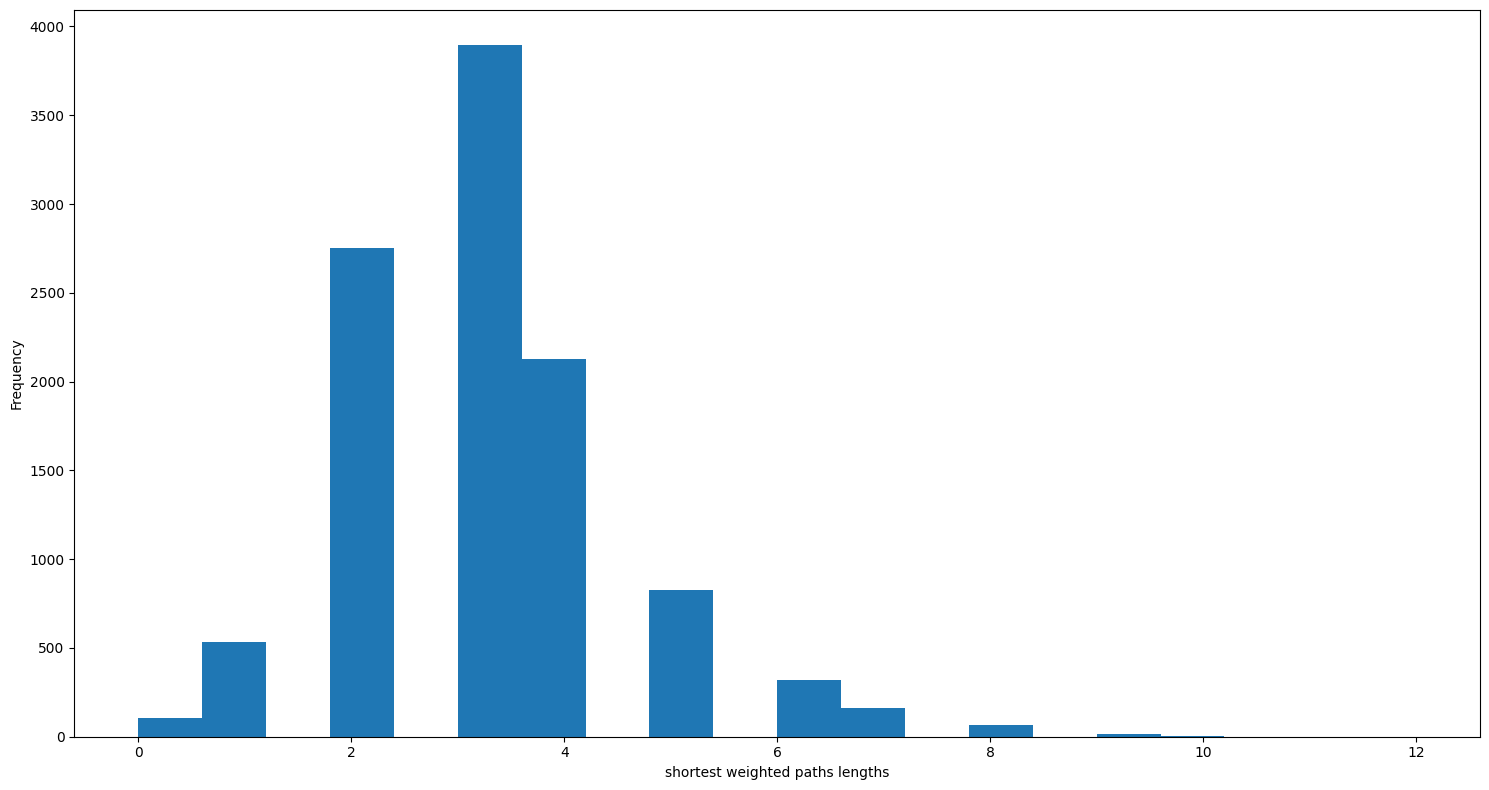

In [266]:
lens = nx.shortest_path_length(G_strong, weight = 'weight')
spl = []
for source, dic in lens:
    for target in dic:
        spl.append(dic[target])

fig, ax = plt.subplots(ncols=1, figsize=(15, 8))

ax.hist(spl, bins=20)
ax.set_xlabel('shortest weighted paths lengths')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

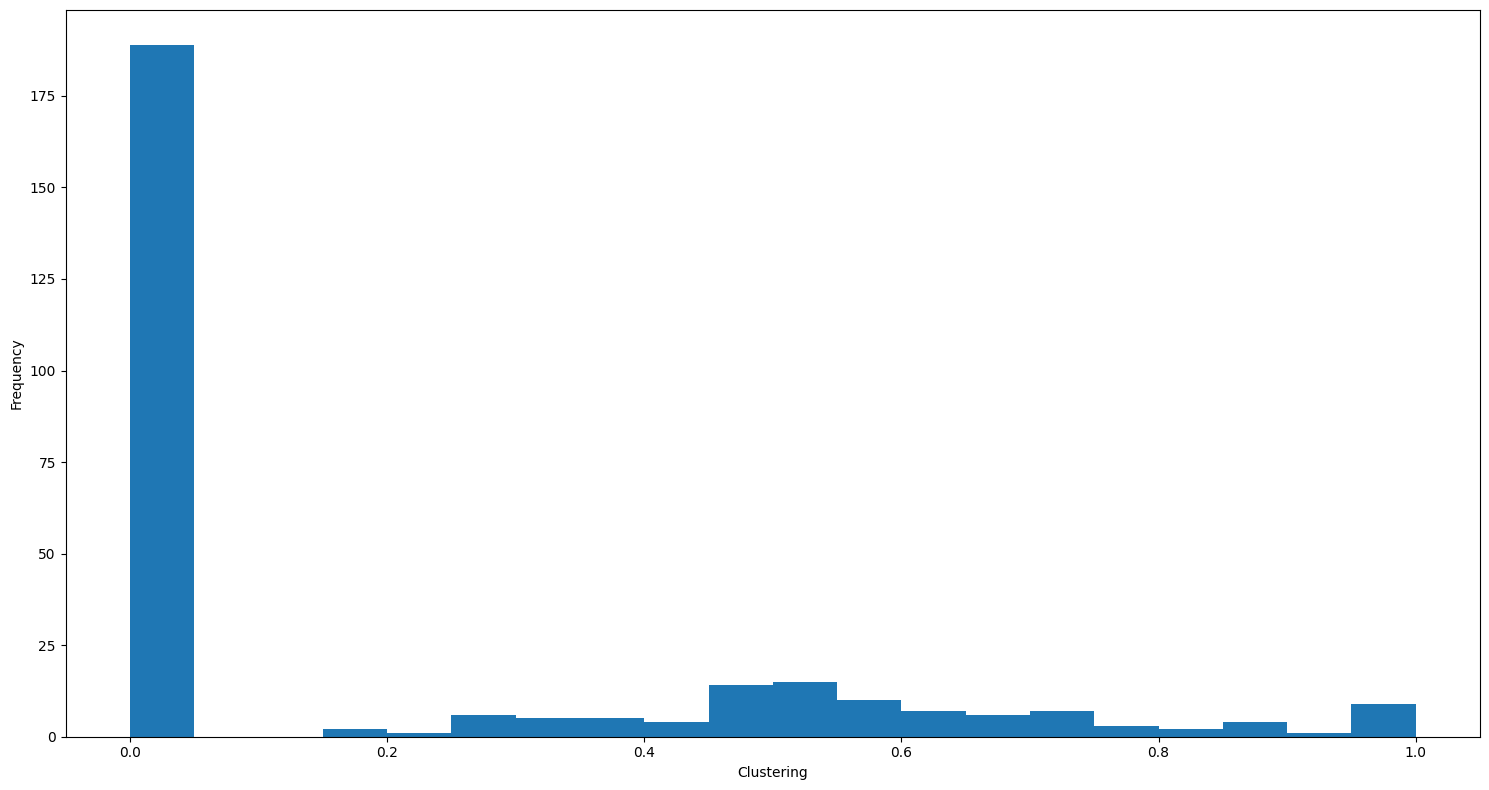

In [267]:
from matplotlib.cm import ScalarMappable
lcc = nx.clustering(G)

cmap = plt.get_cmap('autumn')
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in G.nodes]

fig, ax = plt.subplots(ncols=1, figsize=(15, 8))
#nx.draw_spring(G, node_color=node_colors, with_labels=True, ax=ax1)
#fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)

ax.hist(lcc.values(), bins=20)
ax.set_xlabel('Clustering')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

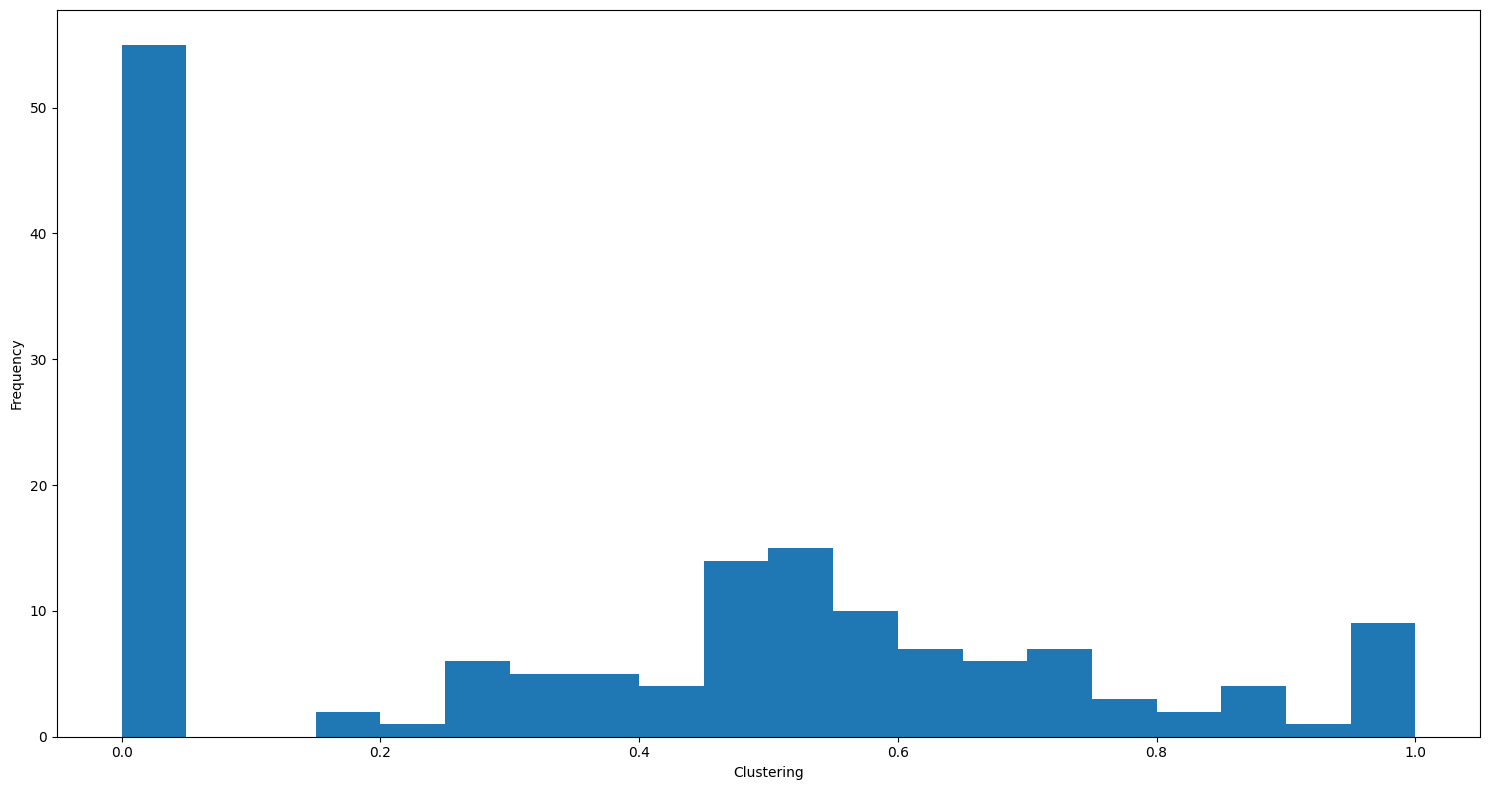

In [268]:
lcc = nx.clustering(G_cut)

fig, ax = plt.subplots(ncols=1, figsize=(15, 8))
#nx.draw_spring(G_cut, node_color=node_colors, with_labels=True, ax=ax1)
#fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)

ax.hist(lcc.values(), bins=20)
ax.set_xlabel('Clustering')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

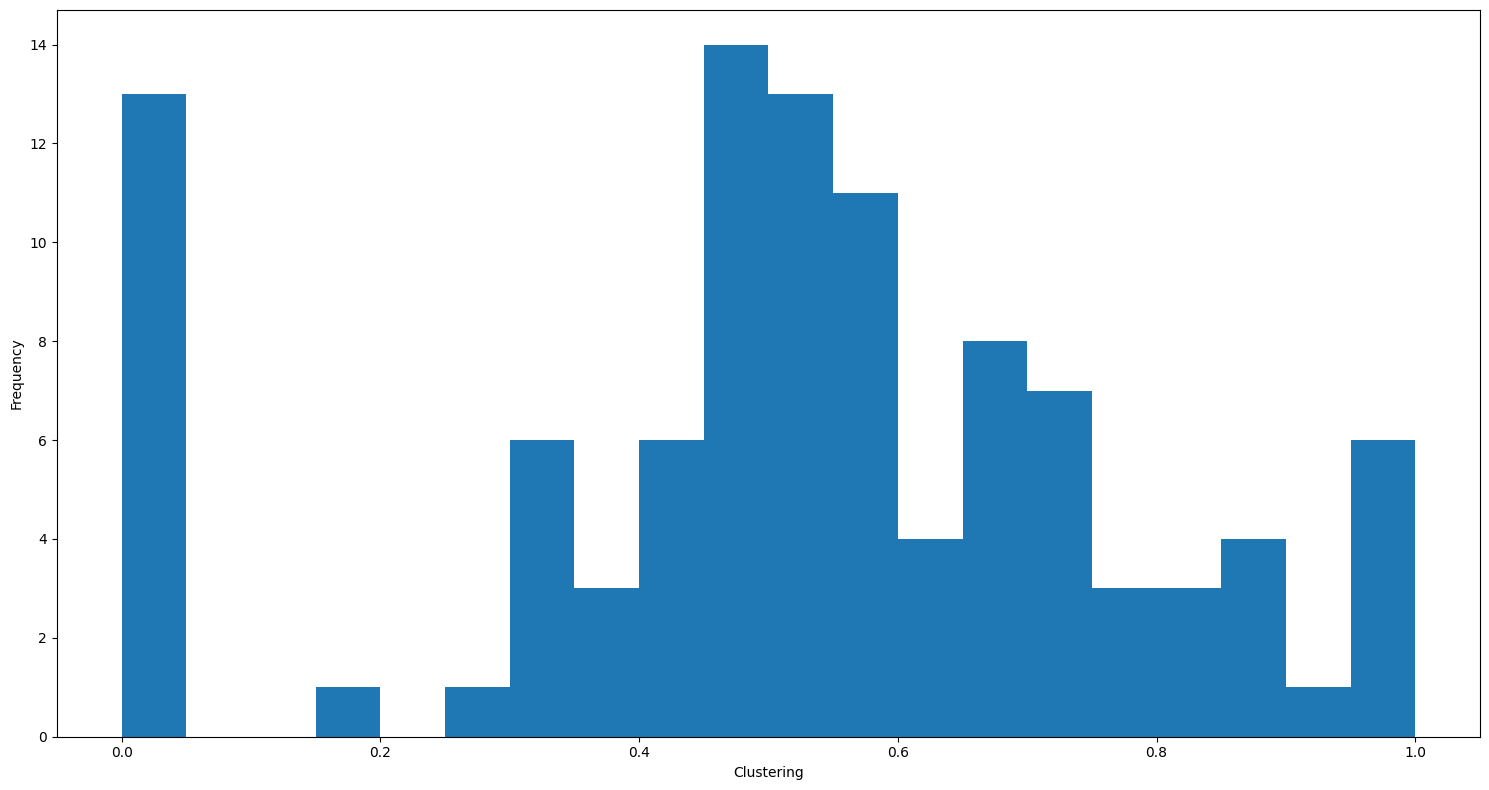

In [269]:
lcc = nx.clustering(G_strong)


fig, ax = plt.subplots(ncols=1, figsize=(15, 8))
#nx.draw_spring(G_strong, node_color=node_colors, with_labels=True, ax=ax1)
#fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)

ax.hist(lcc.values(), bins=20)
ax.set_xlabel('Clustering')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## визуализируем граф инструментами NetworkX

In [270]:
def get_all_params(graph):
    layout = nx.kamada_kawai_layout(graph)
    #layout = nx.spring_layout(graph)
    params = {'nodes_params':{'G': graph, 'pos': layout, 'node_color': [], 'node_size': []},
              'edges_params':{'G': graph, 'pos': layout, 'width': [], 'alpha': 0.4},
              'labels_param_list':[],
              'area':[layout[user_to_index['dcayorcus']][0], layout[user_to_index['janzepp']][0], layout[user_to_index['teemok']][1], layout[user_to_index['vellrus']][1]]}

    nodes = []
    degrees = []
    for node in graph:
        params['nodes_params']['node_color'].append(np.array([graph.nodes[node]['color']['r'], graph.nodes[node]['color']['g'], graph.nodes[node]['color']['b']]))
        params['nodes_params']['node_size'].append(graph.nodes[node]['size']*2)
        nodes.append(node)
        degrees.append(graph.in_degree(weight = 'weight')[node])

    for ed in graph.edges:
        params['edges_params']['width'].append(np.log(graph.edges[ed]['weight'])/4)

    inds = np.argsort(np.array(degrees))
    nodes_sorted = [nodes[e] for e in inds]
    deg = 6
    dic = {'G':graph,
            'pos':layout,
            'labels': {},
            'font_size':0.4*deg**(2/3)}
    for node in nodes_sorted:
        if graph.in_degree(weight = 'weight')[node] >= 6:
            if graph.in_degree(weight = 'weight')[node] > deg:
                deg = graph.in_degree(weight = 'weight')[node]
                params['labels_param_list'].append(dic)
                dic = {'G':graph,
                        'pos':layout,
                        'labels': {},
                        'font_size':0.4*deg**(2/3)}
            dic['labels'][node] = graph.nodes[node]['label']
    params['labels_param_list'].append(dic)
    return params

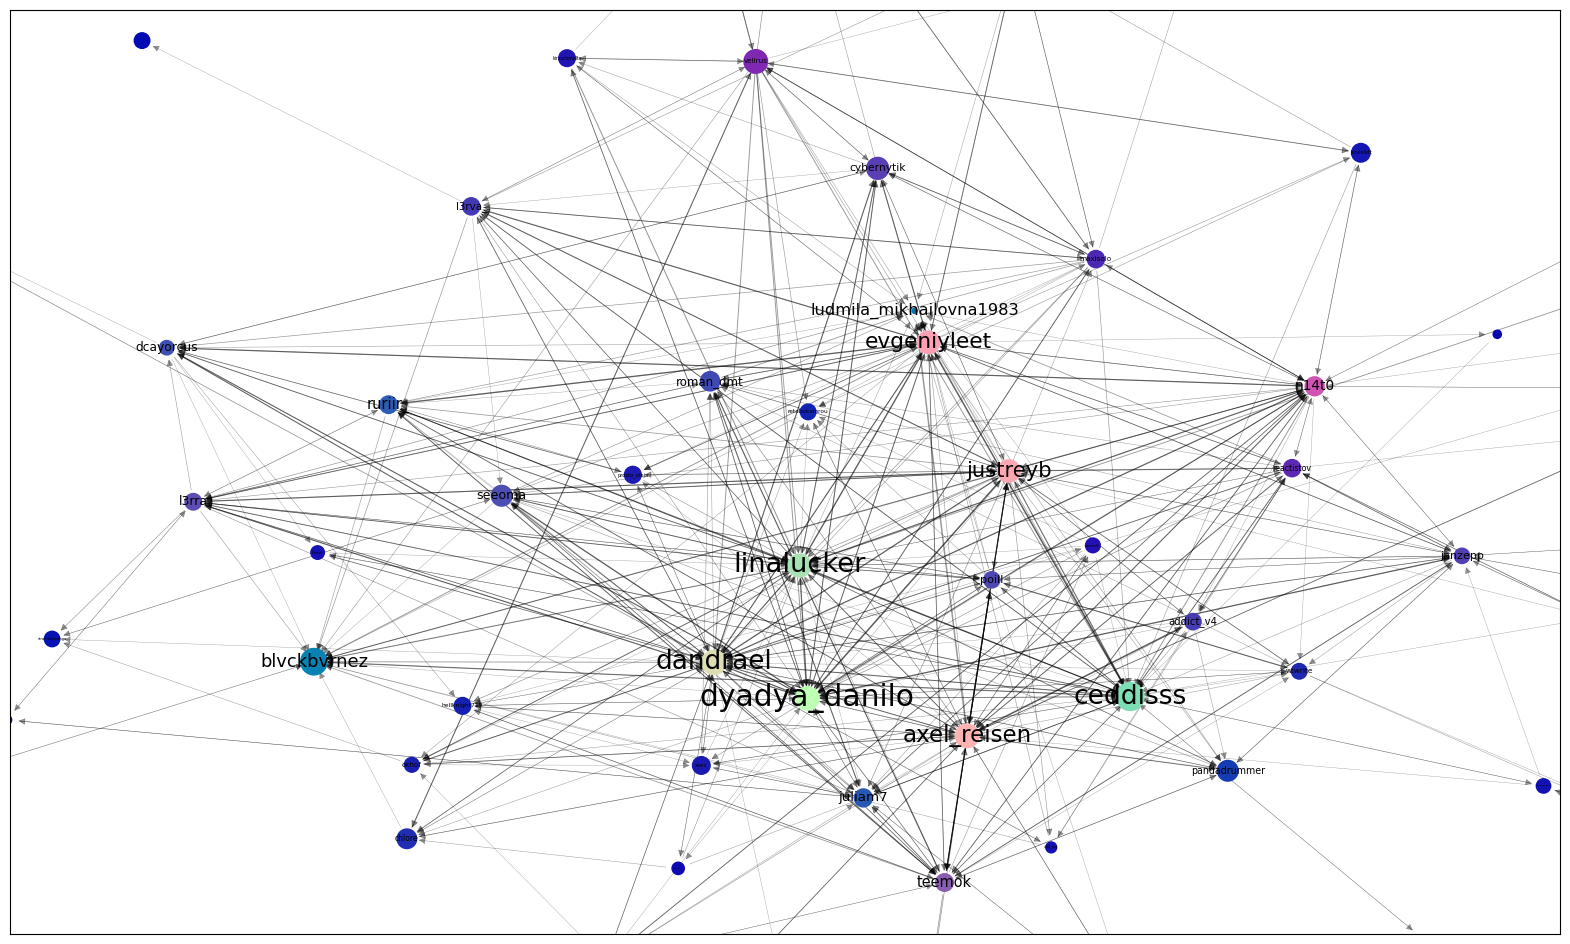

In [271]:
all_params = get_all_params(G_cut2)
plt.figure(figsize=(20, 12))
nx.draw_networkx_nodes(**all_params['nodes_params'])
nx.draw_networkx_edges(**all_params['edges_params'])
for params in all_params['labels_param_list']:
    nx.draw_networkx_labels(**params)
plt.xlim(all_params['area'][0] - 0.08, all_params['area'][1] + 0.05)
plt.ylim(all_params['area'][2] - 0.05, all_params['area'][3] + 0.05)
plt.show()

## проверяем на соответствие power law

In [272]:
def empirical_cdf(g: nx.Graph):
    #distribution = nx.degree_histogram(g)
    distribution = np.array(g.degree(weight = 'weight'))[:, 1]
    print(distribution)
    ecdf = []
    Sum = 0
    for n in distribution:
        Sum += n
    currentSum = 0
    for n in distribution:
        currentSum += n/Sum
        ecdf.append(currentSum)
    return np.array(ecdf)

def power_law_pdf(x, alpha=3.5, x_min=1):
    C = (alpha - 1) / x_min ** (1 - alpha)
    return C * x ** (-alpha)

def power_law_cdf(x, alpha=3.5, x_min=1):
    c = (alpha - 1)/(x_min**(1 - alpha))
    cdf = 1 + c*(x**(1-alpha)/(1-alpha))
    return cdf
def power_law_ppf(r, alpha=3.5, x_min=1):
    c = (alpha - 1)/(x_min**(1 - alpha))
    ppf = ((1 - alpha)*(r - 1)/c)**(1/(1 - alpha))
    return ppf

def power_law_generate(n, alpha=3.5, x_min=1, random_seed=1):
    np.random.seed(random_seed)
    uni_sample = np.random.uniform(0, 0.999, n)
    return power_law_ppf(uni_sample, alpha, x_min)

def alpha_log_bins(x_train, bins):
    max_x = np.max(x_train)
    min_x = np.min(x_train)
    bin_edges = [min_x]
    cur_value = bin_edges[0]
    multiplier = (max_x/min_x)**(1/bins)
    for i in range(bins - 1):
        cur_value = cur_value * multiplier
        bin_edges.append(cur_value)

    hist, bin_edges = np.histogram(x_train, bins=bin_edges, density=True)
    bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
    idx = np.argwhere(hist > 0)
    x1 = np.log(bin_centers[idx])[:, 0]
    x2 = np.ones(len(idx))
    X = np.stack([x1, x2], axis=1)
    y = np.log(hist[idx])
    coef, intercept = (np.linalg.pinv(X) @ y)[:, 0]
    return -coef

[564 225 719 270 705 725 639 675 685 248 252 131 128 221 473  71  80 201
  85 377 224 203 189 216  74  88  25  86  91 277  28 212 241   1  68  83
 118  19  38 238  93  85  42  28 229  60  31  66  39  38   7  33  58   1
   3  21   7   1  21  16  10  27  25   4  14   1  34   2   3   7  14   3
  10  29  14   1  19   4   3   1   1   2  17   7   3   1   3   4   5   7
   3   7   5   4   7   1   4   7   4   6  18  16   1   3  10   4   6   1
   1   2   3   1   3   1   6   1   1   2   2   1   5  13   2   3   1   6
   2   1  10 191   1   1   5   1   2   2   1   1   2   2   3   3   1   1
   1   1   1   1   2   3   1   1   1   1   1   2]


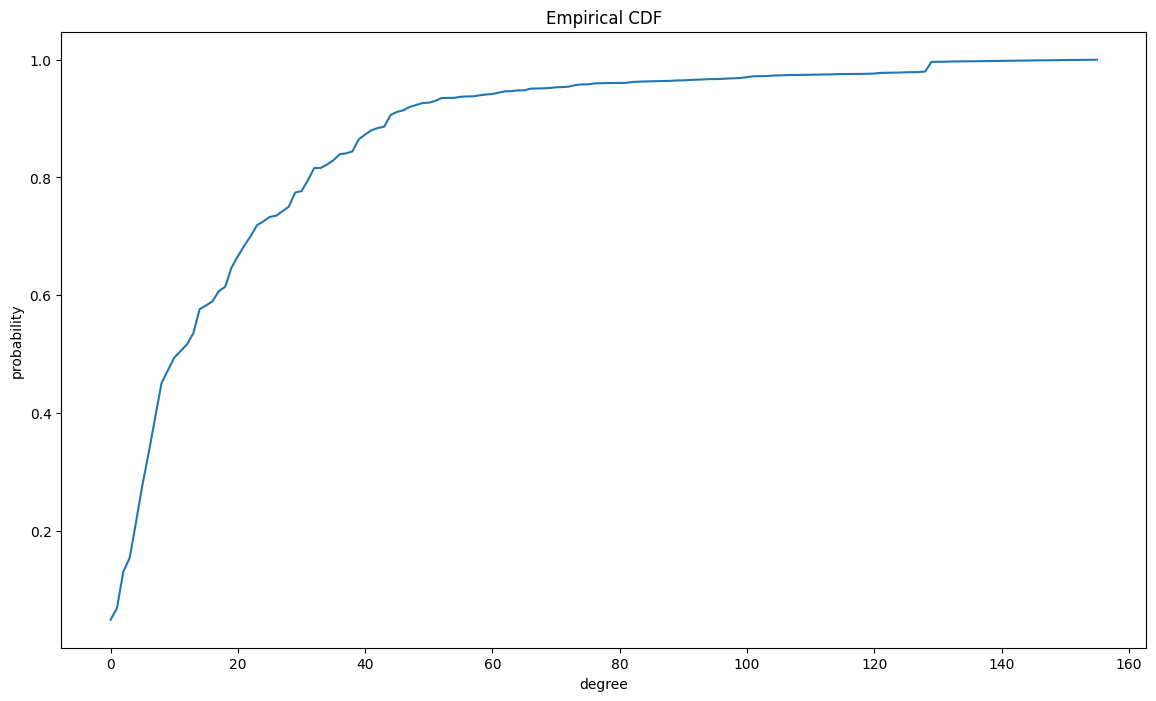

In [273]:
ecdf = empirical_cdf(G_cut)
plt.figure(figsize=(14, 8))
plt.plot(ecdf)
plt.xlabel('degree')
plt.ylabel('probability')
plt.title('Empirical CDF')
plt.show()

In [274]:
def al(x_min, seq):
    n = len(seq)
    Sl = np.sum(np.log(np.array(seq)/x_min))
    return 1 + n*Sl**(-1)
def mle_power_law_params(degree_sequence):
    #print(degree_sequence)
    degrees = list(set(degree_sequence))
    best = [99999, 0, 0]
    #print(degrees)
    xmins = np.arange(start = round(min(degree_sequence)), stop = round(max(degree_sequence)), step = 1)
    #print(xmins)
    for x in xmins:
        x_min = x
        current_sequence = [item for item in degree_sequence if item >= x_min]

        alpha = al(x_min, current_sequence)
        #p_value = stats.kstest(rvs = current_sequence, cdf = power_law_cdf, args = (alpha, x_min))[1]
        #p_value = stats.kstest(rvs = degree_sequence, cdf = power_law_cdf, args = (alpha, x_min))[1]
        statistics = stats.kstest(rvs = current_sequence, cdf = power_law_cdf, args = (alpha, x_min))[0]
        if statistics < best[0]:
            best = deepcopy([statistics, x_min, alpha])
        #if p_value > best[0]:
        #    print(p_value)
        #    best = deepcopy([p_value, x_min, alpha])
    print(best)
    return best[2], best[1]

In [275]:
degree_sequence_in = np.array(G_cut.in_degree(weight = 'weight'))[:, 1]
degree_sequence_out = np.array(G_cut.out_degree(weight = 'weight'))[:, 1]
degree_sequence = np.array(G_cut.degree(weight = 'weight'))[:, 1]
print(degree_sequence_out)
print(degree_sequence_in)
print(G_cut.degree(weight = 'weight'))

[204  13 361 205 414 310 272 416 413 146 125  34  53 102 338  33  40  60
  42 225  74 109 123 151  32  45   1  34  57 152   8 115 127   0  41  26
  52   2   8 135  43  58   9   9 101  30  15  36   9  24   1  17  33   0
   0  10   6   0  11   9   5  12  13   4   3   1  16   1   1   5   5   1
   5  10  10   0  10   4   3   0   0   0  14   4   2   0   3   2   2   3
   3   3   2   3   7   1   4   6   1   2   9   8   0   1   6   2   5   0
   0   1   1   1   1   1   2   0   1   1   0   0   4  13   0   3   1   3
   0   0   3   2   1   1   3   0   1   1   0   0   1   0   2   2   0   0
   0   1   1   1   1   0   0   1   0   0   0   1]
[360 212 358  65 291 415 367 259 272 102 127  97  75 119 135  38  40 141
  43 152 150  94  66  65  42  43  24  52  34 125  20  97 114   1  27  57
  66  17  30 103  50  27  33  19 128  30  16  30  30  14   6  16  25   1
   3  11   1   1  10   7   5  15  12   0  11   0  18   1   2   2   9   2
   5  19   4   1   9   0   0   1   1   2   3   3   1   1   0   2   3   4
 

<ipython-input-272-35b11073673b>:20: RuntimeWarning: divide by zero encountered in double_scalars
  c = (alpha - 1)/(x_min**(1 - alpha))
<ipython-input-272-35b11073673b>:21: RuntimeWarning: invalid value encountered in multiply
  cdf = 1 + c*(x**(1-alpha)/(1-alpha))


[0.10989339610066262, 2, 1.4217475616404887]


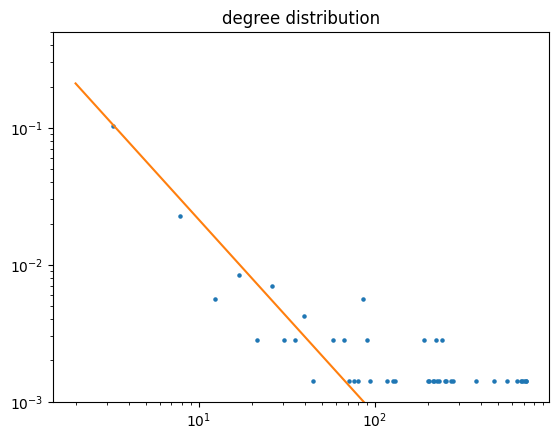

In [276]:
hist, bin_edges = np.histogram(degree_sequence, bins=159, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers[hist > 0], hist[hist > 0], s=5)
plt.title('degree distribution')

hat_alpha, hat_x_min = mle_power_law_params(degree_sequence)
x_space = np.linspace(hat_x_min, degree_sequence.max(), 100)
plt.plot(x_space, power_law_pdf(x_space, hat_alpha, hat_x_min),
         label='Estimated PDF', c='tab:orange')
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.001, 0.5);

<ipython-input-274-659bc3c2851a>:3: RuntimeWarning: divide by zero encountered in divide
  Sl = np.sum(np.log(np.array(seq)/x_min))
<ipython-input-274-659bc3c2851a>:3: RuntimeWarning: invalid value encountered in divide
  Sl = np.sum(np.log(np.array(seq)/x_min))
<ipython-input-272-35b11073673b>:20: RuntimeWarning: divide by zero encountered in double_scalars
  c = (alpha - 1)/(x_min**(1 - alpha))
<ipython-input-272-35b11073673b>:21: RuntimeWarning: invalid value encountered in multiply
  cdf = 1 + c*(x**(1-alpha)/(1-alpha))


[0.11811016250455053, 2, 1.4702664045266258]


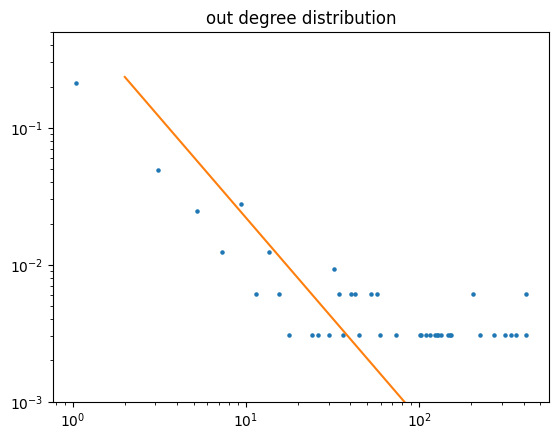

In [277]:
hist, bin_edges = np.histogram(degree_sequence_out, bins=200, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers[hist > 0], hist[hist > 0], s=5)
plt.title('out degree distribution')

out_hat_alpha, out_hat_x_min = mle_power_law_params(degree_sequence_out)
x_space = np.linspace(out_hat_x_min, degree_sequence_out.max(), 100)
plt.plot(x_space, power_law_pdf(x_space, out_hat_alpha, out_hat_x_min),
         label='Estimated PDF', c='tab:orange')
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.001, 0.5);

<ipython-input-274-659bc3c2851a>:3: RuntimeWarning: divide by zero encountered in divide
  Sl = np.sum(np.log(np.array(seq)/x_min))
<ipython-input-274-659bc3c2851a>:3: RuntimeWarning: invalid value encountered in divide
  Sl = np.sum(np.log(np.array(seq)/x_min))
<ipython-input-272-35b11073673b>:20: RuntimeWarning: divide by zero encountered in double_scalars
  c = (alpha - 1)/(x_min**(1 - alpha))
<ipython-input-272-35b11073673b>:21: RuntimeWarning: invalid value encountered in multiply
  cdf = 1 + c*(x**(1-alpha)/(1-alpha))


[0.11252568421508236, 88, 2.5295970995078143]


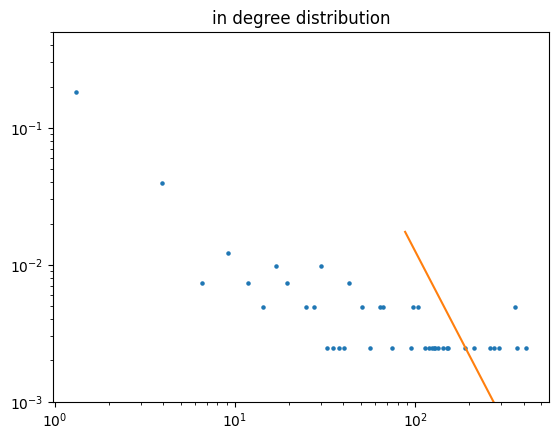

In [278]:
hist, bin_edges = np.histogram(degree_sequence_in, bins=159, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers[hist > 0], hist[hist > 0], s=5)
plt.title('in degree distribution')

in_hat_alpha, in_hat_x_min = mle_power_law_params(degree_sequence_in)
x_space = np.linspace(in_hat_x_min, degree_sequence_in.max(), 100)
plt.plot(x_space, power_law_pdf(x_space, in_hat_alpha, in_hat_x_min),
         label='Estimated PDF', c='tab:orange')
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.001, 0.5);

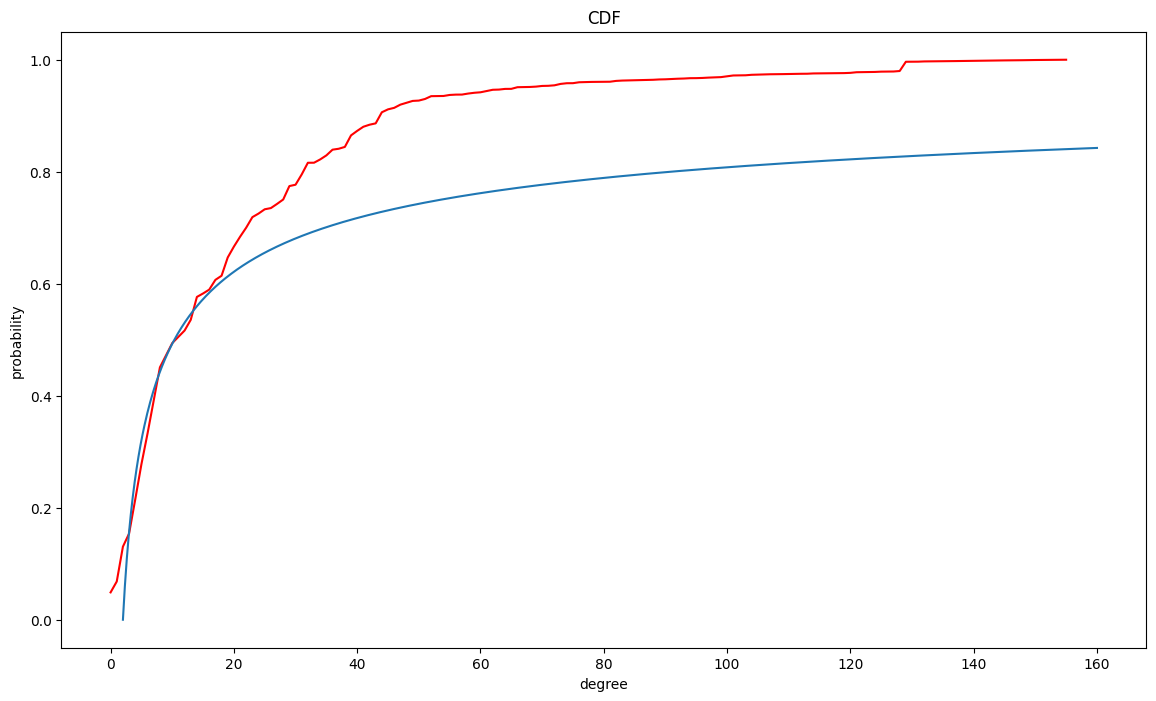

In [279]:
x_space = np.linspace(2, 160, 1000)
plt.figure(figsize=(14, 8))
plt.plot(ecdf, color = 'red')
plt.plot(x_space, power_law_cdf(x_space, hat_alpha, hat_x_min))
plt.xlabel('degree')
plt.ylabel('probability')
plt.title('CDF')
plt.show()

## проверяем, какая модель случайного графа лучше всего соответствует нашему

In [280]:
def random_edges(nodes, p):
    edges = []
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if np.random.random() < p and i != j:
                edges.append((nodes[i], nodes[j]))
    return np.array(edges)

def erdos_renyi_graph(n, p):
    G = nx.DiGraph()
    nodes = np.arange(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_edges(nodes, p))
    return G

def estimate_binomial(G):
    n = len(G.nodes)
    N = n*(n-1)
    p = len(G.edges)/N
    return n, p

def random_from_real(graph):
    n, p = estimate_binomial(graph)
    G = erdos_renyi_graph(n, p)
    return G, n, p

def node_degree_clustering(graph):
    C = []
    d = []
    for node in graph:
        C.append(nx.clustering(graph, node))
        d.append(graph.degree[node])
    return np.array(d), np.array(C)

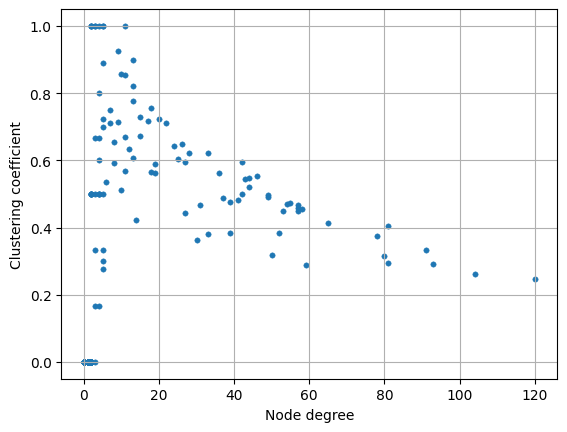

In [281]:
degree, clustering = node_degree_clustering(G)
plt.scatter(degree, clustering, s=15, linewidths=0.3)
plt.xlabel('Node degree')
plt.ylabel('Clustering coefficient')
plt.grid()
plt.show()

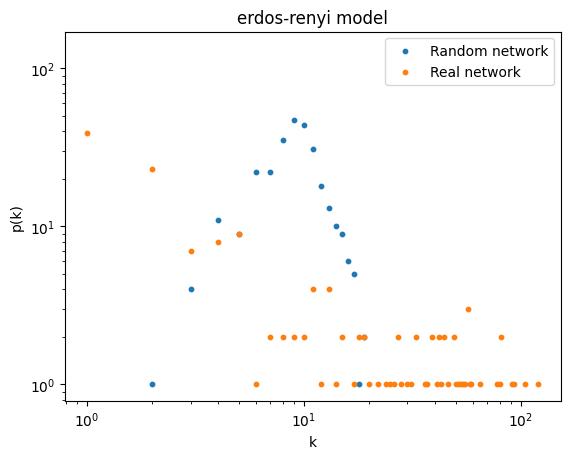

In [282]:
random_net, n, p = random_from_real(G)
degree_hist = np.array(nx.degree_histogram(random_net))
idx = np.argwhere(degree_hist > 0)
plt.scatter(idx, degree_hist[idx], s=10, label='Random network')
degree_hist = np.array(nx.degree_histogram(G))
idx = np.argwhere(degree_hist > 0)
plt.scatter(idx, degree_hist[idx], s=10, label='Real network')
plt.legend()
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('erdos-renyi model')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [283]:
print(n, p, n*p)
for component in nx.weakly_connected_components(random_net):
    if len(component) > 1:
        print(len(component))
for component in nx.strongly_connected_components(random_net):
    if len(component) > 1:
        print(len(component))
        random_net_strong = random_net.subgraph(component)

print('Radius of strongly connected component: ', nx.radius(G_strong), nx.radius(random_net_strong))
print('Diameter of strongly connected component: ', nx.diameter(G_strong), nx.radius(random_net_strong))
print('Average shortest path length of strongly connected component: ', nx.average_shortest_path_length(G_strong), nx.radius(random_net_strong))
print('Average clustering coefficient:',
      '\nof full graph:', nx.average_clustering(G), nx.average_clustering(random_net),
      '\nof the only one strongly connected component:', nx.average_clustering(G_strong), nx.average_clustering(random_net_strong))

290 0.01623911227777115 4.709342560553633
290
285
Radius of strongly connected component:  3 5
Diameter of strongly connected component:  5 5
Average shortest path length of strongly connected component:  2.305171769977595 5
Average clustering coefficient: 
of full graph: 0.2011130485918969 0.01740698763157927 
of the only one strongly connected component: 0.5172525700910724 0.017096673290117423


In [284]:
def watts_strogatz_graph(n, k, p):
    G = ring_lattice(n, k)
    for node in tqdm(G.nodes):
        rewire(G, node, k, p)
    return G

def ring_lattice(n, k):
    G = nx.DiGraph()
    k = 2*(k//2)
    for i in range(n):
        G.add_edge(i, (i+1)%n)
    for i in range(n):
        for j in range(2, k//2 + 1):
            G.add_edge(i, (i+j)%n)
    return G

def rewire(G, node, k, p):
    k = 2*(k//2)

    for j in range(k//2):
        rw = np.random.choice(2, p = [1-p, p])
        if rw == 1:
            newNeighbour = np.random.choice(list(G.nodes))
            if not(newNeighbour == node or (node, newNeighbour) in set(list(G.edges)) or (newNeighbour, node) in set(list(G.edges))):
                #print((node, newNeighbour), 'not in edges')
                #print((node, (node + j + 1)%n), 'edge removed')
                G.remove_edge(node, (node + j + 1)%n)
                G.add_edge(node, newNeighbour)


In [285]:
k_e = np.mean(np.array(G_cut.degree(weight = 'weight'))[:, 1])
print(k_e)

74.06410256410257


In [286]:
#k, p = 38, 0.3
k, p = 18, 0.999
GWS = watts_strogatz_graph(n, k, p)
for component in nx.strongly_connected_components(GWS):
    if len(component) > 1:
        print(len(component))
        GWSS = GWS.subgraph(component)
print(nx.radius(GWSS), nx.diameter(GWSS), nx.average_shortest_path_length(GWSS), nx.average_clustering(GWS))

100%|██████████| 290/290 [00:04<00:00, 70.21it/s]


290
4 5 2.776912062999642 0.028728969631746946


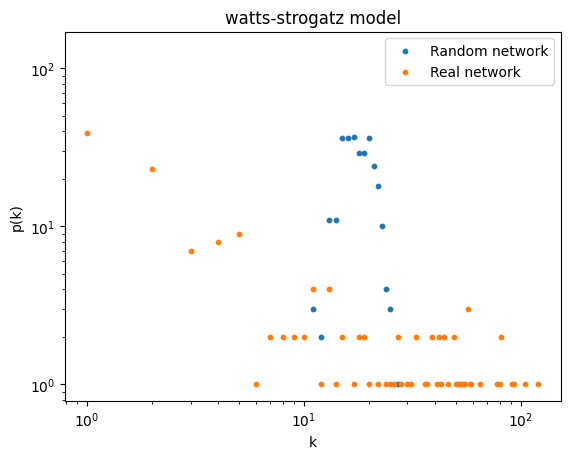

In [287]:
degree_hist = np.array(nx.degree_histogram(GWSS))
idx = np.argwhere(degree_hist > 0)
plt.scatter(idx, degree_hist[idx], s=10, label='Random network')
degree_hist = np.array(nx.degree_histogram(G))
idx = np.argwhere(degree_hist > 0)
plt.scatter(idx, degree_hist[idx], s=10, label='Real network')
plt.legend()
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('watts-strogatz model')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [288]:
def barabasi_albert_graph(n, m):
    G = nx.star_graph(m)
    for i in range(1, n - m):
        attach(m + i, G, m)
    return G

def attach(node, G, m):
    repeatedNodes = []
    for edge in G.edges:
        repeatedNodes.append(edge[0])
        repeatedNodes.append(edge[1])
    #print(repeatedNodes)
    for i in range(m):
        connect = random.choice(repeatedNodes)
        G.add_edge(node, connect)
        repeatedNodes = [t for t in repeatedNodes if t != connect]

156
1
156
7 13 5.379569892473119 0.0


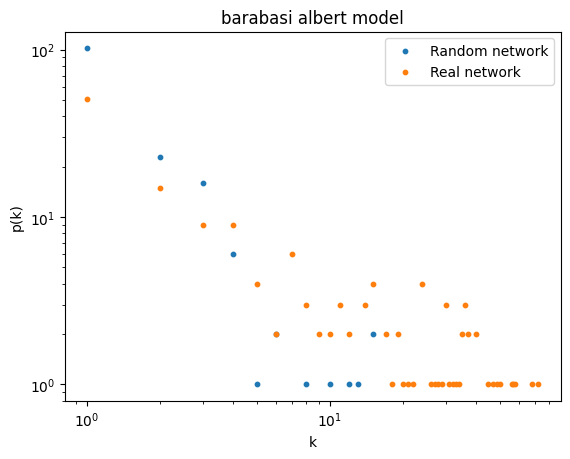

2
156
3 5 3.2283705541770056 0.10417182765116029


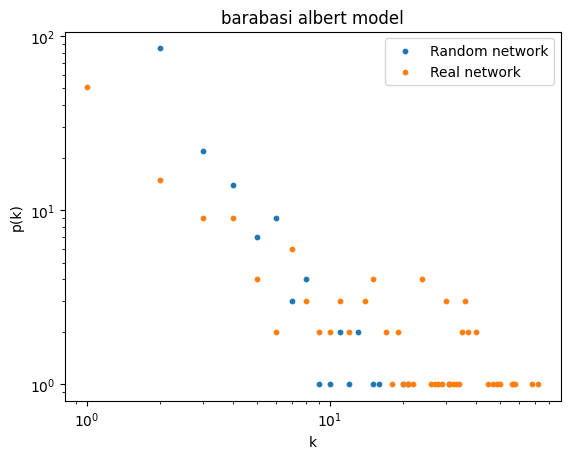

3
156
3 5 2.7571546732837056 0.1345056656316433


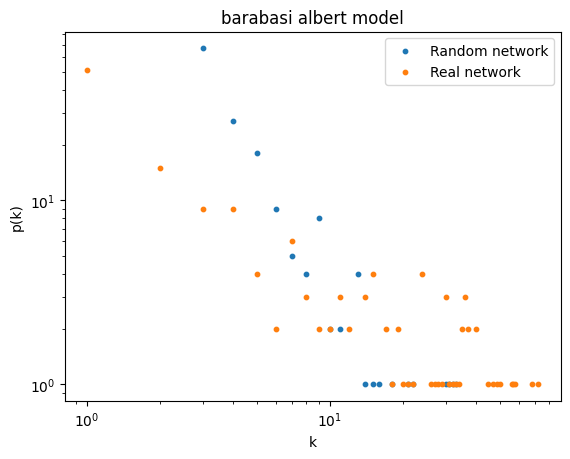

In [289]:
ms = np.arange(1, 4, 1)
n = len(G_und.nodes)
print(n)
for m in ms:
    print(m)
    GBA = barabasi_albert_graph(n, m)
    print(len(GBA.nodes))
    print(nx.radius(GBA), nx.diameter(GBA), nx.average_shortest_path_length(GBA), nx.average_clustering(GBA))

    degree_hist = np.array(nx.degree_histogram(GBA))
    idx = np.argwhere(degree_hist > 0)
    plt.scatter(idx, degree_hist[idx], s=10, label='Random network')
    degree_hist = np.array(nx.degree_histogram(G_und))
    idx = np.argwhere(degree_hist > 0)
    plt.scatter(idx, degree_hist[idx], s=10, label='Real network')
    plt.legend()
    plt.xlabel('k')
    plt.ylabel('p(k)')
    plt.title('barabasi albert model')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

## считаем самые центральные вершины

In [290]:
def centralities(G: nx.Graph):
    return {
        'degree': np.array([dc for dc in nx.degree_centrality(G).values()]),
        'closeness': np.array([dc for dc in nx.closeness_centrality(G).values()]),
        'betweenness': np.array([dc for dc in nx.betweenness_centrality(G).values()])
    }

def trans_to_df(G, sorted, array):
    row_list = []
    for i in sorted:
        dic_not_df = {}
        dic_not_df['username'] = G.nodes[i]['label']
        dic_not_df['centrality'] = array[i]
        row_list.append(dic_not_df)
    df = pd.DataFrame(row_list)
    return df




def top10_centralities(G: nx.Graph):
    degree_array = np.array([dc for dc in nx.degree_centrality(G).values()])
    closeness_array = np.array([dc for dc in nx.closeness_centrality(G).values()])
    betweenness_array = np.array([dc for dc in nx.betweenness_centrality(G).values()])
    deg_sorted = np.argsort(degree_array)[::-1][:10]
    clo_sorted = np.argsort(closeness_array)[::-1][:10]
    bet_sorted = np.argsort(betweenness_array)[::-1][:10]

    diccent = nx.degree_centrality(G)
    deg_df = trans_to_df(G, deg_sorted, degree_array)
    clo_df = trans_to_df(G, clo_sorted, closeness_array)
    bet_df = trans_to_df(G, bet_sorted, betweenness_array)



    dic = {'degree': deg_df, 'closeness': clo_df, 'betweenness': bet_df}
    return dic


Degree centrality


username  centrality
0       dandrael    0.415225
1       justreyb    0.359862
2       ceddisss    0.321799
3     linalucker    0.314879
4  dyadya_danilo    0.280277
5          n14t0    0.280277
6    axel_reisen    0.276817
7    evgeniyleet    0.269896
8         teemok    0.224913
9        vellrus    0.204152

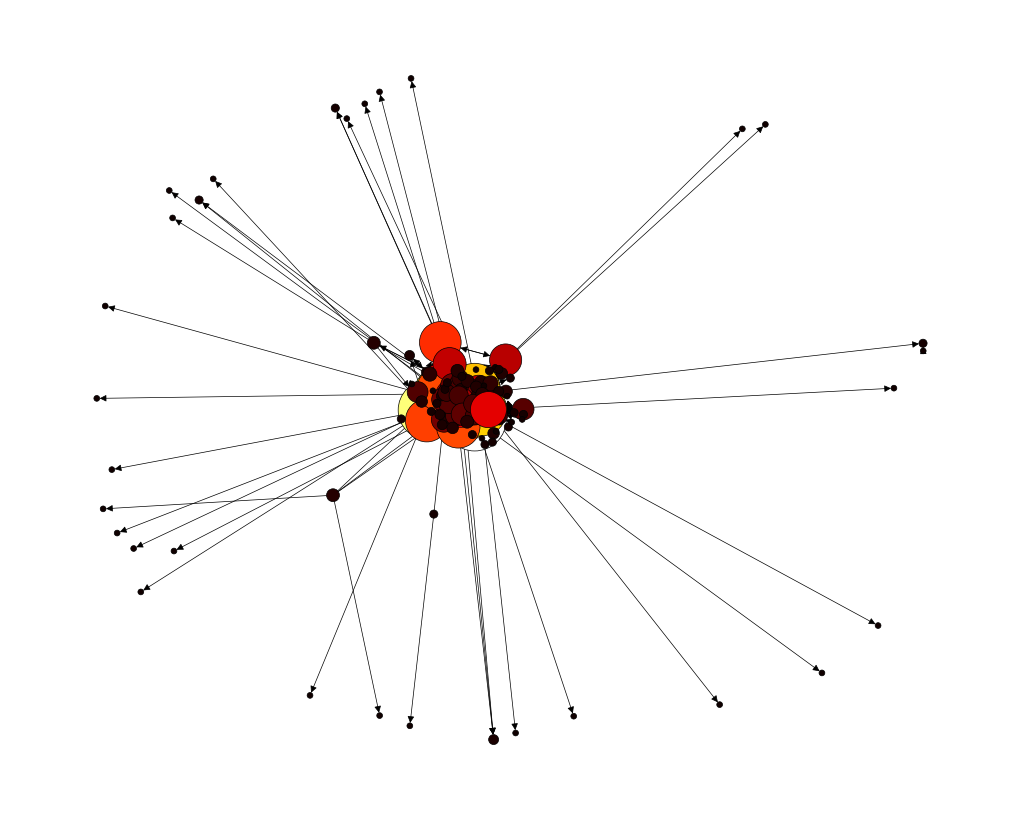

Closeness centrality


username  centrality
0                 ceddisss    0.263387
1                 dandrael    0.260805
2               linalucker    0.252152
3              blvckbvrnez    0.242941
4            dyadya_danilo    0.242941
5                 justreyb    0.242941
6  ludmila_mikhailovna1983    0.238584
7                  juliam7    0.235417
8              axel_reisen    0.234380
9              evgeniyleet    0.234380

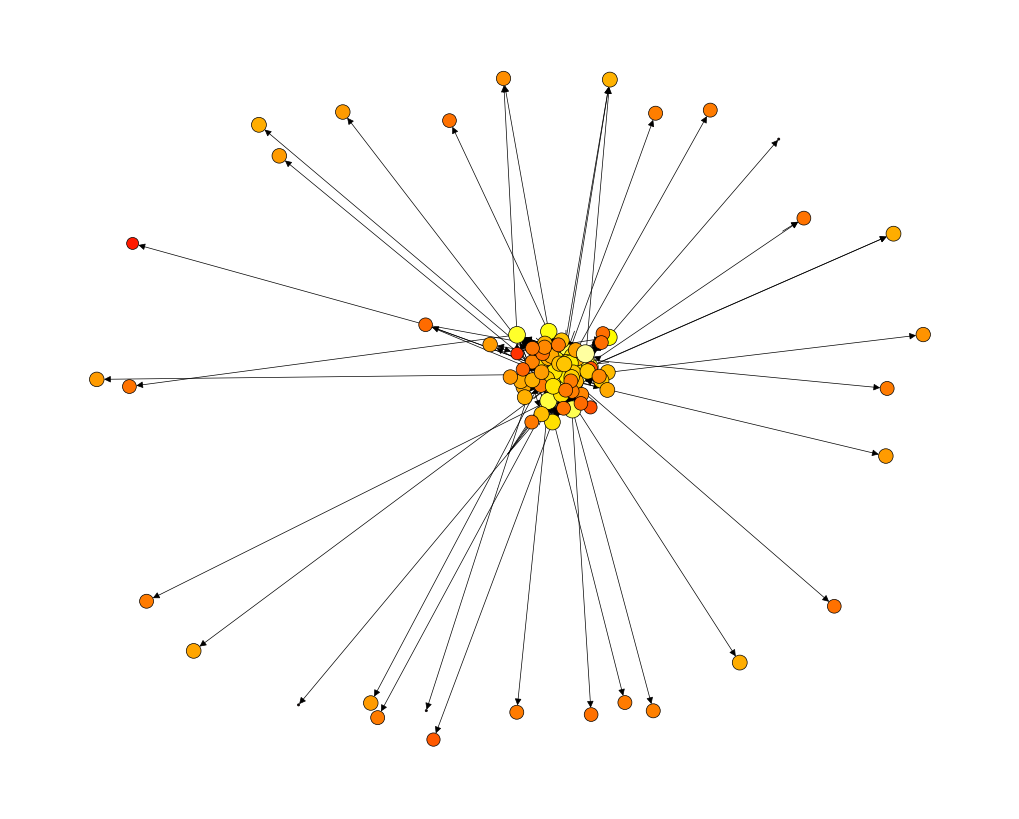

Betweenness centrality


username  centrality
0     dandrael    0.031758
1     justreyb    0.028898
2     ceddisss    0.023261
3      vellrus    0.020094
4        n14t0    0.020040
5   linalucker    0.016898
6  evgeniyleet    0.011141
7  axel_reisen    0.010768
8    roman_dmt    0.008331
9       teemok    0.008269

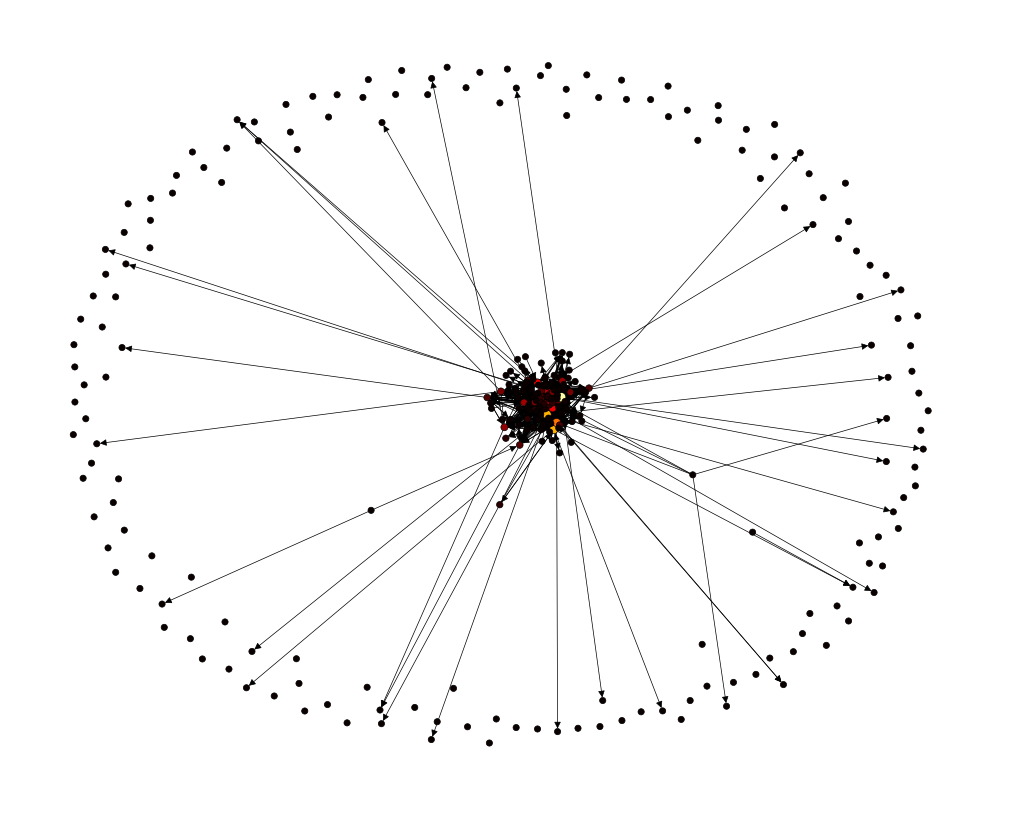

In [291]:
c = centralities(G)
cases = [['degree', 5000, 0, 'Degree centrality'],
         ['closeness', 700, 0, 'Closeness centrality'],
         ['betweenness', 900, 20, 'Betweenness centrality']]
top_dfs = top10_centralities(G)

for c_key, scale, bias, title in cases:
    print(title)
    display(top_dfs[c_key])
    plt.figure(figsize=(10, 8))
    nx.draw(G,
            width=0.5,
            linewidths=0.5,
            edgecolors='black',
            cmap=plt.cm.hot,
            node_size=c[c_key]*scale + bias,
            node_color=c[c_key])
    plt.show()

In [292]:
def pearson_correlation(i_vals: np.array, j_vals: np.array):
    return np.corrcoef(i_vals, j_vals)[0][1]

In [293]:
print(Suniqq)
num_mes = [S[1] for S in Suniqq]
print(num_mes)

[('ceddisss', 8236), ('blvckbvrnez', 6722), ('dandrael', 4668), ('vellrus', 4256), ('axel_reisen', 4203), ('dyadya_danilo', 4071), ('linalucker', 3633), ('evgeniyleet', 3426), ('justreyb', 3339), ('cybernytik', 3166), ('seeoma', 2552), ('pandadrummer', 2518), ('chlore', 2007), ('roman_dmt', 1913), ('n14t0', 1753), ('jetviolett', 1649), ('ne_cott3r', 1471), ('juliam7', 1439), ('xseix', 1342), ('teemok', 1302), ('ruriir_', 1299), ('l3rva_', 1215), ('maxisolo', 1209), ('reactistov', 1207), ('fahafatesanat_t', 1112), ('prosto_oleja', 1102), ('truephotoonelove', 1083), ('hellknight719', 1074), ('kiraschmidtq', 1059), ('l3rra', 1035), ('mintywrinkles3', 1023), ('addict_v4', 976), ('poill', 941), ('vaicel_nick', 877), ('chevapchi4i', 837), ('retabokainrou', 831), ('wtwrite', 806), ('sbermarketeda', 804), ('strandedorange', 780), ('janzepp', 762), ('oxhof', 661), ('memerald_', 651), ('jijle', 629), ('4rib', 624), ('dcayorcus', 593), ('moonofmays', 587), ('mister_mojo_risin', 498), ('t1tnnox', 

In [294]:
centvals = [
    ('Degree', list(nx.degree_centrality(G).values())),
    ('Closeness', list(nx.closeness_centrality(G).values())),
    ('Betweenness', list(nx.betweenness_centrality(G).values())),
    ('num of messages', num_mes)
]

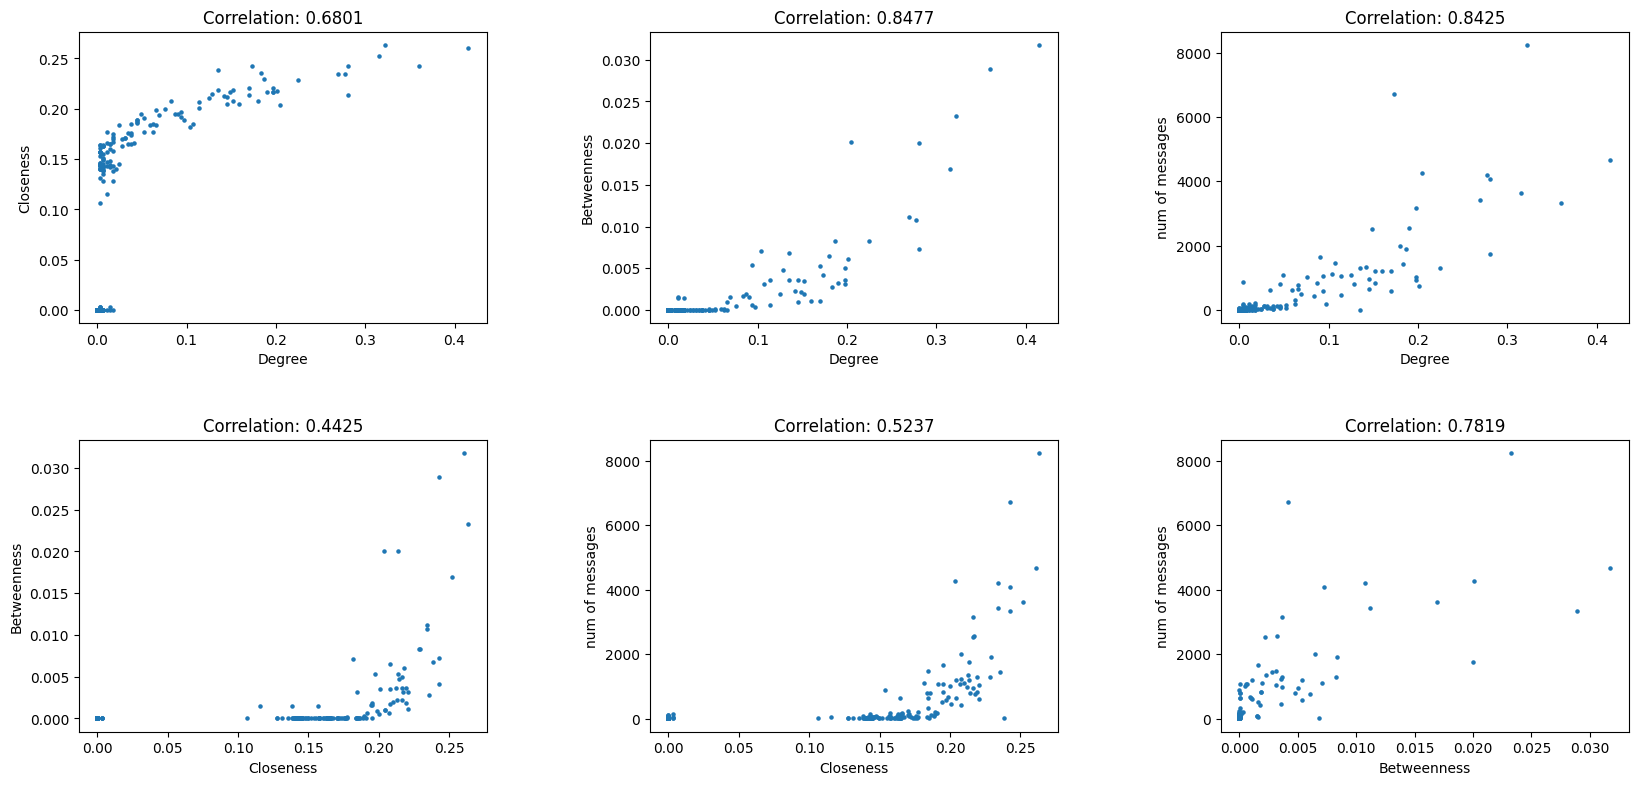

In [295]:
plt.figure(figsize=(4*5, 5*5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
k = 1
for i in range(len(centvals)):
    for j in range(i + 1, len(centvals)):
        i_label, i_vals = centvals[i]
        j_label, j_vals = centvals[j]
        correlation = pearson_correlation(i_vals, j_vals)
        plt.subplot(5, 3, k)
        plt.scatter(i_vals, j_vals, s=5)
        plt.title('Correlation: {:.4f}'.format(correlation))
        plt.xlabel(i_label)
        plt.ylabel(j_label)
        k += 1

## Ищем авторитеты и хабы в сети

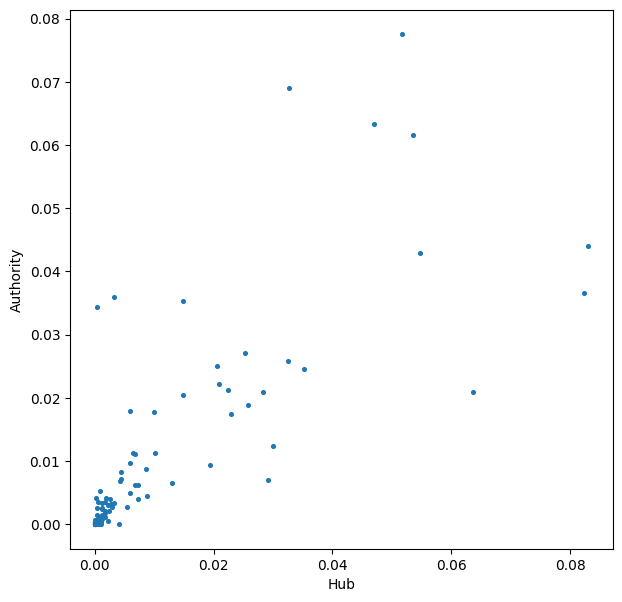

In [296]:
hub, auth = nx.hits(G_cut)
plt.figure(figsize=(7, 7))
plt.scatter(hub.values(), auth.values(), s=7)
plt.xlabel('Hub')
plt.ylabel('Authority')
plt.show()

In [297]:
print(hub)

{0: 0.03268777068045482, 1: 0.0032871916186662307, 2: 0.053611040677092256, 3: 0.02923398194851434, 4: 0.05470511024820075, 5: 0.0516348861618952, 6: 0.046911003408030005, 7: 0.08237763403320601, 8: 0.0829756560683179, 9: 0.028238325865233126, 10: 0.025357774072582977, 11: 0.005949995423849549, 12: 0.00636735663002132, 13: 0.014898068592575175, 14: 0.06356901690763568, 15: 0.004285502977431646, 16: 0.004419424934673466, 17: 0.010032480701393802, 18: 0.006822128923764951, 19: 0.0351655233025887, 20: 0.01478883498310305, 21: 0.02087159665099505, 22: 0.01942486090099599, 23: 0.030083444027416497, 24: 0.0025480359178136984, 25: 0.008630156118314122, 26: 0.00017430249200030805, 27: 0.005879829634594612, 28: 0.013029422581608871, 29: 0.032556346167938795, 30: 0.0012322241757217597, 31: 0.02246461519024632, 32: 0.02286875706665102, 33: -0.0, 34: 0.007267619646689846, 35: 0.004473274659311151, 36: 0.006779632513603908, 37: 0.0003354128007673616, 38: 0.0017000597428563178, 39: 0.025839734789010

In [298]:
def hits_visualization(G, hub, auth, top):
    topHubs = np.array(list(dict(sorted(hub.items(), key=lambda x: x[1], reverse=True)[:top]).keys()))
    topAufs = np.array(list(dict(sorted(auth.items(), key=lambda x: x[1], reverse=True)[:top]).keys()))

    topHubSet = set(topHubs)
    topAufSet = set(topAufs)
    tops=list(topHubSet.union(topAufSet))
    subG = G.subgraph(tops).copy()

    h_vals = []
    a_vals = []
    pos = {}
    for node in subG.nodes:
        if node in topAufSet and node in topHubSet:
            if np.where(topAufs == node)[0][0] > np.where(topHubs == node)[0][0]:
                pos[node] = [0.3, np.where(topAufs == node)[0][0]]
            elif np.where(topAufs == node)[0][0] < np.where(topHubs == node)[0][0]:
                pos[node] = [0.7, np.where(topHubs == node)[0][0]]
            else:
                pos[node] = [0.5, np.where(topHubs == node)[0][0]]
            h_vals.append(hub[node])
            a_vals.append(np.round(auth[node], 5))
        elif node in topHubSet:
            h_vals.append(hub[node])
            a_vals.append(np.round(auth[node], 5))
            pos[node] = [0, np.where(topHubs == node)[0][0]]
        elif node in topAufSet:
            a_vals.append(np.round(auth[node], 5))
            h_vals.append(hub[node])
            pos[node] = [1, np.where(topAufs == node)[0][0]]

    resDic = {'h_top': topHubs,
              'a_top': topAufs,
              'subG': subG,
              'h_vals': np.array(h_vals),
              'a_vals': np.array(a_vals),
              'pos': pos}
    return resDic

In [299]:
vi = hits_visualization(G_cut, hub, auth, 10)
h_top, a_top = vi['h_top'], vi['a_top']
h_vals, a_vals = vi['h_vals'], vi['a_vals']
subG_cut, pos = vi['subG'], vi['pos']

In [300]:
topHubs = [G_cut.nodes[i]['label'] for i in h_top]
topAuts = [Suniqq[i][0] for i in a_top]
for i in range(len(topHubs)):
    print(i+1, 'place in hubs is for:', topHubs[i])
for i in range(len(topAuts)):
    print(i+1, 'place in authorities is for:', topAuts[i])

1 place in hubs is for: justreyb
2 place in hubs is for: evgeniyleet
3 place in hubs is for: n14t0
4 place in hubs is for: axel_reisen
5 place in hubs is for: dandrael
6 place in hubs is for: dyadya_danilo
7 place in hubs is for: linalucker
8 place in hubs is for: teemok
9 place in hubs is for: ceddisss
10 place in hubs is for: l3rra
1 place in authorities is for: dyadya_danilo
2 place in authorities is for: ceddisss
3 place in authorities is for: linalucker
4 place in authorities is for: dandrael
5 place in authorities is for: justreyb
6 place in authorities is for: axel_reisen
7 place in authorities is for: evgeniyleet
8 place in authorities is for: blvckbvrnez
9 place in authorities is for: ruriir_
10 place in authorities is for: ludmila_mikhailovna1983


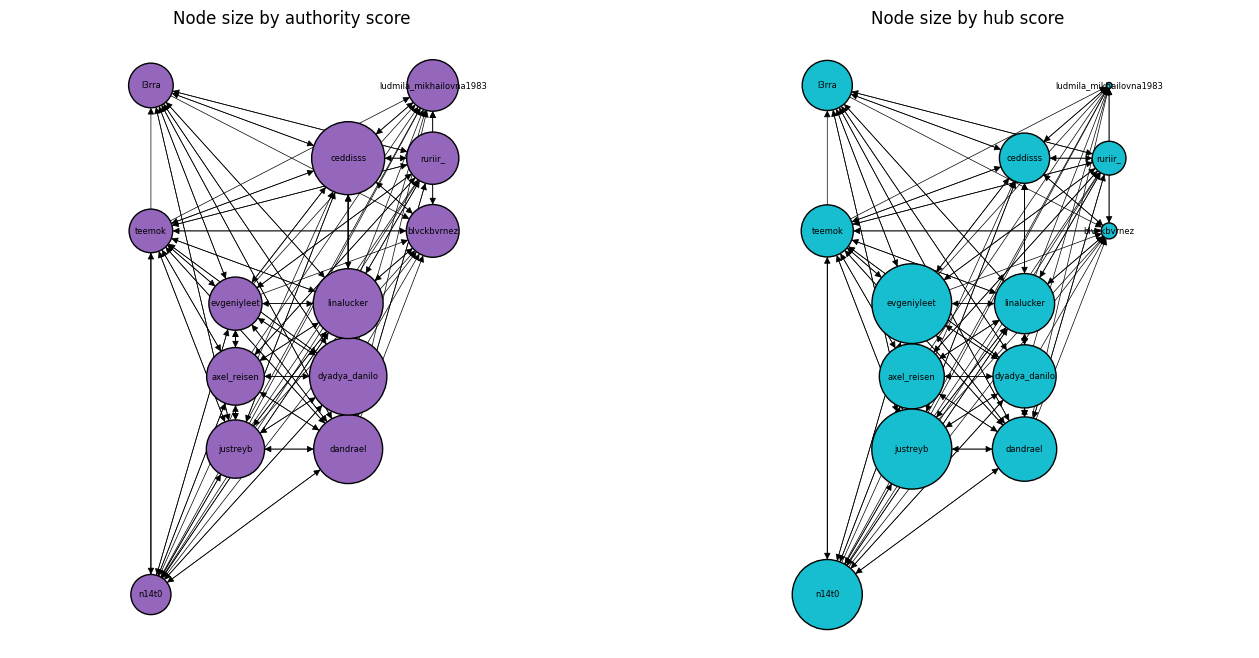

In [301]:
plt.figure(figsize=(16, 8))
a_labels = {i:Suniqq[i][0] for i in a_top}
for i in h_top:
    a_labels[i] = G_cut.nodes[i]['label']

a_pos = {node:(pos[node][0], pos[node][1]) for node in pos}

cases = [[1, 'tab:purple', a_vals, 'Node size by authority score'],
         [2, 'tab:cyan', h_vals, 'Node size by hub score']]
for i, color, vals, t in cases:
    plt.subplot(1, 2, i)
    plt.gca().axis('off')
    nx.draw_networkx(
        subG_cut,
        pos,
        width=0.5,
        with_labels=False,
        edgecolors='black',
        node_size=vals*4e4,
        node_color=color
    )
    nx.draw_networkx_labels(
        subG_cut,
        pos=a_pos,
        labels=a_labels,
        font_size = 6,
        horizontalalignment='center'
    )
    #nx.draw_networkx_labels(
    #    subG_cut,
    #    pos=a_pos,
    #    labels=h_labels,
    #    horizontalalignment='right'
    #)

    plt.xlim(-0.5, 1.5)
    plt.title(t)

## Пытаемся выделить сообщества и клики в сети

In [302]:
def eig_laplacian(G):
    A = nx.to_numpy_array(G)
    D = np.diag(A.sum(axis=0))
    L = D - A
    vals, vecs = np.linalg.eigh(L)
    return vecs, vals

def spectral_two_clusters(vecs):
    return np.sign(vecs[:, 1])

from scipy.linalg import fractional_matrix_power
from sklearn.cluster import KMeans
def norm_laplacian(A):
    D = np.diag(A.sum(axis=0))
    L0 = D - A
    D1 = fractional_matrix_power(D, -0.5)
    L = np.matmul(np.matmul(D1, D - A), D1)
    return L

def spectral_embedding(L, n_components):
    vals, vecs = np.linalg.eigh(L)
    return vecs[:, 1:n_components+1]

def spectral_clustering(G, n_clusters, n_components):
    A = nx.to_numpy_array(G)
    L = norm_laplacian(A)
    embedding = spectral_embedding(L, n_components)
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(embedding)
    return kmeans.labels_

def k_core_decompose(G):
    return np.array(list(nx.core_number(G).values()))



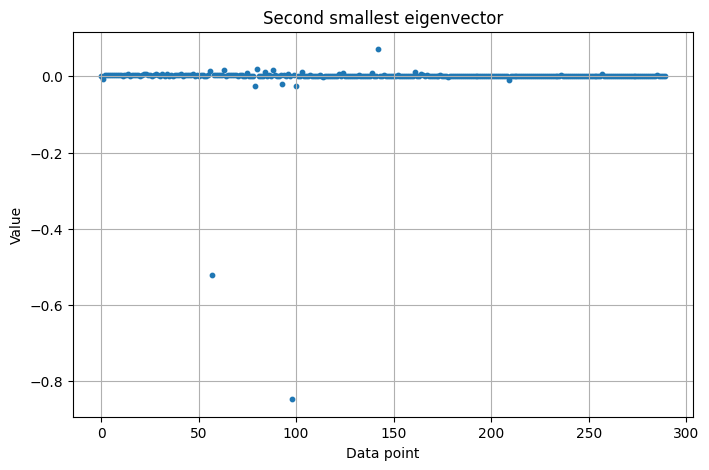

In [303]:
vecs, vals = eig_laplacian(G)
n = len(G.nodes)
plt.figure(figsize=(8, 5))
plt.scatter(np.arange(n), vecs[:, 1], s=10)
plt.title('Second smallest eigenvector')
plt.xlabel('Data point')
plt.ylabel('Value')
plt.grid()
plt.show()

In [304]:
vecs, vals = eig_laplacian(G)
labels = spectral_two_clusters(vecs)
for node in G.nodes:
    G.nodes[node]['spectral2clusters'] = labels[node]

In [305]:
G_und = G_cut.to_undirected(reciprocal=False, as_view=False)
G_und_strong = G_cut.to_undirected(reciprocal=True, as_view=False)
n = len(G_und.nodes)
A = nx.to_numpy_array(G_und)

In [306]:
labels = k_core_decompose(G_cut)

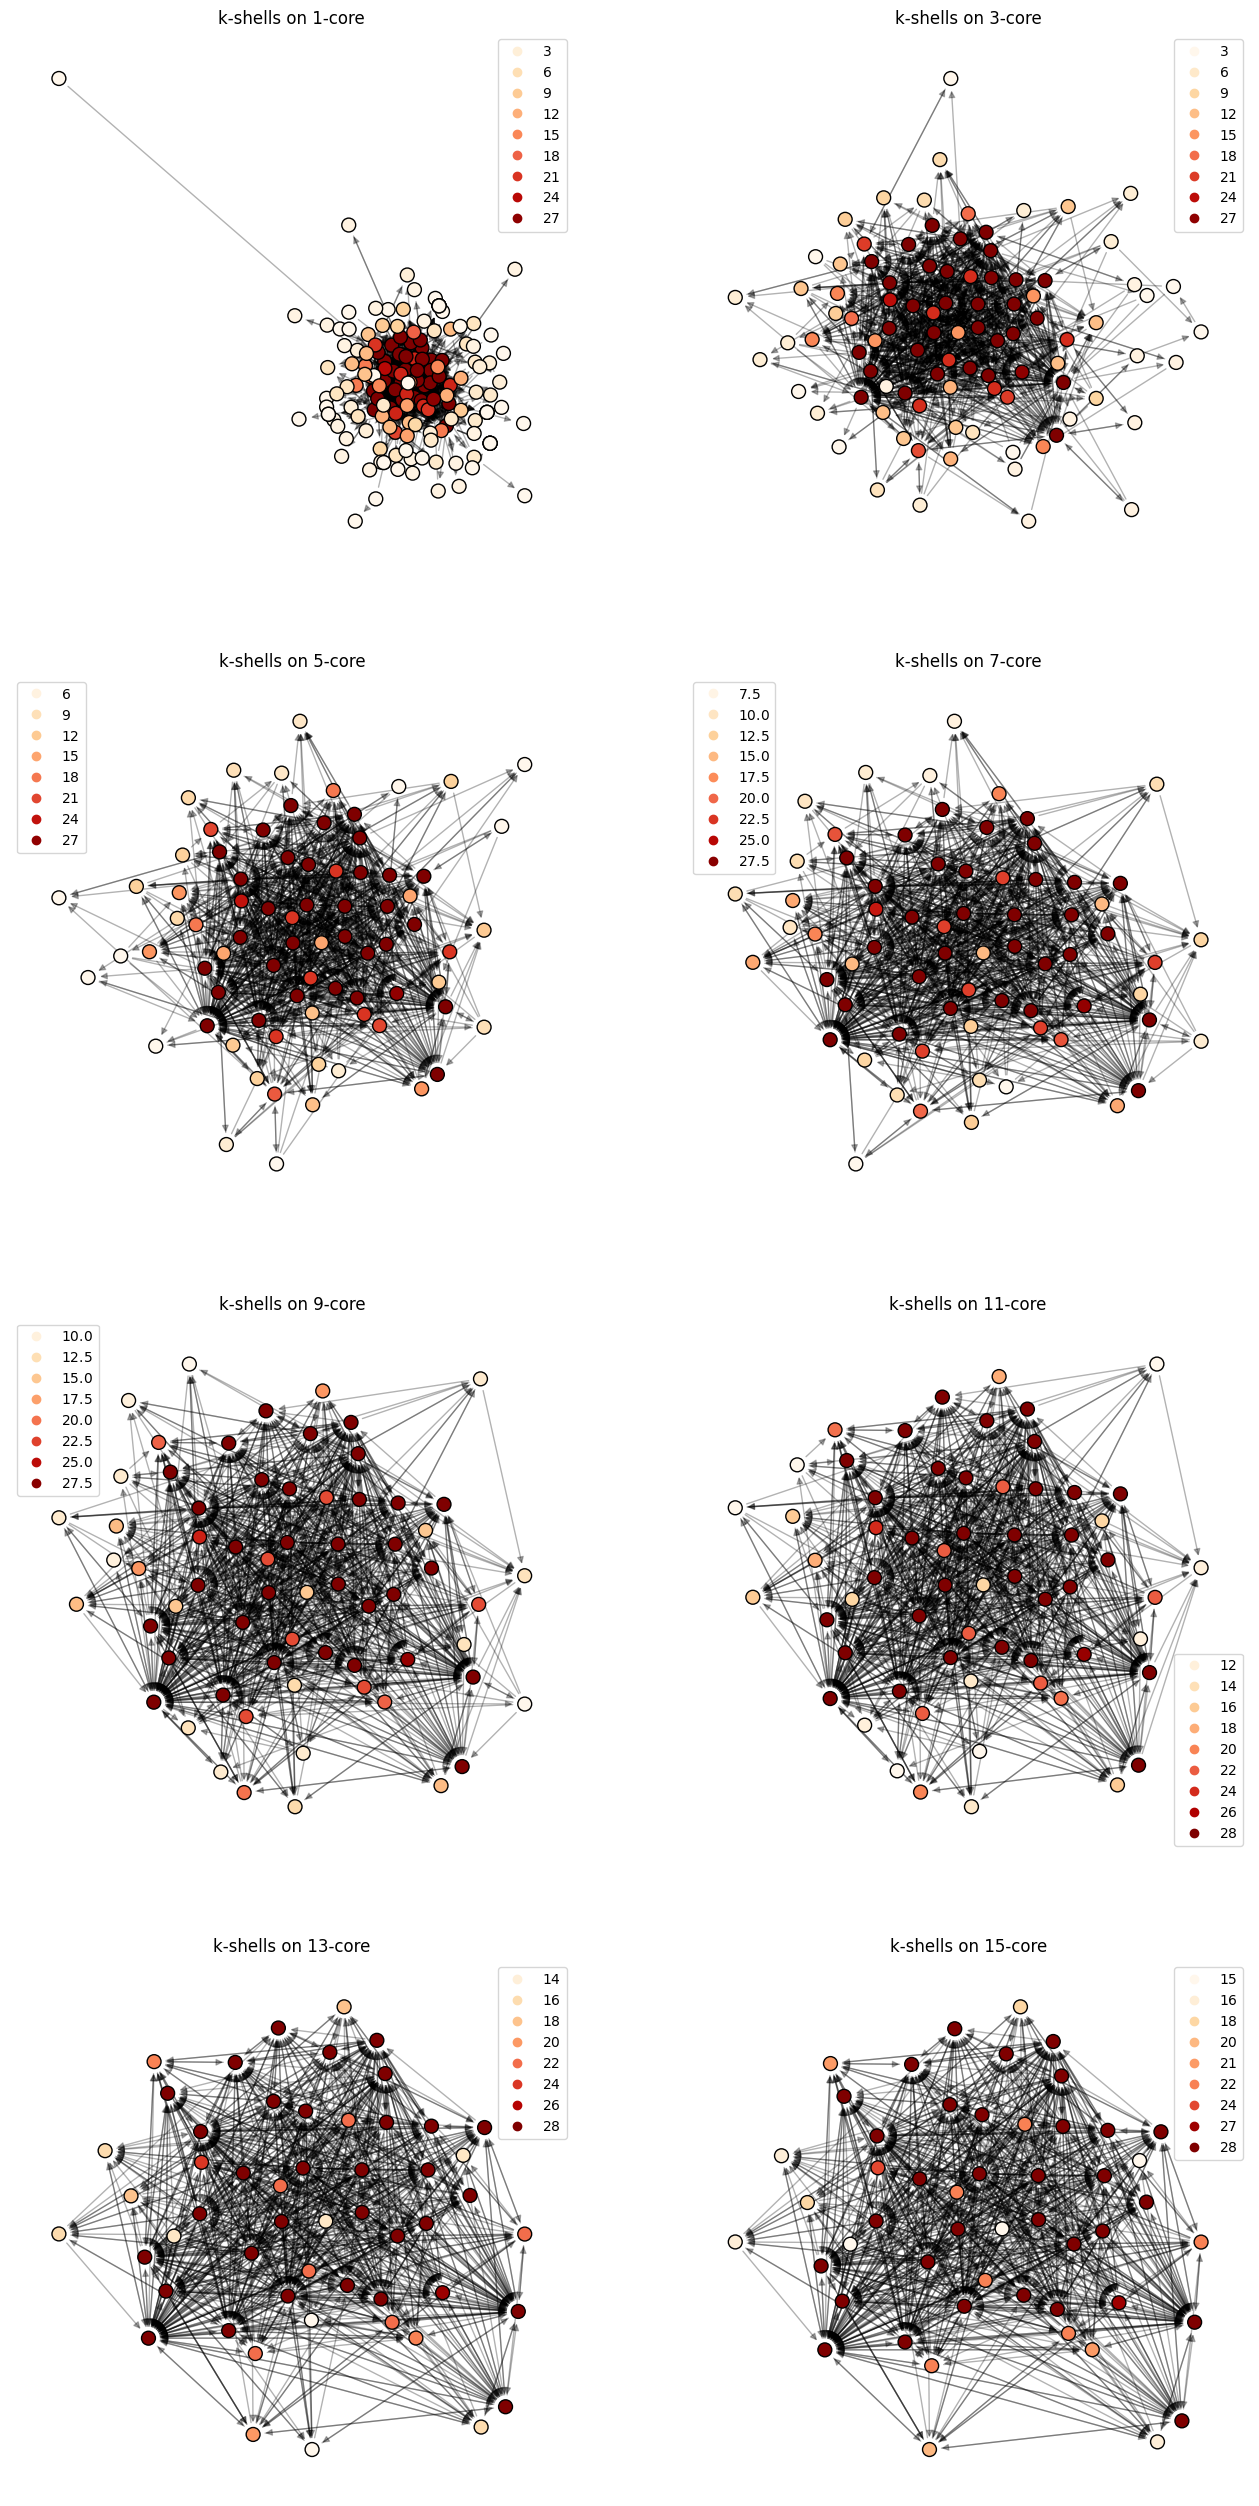

In [307]:
plt.figure(figsize=(8*2, 8*4))

#x_max, y_max = np.array(list(lespos.values())).max(axis=0)
#x_min, y_min = np.array(list(lespos.values())).min(axis=0)
layout = nx.kamada_kawai_layout(G_cut)
for i in range(8):
    plt.subplot(4, 2, i+1)
    subG = nx.k_core(G_cut, 2*i+1)
    nodes = nx.draw_networkx_nodes(
        subG,
        pos = layout,
        cmap=plt.cm.OrRd,
        node_color=k_core_decompose(subG),
        node_size=100,
        edgecolors='black'
    )
    nx.draw_networkx_edges(
        subG,
        pos = layout,
        alpha=0.3,
        width=1,
        edge_color='black'
    )
    plt.legend(*nodes.legend_elements())
    plt.axis('off')
    plt.title('k-shells on {}-core'.format(2*i+1))

In [308]:
def largest_cliques(G):
    Cs = nx.find_cliques(G)
    maxLen = max(len(c) for c in Cs)
    #print(maxLen)
    Largests = []
    for c in nx.find_cliques(G):
        if len(c) == maxLen:
            Largests.append(c)
    #print(np.array(Largests))
    colors = np.ones((len(Largests), len(G.nodes), 3))
    widths = np.ones((len(Largests), len(G.edges)))
    for c in range(len(Largests)):
        ni = 0
        for node in G.nodes:
            if node in Largests[c]:
                colors[c][ni] = np.array([0.7, 0.1, 0.5])
            ni += 1
    for c in range(len(Largests)):
        ei = 0
        for edge in G.edges:
            if edge[0] in Largests[c] and edge[1] in Largests[c]:
                widths[c][ei] = 1.4
            ei += 1
    return colors, widths

In [309]:
colors, widths = largest_cliques(G_und)
colors_strong, widths_strong = largest_cliques(G_und_strong)
size = np.unique(colors[0], axis=0, return_counts=True)[1][0]
size2 = np.unique(colors_strong[0], axis=0, return_counts=True)[1][0]
print(size, size2)

14 10


In [310]:
print(users_dic)

{'ceddisss': 8236, 'blvckbvrnez': 6722, 'dandrael': 4668, 'vellrus': 4256, 'axel_reisen': 4203, 'dyadya_danilo': 4071, 'linalucker': 3633, 'evgeniyleet': 3426, 'justreyb': 3339, 'cybernytik': 3166, 'seeoma': 2552, 'pandadrummer': 2518, 'chlore': 2007, 'roman_dmt': 1913, 'n14t0': 1753, 'jetviolett': 1649, 'ne_cott3r': 1471, 'juliam7': 1439, 'xseix': 1342, 'teemok': 1302, 'ruriir_': 1299, 'l3rva_': 1215, 'maxisolo': 1209, 'reactistov': 1207, 'fahafatesanat_t': 1112, 'prosto_oleja': 1102, 'truephotoonelove': 1083, 'hellknight719': 1074, 'kiraschmidtq': 1059, 'l3rra': 1035, 'mintywrinkles3': 1023, 'addict_v4': 976, 'poill': 941, 'vaicel_nick': 877, 'chevapchi4i': 837, 'retabokainrou': 831, 'wtwrite': 806, 'sbermarketeda': 804, 'strandedorange': 780, 'janzepp': 762, 'oxhof': 661, 'memerald_': 651, 'jijle': 629, '4rib': 624, 'dcayorcus': 593, 'moonofmays': 587, 'mister_mojo_risin': 498, 't1tnnox': 464, 'megumeme217': 430, 'otismatus': 316, 'camissado': 232, 'marlenbrando': 207, 'v0id_mg': 19

In [311]:
CG_clique = pd.DataFrame(columns=['id', 'color', 'size'])
max_mes = users_dic['ceddisss']
i = 0
for node in G_und.nodes:
    user = G_und.nodes[node]['label']
    size = 25*np.sqrt(users_dic[user]/max_mes)
    if colors_strong[0][i][1] != 1:
        colour = 'red'
        #print('red', user)
    if colors[0][i][1] != 1:
        colour = 'green'
        #print('green', user)
        if colors_strong[0][i][1] != 1:
            colour = 'yellow'
    elif colors_strong[0][i][1] == 1:
        colour = 'white'
    i += 1
    new_row = pd.DataFrame({'id':[user], 'color':[colour], 'size':[size]})
    CG_clique = pd.concat([CG_clique, new_row])
print(CG_clique)
CG_clique.to_csv('/content/gdrive/My Drive/MIPT/MAST/1SEM/SAS/project/CG_clique.csv', mode='w', index=False, header=True)

                     id   color       size
0              ceddisss   green  25.000000
0           blvckbvrnez   green  22.585572
0              dandrael  yellow  18.821198
0               vellrus   green  17.971431
0           axel_reisen     red  17.859181
..                  ...     ...        ...
0         inmigewazhong   white   0.389580
0            fell_lovee   white   0.389580
0   mega_krutoy_nikolay   white   0.389580
0              yayohann   white   0.389580
0            love_you89   white   0.389580

[156 rows x 3 columns]


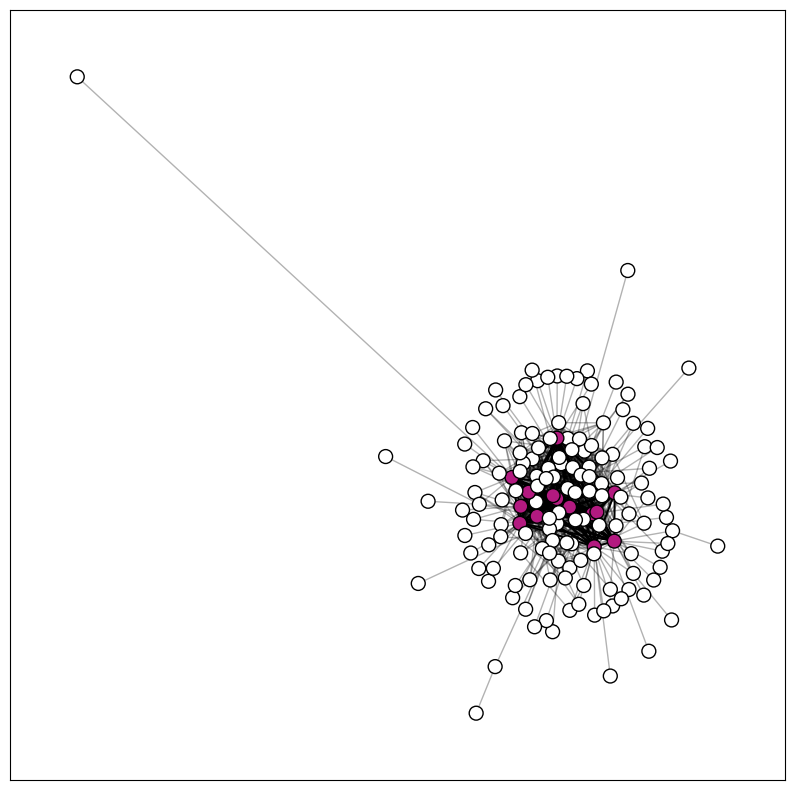

In [312]:
plt.figure(figsize=(10, 10))
b_edges = np.array(list(G_und.edges))[widths[0] == widths[0].max()]
layout = nx.kamada_kawai_layout(G_und)
nodes = nx.draw_networkx_nodes(
    G_und,
    pos = layout,
    node_color=colors[0],
    node_size=100,
    linewidths=1,
    edgecolors='black'
)
nx.draw_networkx_edges(
    G_und,
    pos = layout,
    alpha=0.3,
    width=widths[0].min()
)
nx.draw_networkx_edges(
    G_und,
    pos = layout,
    width=widths[0].max(),
    edgelist=b_edges
)

## Выделение сообществ на основе весов дуг

In [313]:
mw = 0
for edge in G.edges:
    if mw < G.edges[edge]['weight']:
        mw = G.edges[edge]['weight']
print(mw)
Gs = {}
for i in range(1, mw):
    G1 = deepcopy(G)
    for edge in G.edges:
        if G1.edges[edge]['weight'] < i:
            G1.remove_edge(*edge)
    Gs[i] = deepcopy(G1)

76


In [314]:
weakly_coms = {}
strong_coms = {}
for i, gg in Gs.items():
    weakly_coms[i] = 0
    strong_coms[i] = 0
    print(len(gg.edges), 'edges are heavier than', i)
    for component in nx.weakly_connected_components(gg):
        if len(component) > 1:
            weakly_coms[i] += 1
            #print(len(component))
    print('num of weak communities:', weakly_coms[i])
    for component in nx.strongly_connected_components(gg):
        if len(component) > 1:
            strong_coms[i] += 1
            #print(len(component))
    print('num of strong communities:', strong_coms[i])

1361 edges are heavier than 1
num of weak communities: 1
num of strong communities: 1
768 edges are heavier than 2
num of weak communities: 1
num of strong communities: 1
516 edges are heavier than 3
num of weak communities: 1
num of strong communities: 1
395 edges are heavier than 4
num of weak communities: 1
num of strong communities: 2
317 edges are heavier than 5
num of weak communities: 2
num of strong communities: 2
258 edges are heavier than 6
num of weak communities: 2
num of strong communities: 1
224 edges are heavier than 7
num of weak communities: 2
num of strong communities: 1
192 edges are heavier than 8
num of weak communities: 2
num of strong communities: 1
171 edges are heavier than 9
num of weak communities: 1
num of strong communities: 1
143 edges are heavier than 10
num of weak communities: 1
num of strong communities: 1
129 edges are heavier than 11
num of weak communities: 1
num of strong communities: 1
110 edges are heavier than 12
num of weak communities: 1
num o

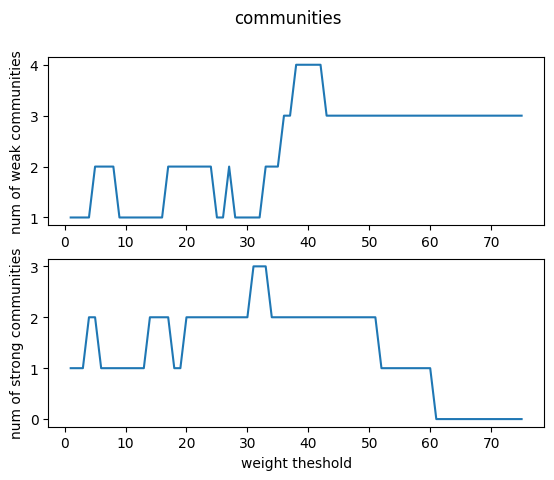

In [315]:
fig, (ax1, ax2) = plt.subplots(2)

fig.suptitle('communities')
x = weakly_coms.keys()
y = weakly_coms.values()
y2 = strong_coms.values()

ax1.plot(x, y)
ax2.plot(x, y2)

plt.xlabel('weight theshold')
ax1.set(ylabel='num of weak communities')
ax2.set(ylabel='num of strong communities')

plt.show()

31, 38

In [316]:
Wtreshold = 36
Streshold = 31
ggW = Gs[Wtreshold]
ggS = Gs[Streshold]
Scoms_dic = {}
users_Wcoms = {}
users_Scoms = {}
i = 0
for component in nx.weakly_connected_components(ggW):

    if len(component) > 1:
        print(len(component))
        for node in component:
            print(ggW.nodes[node]['label'])
            users_Wcoms[ggW.nodes[node]['label']] = i
        i += 1
i = 0
for component in nx.strongly_connected_components(ggS):
    Scoms_dic[i] = []
    if len(component) > 1:
        print(len(component))
        for node in component:
            print(ggS.nodes[node]['label'])
            users_Scoms[ggS.nodes[node]['label']] = i
            Scoms_dic[i].append(ggS.nodes[node]['label'])
        i += 1


7
ceddisss
blvckbvrnez
dandrael
linalucker
evgeniyleet
n14t0
ruriir_
3
ludmila_mikhailovna1983
axel_reisen
addict_v4
3
justreyb
seeoma
dyadya_danilo
3
ceddisss
linalucker
evgeniyleet
2
justreyb
dyadya_danilo
2
axel_reisen
addict_v4


In [317]:
CG_Wcoms = pd.DataFrame(columns=['id', 'color', 'size'])
max_mes = users_dic['ceddisss']
colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'purple'}
for node in G.nodes:
    user = G.nodes[node]['label']
    size = 25*np.sqrt(users_dic[user]/max_mes)
    if user in users_Wcoms:
        colour = colors[users_Wcoms[user]]
    else:
        colour = 'white'
    new_row = pd.DataFrame({'id':[user], 'color':[colour], 'size':[size]})
    CG_Wcoms = pd.concat([CG_Wcoms, new_row])
print(CG_Wcoms)
CG_Wcoms.to_csv('/content/gdrive/My Drive/MIPT/MAST/1SEM/SAS/project/CG_Wcoms.csv', mode='w', index=False, header=True)

                    id  color       size
0             ceddisss    red  25.000000
0          blvckbvrnez    red  22.585572
0             dandrael    red  18.821198
0              vellrus  white  17.971431
0          axel_reisen  green  17.859181
..                 ...    ...        ...
0           love_you89  white   0.389580
0          romajostkiy  white   0.389580
0             new_mask  white   0.389580
0   davidchik_alexandr  white   0.389580
0             nightbot  white   0.389580

[290 rows x 3 columns]


In [318]:
CG_Scoms = pd.DataFrame(columns=['id', 'color', 'size'])
max_mes = users_dic['ceddisss']
colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'purple'}
for node in G.nodes:
    user = G.nodes[node]['label']
    size = 25*np.sqrt(users_dic[user]/max_mes)
    if user in users_Scoms:
        colour = colors[users_Scoms[user]]
    else:
        colour = 'white'
    new_row = pd.DataFrame({'id':[user], 'color':[colour], 'size':[size]})
    CG_Scoms = pd.concat([CG_Scoms, new_row])
print(CG_Scoms)
CG_Scoms.to_csv('/content/gdrive/My Drive/MIPT/MAST/1SEM/SAS/project/CG_Scoms.csv', mode='w', index=False, header=True)

                    id  color       size
0             ceddisss    red  25.000000
0          blvckbvrnez  white  22.585572
0             dandrael  white  18.821198
0              vellrus  white  17.971431
0          axel_reisen   blue  17.859181
..                 ...    ...        ...
0           love_you89  white   0.389580
0          romajostkiy  white   0.389580
0             new_mask  white   0.389580
0   davidchik_alexandr  white   0.389580
0             nightbot  white   0.389580

[290 rows x 3 columns]


In [319]:
users_coms = deepcopy(users_Scoms)
coms_dic = deepcopy(Scoms_dic)
print(coms_dic)
double_nodes = []
for node in G_cut.nodes:
    if G_cut.nodes[node]['label'] in users_Scoms:
        continue
    print(G_cut.nodes[node]['label'])
    maxWeight = 0
    bestCom = -1
    for i in range(3):
        SumWeight = 0
        for user in coms_dic[i]:
            if (node, user_to_index[user]) in G_cut.edges:
                #print(G_cut.edges[(node, user_to_index[user])]['weight'])
                SumWeight += G_cut.edges[(node, user_to_index[user])]['weight']
            if (user_to_index[user], node) in G_cut.edges:
                #print(G_cut.edges[(user_to_index[user], node)]['weight'])
                SumWeight += G_cut.edges[(user_to_index[user], node)]['weight']
        #print(i, 'SumWeight:', SumWeight/len(coms_dic[i]))
        if SumWeight/len(coms_dic[i]) > maxWeight:
            maxWeight = SumWeight/len(coms_dic[i])
            bestCom = i
    if bestCom == -1:
        double_nodes.append(node)
        continue
    users_coms[G_cut.nodes[node]['label']] = bestCom
    coms_dic[bestCom].append(G_cut.nodes[node]['label'])
    print(bestCom)

for node in deepcopy(double_nodes):
    if G_cut.nodes[node]['label'] in users_Scoms:
        continue
    print(G_cut.nodes[node]['label'])
    maxWeight = 0
    bestCom = -1
    for i in range(3):
        SumWeight = 0
        for user in coms_dic[i]:
            if (node, user_to_index[user]) in G_cut.edges:
                #print(G_cut.edges[(node, user_to_index[user])]['weight'])
                SumWeight += G_cut.edges[(node, user_to_index[user])]['weight']
            if (user_to_index[user], node) in G_cut.edges:
                #print(G_cut.edges[(user_to_index[user], node)]['weight'])
                SumWeight += G_cut.edges[(user_to_index[user], node)]['weight']
        #print(i, 'SumWeight:', SumWeight/len(coms_dic[i]))
        if SumWeight/len(coms_dic[i]) > maxWeight:
            maxWeight = SumWeight/len(coms_dic[i])
            bestCom = i
    if bestCom != -1:
        double_nodes.remove(node)
        users_coms[G_cut.nodes[node]['label']] = bestCom
        coms_dic[bestCom].append(G_cut.nodes[node]['label'])
    print(bestCom)
print(double_nodes)

{0: ['ceddisss', 'linalucker', 'evgeniyleet'], 1: ['justreyb', 'dyadya_danilo'], 2: ['axel_reisen', 'addict_v4'], 3: []}
blvckbvrnez
0
dandrael
1
vellrus
1
cybernytik
1
seeoma
1
pandadrummer
2
chlore
1
roman_dmt
0
n14t0
1
jetviolett
1
ne_cott3r
0
juliam7
0
xseix
0
teemok
2
ruriir_
0
l3rva_
0
maxisolo
1
reactistov
2
fahafatesanat_t
1
prosto_oleja
0
truephotoonelove
2
hellknight719
2
kiraschmidtq
1
l3rra
1
mintywrinkles3
1
poill
2
vaicel_nick
0
chevapchi4i
1
retabokainrou
2
wtwrite
2
sbermarketeda
1
strandedorange
1
janzepp
2
oxhof
0
memerald_
2
jijle
1
4rib
1
dcayorcus
1
moonofmays
2
mister_mojo_risin
2
t1tnnox
1
megumeme217
1
otismatus
1
camissado
0
marlenbrando
2
v0id_mg
2
11maxlaiter
1
jujabanda
1
ezhevika_
2
pink4donald
1
sanin_fanat
relysed
0
hhj0gd
2
happy_sand
2
nemar1na
2
yobreek
2
deadkafka
0
vladislavkosmach
1
tmooor
1
leychick
2
sobakapovodyr
1
glebiy0071
1
iamhere13666
1
rb934h
2
jusrlynx
1
kaorysil
0
korgalum
2
s1iska
1
sadankorch
1
ahkind
0
pam_cake222
0
ernest671
2
tinyny

In [320]:
for i in range(3):
    print(colors[i], len(coms_dic[i]))

red 42
green 72
blue 42


In [321]:
CG_Fcoms = pd.DataFrame(columns=['id', 'color', 'size'])
max_mes = users_dic['ceddisss']
colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'purple'}
for node in G.nodes:
    user = G.nodes[node]['label']
    size = 25*np.sqrt(users_dic[user]/max_mes)
    if user in users_coms:
        colour = colors[users_coms[user]]
    else:
        colour = 'white'
    new_row = pd.DataFrame({'id':[user], 'color':[colour], 'size':[size]})
    CG_Fcoms = pd.concat([CG_Fcoms, new_row])
print(CG_Fcoms)
CG_Fcoms.to_csv('/content/gdrive/My Drive/MIPT/MAST/1SEM/SAS/project/CG_Fcoms.csv', mode='w', index=False, header=True)

                    id  color       size
0             ceddisss    red  25.000000
0          blvckbvrnez    red  22.585572
0             dandrael  green  18.821198
0              vellrus  green  17.971431
0          axel_reisen   blue  17.859181
..                 ...    ...        ...
0           love_you89  green   0.389580
0          romajostkiy  white   0.389580
0             new_mask  white   0.389580
0   davidchik_alexandr  white   0.389580
0             nightbot  white   0.389580

[290 rows x 3 columns]
